In [18]:
import pandas as pd
import seaborn as sns
import math
df = pd.read_csv("ETData - ETData.csv")

In [2]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  373 non-null    float64
 1   Salary               373 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

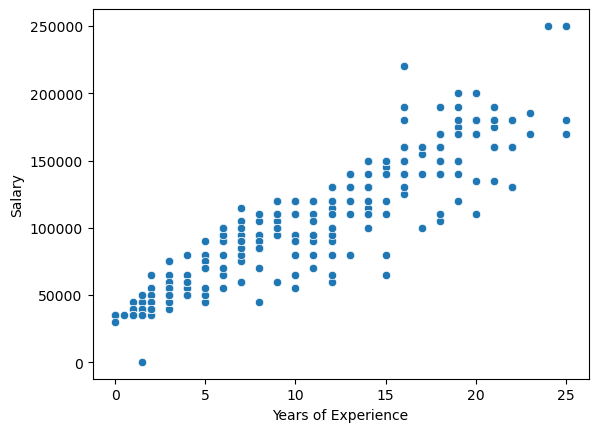

In [3]:
sns.scatterplot(data=df, x="Years of Experience", y="Salary")

In [4]:
def getLinearPrediction(xValue, slope, intercept):
    return slope*xValue + intercept

In [19]:
def getRMSEAccuracy(df, slope, intercept, xLabel, yLabel):
    squared_errors = 0

    for i in range(len(df[yLabel])):
        dataY = df.iloc[i][yLabel]
        dataX = df.iloc[i][xLabel]
        prediction = getLinearPrediction(dataX, slope, intercept)

        # Calculate squared error
        squared_errors += (prediction - dataY)**2

    # Calculate mean squared error
    mean_squared_error = squared_errors / len(df[yLabel])

    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [6]:
print(getRMSEAccuracy(df, 10000, 0, "Years of Experience", "Salary"))

27186.656091490862


In [7]:
print(getRMSEAccuracy(df, 7000, 40000, "Years of Experience", "Salary"))

20150.108435767546


In [ ]:
def findOptimalLinearEquation(df, xLabel, yLabel, slope_range, intercept_range):
    best_slope = None
    best_intercept = None
    best_accuracy = float('inf')  # Initialize with a high value
    
    total_iterations = len(slope_range) * len(intercept_range)
    current_iteration = 0

    for slope in slope_range:
        for intercept in intercept_range:
            accuracy = getRMSEAccuracy(df, slope, intercept, xLabel, yLabel)

            # Update the best values if the current accuracy is lower
            if accuracy < best_accuracy:
                best_slope = slope
                best_intercept = intercept
                best_accuracy = accuracy
                
                print("Current Slope:", best_slope)
                print("Current Intercept:", best_intercept)
                print("Current RMSE Accuracy:", best_accuracy)
            
            current_iteration += 1
            progress_percentage = (current_iteration / total_iterations) * 100
            #print(f"Progress: {progress_percentage:.2f}%")

    return best_slope, best_intercept, best_accuracy

In [20]:
optimal_slope, optimal_intercept, optimal_accuracy = findOptimalLinearEquation(df, "Years of Experience", "Salary", np.arange(5000, 10000, 100), np.arange(25000, 50000, 1000))

print("Optimal Slope:", optimal_slope)
print("Optimal Intercept:", optimal_intercept)
print("Optimal RMSE Accuracy:", optimal_accuracy)

Progress: 0.08%
Progress: 0.16%
Progress: 0.24%
Progress: 0.32%
Progress: 0.40%
Progress: 0.48%
Progress: 0.56%
Progress: 0.64%
Progress: 0.72%
Progress: 0.80%
Progress: 0.88%
Progress: 0.96%
Progress: 1.04%
Progress: 1.12%
Progress: 1.20%
Progress: 1.28%
Progress: 1.36%
Progress: 1.44%
Progress: 1.52%
Progress: 1.60%
Progress: 1.68%
Progress: 1.76%
Progress: 1.84%
Progress: 1.92%
Progress: 2.00%
Progress: 2.08%
Progress: 2.16%
Progress: 2.24%
Progress: 2.32%
Progress: 2.40%
Progress: 2.48%
Progress: 2.56%
Progress: 2.64%
Progress: 2.72%
Progress: 2.80%
Progress: 2.88%
Progress: 2.96%
Progress: 3.04%
Progress: 3.12%
Progress: 3.20%
Progress: 3.28%
Progress: 3.36%
Progress: 3.44%
Progress: 3.52%
Progress: 3.60%
Progress: 3.68%
Progress: 3.76%
Progress: 3.84%
Progress: 3.92%
Progress: 4.00%
Progress: 4.08%
Progress: 4.16%
Progress: 4.24%
Progress: 4.32%
Progress: 4.40%
Progress: 4.48%
Progress: 4.56%
Progress: 4.64%
Progress: 4.72%
Progress: 4.80%
Progress: 4.88%
Progress: 4.96%
Progress

Progress: 39.36%
Progress: 39.44%
Progress: 39.52%
Progress: 39.60%
Progress: 39.68%
Progress: 39.76%
Progress: 39.84%
Progress: 39.92%
Progress: 40.00%
Progress: 40.08%
Progress: 40.16%
Progress: 40.24%
Progress: 40.32%
Progress: 40.40%
Progress: 40.48%
Progress: 40.56%
Progress: 40.64%
Progress: 40.72%
Progress: 40.80%
Progress: 40.88%
Progress: 40.96%
Progress: 41.04%
Progress: 41.12%
Progress: 41.20%
Progress: 41.28%
Progress: 41.36%
Progress: 41.44%
Progress: 41.52%
Progress: 41.60%
Progress: 41.68%
Progress: 41.76%
Progress: 41.84%
Progress: 41.92%
Progress: 42.00%
Progress: 42.08%
Progress: 42.16%
Progress: 42.24%
Progress: 42.32%
Progress: 42.40%
Progress: 42.48%
Progress: 42.56%
Progress: 42.64%
Progress: 42.72%
Progress: 42.80%
Progress: 42.88%
Progress: 42.96%
Progress: 43.04%
Progress: 43.12%
Progress: 43.20%
Progress: 43.28%
Progress: 43.36%
Progress: 43.44%
Progress: 43.52%
Progress: 43.60%
Progress: 43.68%
Progress: 43.76%
Progress: 43.84%
Progress: 43.92%
Progress: 44.0

Progress: 78.16%
Progress: 78.24%
Progress: 78.32%
Progress: 78.40%
Progress: 78.48%
Progress: 78.56%
Progress: 78.64%
Progress: 78.72%
Progress: 78.80%
Progress: 78.88%
Progress: 78.96%
Progress: 79.04%
Progress: 79.12%
Progress: 79.20%
Progress: 79.28%
Progress: 79.36%
Progress: 79.44%
Progress: 79.52%
Progress: 79.60%
Progress: 79.68%
Progress: 79.76%
Progress: 79.84%
Progress: 79.92%
Progress: 80.00%
Progress: 80.08%
Progress: 80.16%
Progress: 80.24%
Progress: 80.32%
Progress: 80.40%
Progress: 80.48%
Progress: 80.56%
Progress: 80.64%
Progress: 80.72%
Progress: 80.80%
Progress: 80.88%
Progress: 80.96%
Progress: 81.04%
Progress: 81.12%
Progress: 81.20%
Progress: 81.28%
Progress: 81.36%
Progress: 81.44%
Progress: 81.52%
Progress: 81.60%
Progress: 81.68%
Progress: 81.76%
Progress: 81.84%
Progress: 81.92%
Progress: 82.00%
Progress: 82.08%
Progress: 82.16%
Progress: 82.24%
Progress: 82.32%
Progress: 82.40%
Progress: 82.48%
Progress: 82.56%
Progress: 82.64%
Progress: 82.72%
Progress: 82.8

In [12]:
getLinearPrediction(9, 6800, 32000)

93200

In [15]:
lastOptimalSlope = 6800
lastOptimalIntercept = 32000
lastOptimalSlopeIteration = 100
lastOptimalInterceptIteration = 1000

while True:
    optimal_slope, optimal_intercept, optimal_accuracy = findOptimalLinearEquation(df, "Years of Experience", "Salary", np.arange(lastOptimalSlope-lastOptimalSlopeIteration, lastOptimalSlope+lastOptimalSlopeIteration, lastOptimalSlopeIteration/10), np.arange(lastOptimalIntercept-lastOptimalInterceptIteration, lastOptimalIntercept+lastOptimalInterceptIteration, lastOptimalInterceptInteration/10))
    lastOptimalSlopeIteration =lastOptimalSlopeIteration / 10
    lastOptimalInterceptInteration = lastOptimalInterceptInteration / 10
    
    print("New Optimal Slope:", optimal_slope)
    print("New Optimal Intercept:", optimal_intercept)
    print("New Optimal RMSE Accuracy:", optimal_accuracy)

print("Optimal Slope:", optimal_slope)
print("Optimal Intercept:", optimal_intercept)
print("Optimal RMSE Accuracy:", optimal_accuracy)

Current Slope: 6700.0
Current Intercept: 31000.0
Current RMSE Accuracy: 17849.540212310363
Progress: 0.03%
Current Slope: 6700.0
Current Intercept: 31010.0
Current RMSE Accuracy: 17848.214763423453
Progress: 0.05%
Current Slope: 6700.0
Current Intercept: 31020.0
Current RMSE Accuracy: 17846.8948193149
Progress: 0.07%
Current Slope: 6700.0
Current Intercept: 31030.0
Current RMSE Accuracy: 17845.580381206186
Progress: 0.10%
Current Slope: 6700.0
Current Intercept: 31040.0
Current RMSE Accuracy: 17844.271450314056
Progress: 0.12%
Current Slope: 6700.0
Current Intercept: 31050.0
Current RMSE Accuracy: 17842.968027850507
Progress: 0.15%
Current Slope: 6700.0
Current Intercept: 31060.0
Current RMSE Accuracy: 17841.670115022796
Progress: 0.18%
Current Slope: 6700.0
Current Intercept: 31070.0
Current RMSE Accuracy: 17840.377713033424
Progress: 0.20%
Current Slope: 6700.0
Current Intercept: 31080.0
Current RMSE Accuracy: 17839.090823080132
Progress: 0.22%
Current Slope: 6700.0
Current Intercept

Current Slope: 6700.0
Current Intercept: 31790.0
Current RMSE Accuracy: 17761.879331102722
Progress: 2.00%
Current Slope: 6700.0
Current Intercept: 31800.0
Current RMSE Accuracy: 17760.992140729533
Progress: 2.02%
Current Slope: 6700.0
Current Intercept: 31810.0
Current RMSE Accuracy: 17760.110536634013
Progress: 2.05%
Current Slope: 6700.0
Current Intercept: 31820.0
Current RMSE Accuracy: 17759.234519648096
Progress: 2.08%
Current Slope: 6700.0
Current Intercept: 31830.0
Current RMSE Accuracy: 17758.364090598625
Progress: 2.10%
Current Slope: 6700.0
Current Intercept: 31840.0
Current RMSE Accuracy: 17757.499250307315
Progress: 2.12%
Current Slope: 6700.0
Current Intercept: 31850.0
Current RMSE Accuracy: 17756.639999590774
Progress: 2.15%
Current Slope: 6700.0
Current Intercept: 31860.0
Current RMSE Accuracy: 17755.78633926048
Progress: 2.17%
Current Slope: 6700.0
Current Intercept: 31870.0
Current RMSE Accuracy: 17754.938270122802
Progress: 2.20%
Current Slope: 6700.0
Current Intercep

Current Slope: 6700.0
Current Intercept: 32590.0
Current RMSE Accuracy: 17708.616925238
Progress: 4.00%
Current Slope: 6700.0
Current Intercept: 32600.0
Current RMSE Accuracy: 17708.178840728593
Progress: 4.03%
Current Slope: 6700.0
Current Intercept: 32610.0
Current RMSE Accuracy: 17707.746392628003
Progress: 4.05%
Current Slope: 6700.0
Current Intercept: 32620.0
Current RMSE Accuracy: 17707.31958134918
Progress: 4.08%
Current Slope: 6700.0
Current Intercept: 32630.0
Current RMSE Accuracy: 17706.89840729975
Progress: 4.10%
Current Slope: 6700.0
Current Intercept: 32640.0
Current RMSE Accuracy: 17706.482870881966
Progress: 4.12%
Current Slope: 6700.0
Current Intercept: 32650.0
Current RMSE Accuracy: 17706.07297249276
Progress: 4.15%
Current Slope: 6700.0
Current Intercept: 32660.0
Current RMSE Accuracy: 17705.6687125237
Progress: 4.17%
Current Slope: 6700.0
Current Intercept: 32670.0
Current RMSE Accuracy: 17705.270091361013
Progress: 4.20%
Current Slope: 6700.0
Current Intercept: 3268

Current Slope: 6710.0
Current Intercept: 32890.0
Current RMSE Accuracy: 17692.10601032079
Progress: 9.75%
Current Slope: 6710.0
Current Intercept: 32900.0
Current RMSE Accuracy: 17691.893784924523
Progress: 9.78%
Current Slope: 6710.0
Current Intercept: 32910.0
Current RMSE Accuracy: 17691.687209355496
Progress: 9.80%
Current Slope: 6710.0
Current Intercept: 32920.0
Current RMSE Accuracy: 17691.486283811628
Progress: 9.83%
Current Slope: 6710.0
Current Intercept: 32930.0
Current RMSE Accuracy: 17691.291008485416
Progress: 9.85%
Current Slope: 6710.0
Current Intercept: 32940.0
Current RMSE Accuracy: 17691.101383563968
Progress: 9.88%
Current Slope: 6710.0
Current Intercept: 32950.0
Current RMSE Accuracy: 17690.917409228976
Progress: 9.90%
Current Slope: 6710.0
Current Intercept: 32960.0
Current RMSE Accuracy: 17690.739085656733
Progress: 9.93%
Current Slope: 6710.0
Current Intercept: 32970.0
Current RMSE Accuracy: 17690.56641301812
Progress: 9.95%
Current Slope: 6710.0
Current Intercept

Progress: 16.98%
Progress: 17.00%
Progress: 17.03%
Progress: 17.05%
Progress: 17.08%
Progress: 17.10%
Progress: 17.12%
Progress: 17.15%
Progress: 17.18%
Progress: 17.20%
Progress: 17.22%
Progress: 17.25%
Progress: 17.27%
Progress: 17.30%
Progress: 17.32%
Progress: 17.35%
Progress: 17.38%
Progress: 17.40%
Progress: 17.42%
Progress: 17.45%
Progress: 17.47%
Progress: 17.50%
Progress: 17.52%
Progress: 17.55%
Progress: 17.57%
Progress: 17.60%
Progress: 17.62%
Progress: 17.65%
Progress: 17.68%
Progress: 17.70%
Progress: 17.72%
Progress: 17.75%
Progress: 17.77%
Progress: 17.80%
Progress: 17.82%
Progress: 17.85%
Progress: 17.88%
Progress: 17.90%
Progress: 17.93%
Progress: 17.95%
Progress: 17.97%
Progress: 18.00%
Progress: 18.02%
Progress: 18.05%
Progress: 18.07%
Progress: 18.10%
Progress: 18.12%
Progress: 18.15%
Progress: 18.18%
Progress: 18.20%
Progress: 18.22%
Progress: 18.25%
Progress: 18.27%
Progress: 18.30%
Progress: 18.32%
Progress: 18.35%
Progress: 18.38%
Progress: 18.40%
Progress: 18.4

Current Slope: 6740.0
Current Intercept: 32770.0
Current RMSE Accuracy: 17680.447001312492
Progress: 24.45%
Current Slope: 6740.0
Current Intercept: 32780.0
Current RMSE Accuracy: 17680.336967419524
Progress: 24.47%
Current Slope: 6740.0
Current Intercept: 32790.0
Current RMSE Accuracy: 17680.232588876846
Progress: 24.50%
Current Slope: 6740.0
Current Intercept: 32800.0
Current RMSE Accuracy: 17680.133865784625
Progress: 24.52%
Current Slope: 6740.0
Current Intercept: 32810.0
Current RMSE Accuracy: 17680.040798237595
Progress: 24.55%
Current Slope: 6740.0
Current Intercept: 32820.0
Current RMSE Accuracy: 17679.95338632507
Progress: 24.57%
Current Slope: 6740.0
Current Intercept: 32830.0
Current RMSE Accuracy: 17679.87163013094
Progress: 24.60%
Current Slope: 6740.0
Current Intercept: 32840.0
Current RMSE Accuracy: 17679.795529733663
Progress: 24.62%
Current Slope: 6740.0
Current Intercept: 32850.0
Current RMSE Accuracy: 17679.725085206268
Progress: 24.65%
Current Slope: 6740.0
Current 

Progress: 29.75%
Progress: 29.78%
Progress: 29.80%
Progress: 29.83%
Progress: 29.85%
Progress: 29.88%
Progress: 29.90%
Progress: 29.93%
Progress: 29.95%
Progress: 29.98%
Progress: 30.00%
Progress: 30.03%
Progress: 30.05%
Progress: 30.08%
Progress: 30.10%
Progress: 30.12%
Progress: 30.15%
Progress: 30.18%
Progress: 30.20%
Progress: 30.23%
Progress: 30.25%
Progress: 30.28%
Progress: 30.30%
Progress: 30.33%
Progress: 30.35%
Progress: 30.38%
Progress: 30.40%
Progress: 30.43%
Progress: 30.45%
Progress: 30.48%
Progress: 30.50%
Progress: 30.53%
Progress: 30.55%
Progress: 30.58%
Progress: 30.60%
Progress: 30.63%
Progress: 30.65%
Progress: 30.68%
Progress: 30.70%
Progress: 30.73%
Progress: 30.75%
Progress: 30.78%
Progress: 30.80%
Progress: 30.83%
Progress: 30.85%
Progress: 30.88%
Progress: 30.90%
Progress: 30.93%
Progress: 30.95%
Progress: 30.98%
Progress: 31.00%
Progress: 31.03%
Progress: 31.05%
Progress: 31.08%
Progress: 31.10%
Progress: 31.13%
Progress: 31.15%
Progress: 31.18%
Progress: 31.2

Progress: 38.20%
Progress: 38.22%
Progress: 38.25%
Progress: 38.27%
Progress: 38.30%
Progress: 38.32%
Progress: 38.35%
Progress: 38.38%
Progress: 38.40%
Progress: 38.42%
Progress: 38.45%
Progress: 38.48%
Progress: 38.50%
Progress: 38.52%
Current Slope: 6770.0
Current Intercept: 32410.0
Current RMSE Accuracy: 17674.698993686605
Progress: 38.55%
Current Slope: 6770.0
Current Intercept: 32420.0
Current RMSE Accuracy: 17674.555500248578
Progress: 38.57%
Current Slope: 6770.0
Current Intercept: 32430.0
Current RMSE Accuracy: 17674.417663541517
Progress: 38.60%
Current Slope: 6770.0
Current Intercept: 32440.0
Current RMSE Accuracy: 17674.28548369776
Progress: 38.62%
Current Slope: 6770.0
Current Intercept: 32450.0
Current RMSE Accuracy: 17674.15896084423
Progress: 38.65%
Current Slope: 6770.0
Current Intercept: 32460.0
Current RMSE Accuracy: 17674.038095102413
Progress: 38.67%
Current Slope: 6770.0
Current Intercept: 32470.0
Current RMSE Accuracy: 17673.922886588374
Progress: 38.70%
Current 

Progress: 44.00%
Progress: 44.02%
Progress: 44.05%
Progress: 44.07%
Progress: 44.10%
Progress: 44.12%
Progress: 44.15%
Progress: 44.17%
Progress: 44.20%
Progress: 44.22%
Progress: 44.25%
Progress: 44.27%
Progress: 44.30%
Progress: 44.32%
Progress: 44.35%
Progress: 44.38%
Progress: 44.40%
Progress: 44.42%
Progress: 44.45%
Progress: 44.47%
Progress: 44.50%
Progress: 44.52%
Progress: 44.55%
Progress: 44.57%
Progress: 44.60%
Progress: 44.62%
Progress: 44.65%
Progress: 44.67%
Progress: 44.70%
Progress: 44.73%
Progress: 44.75%
Progress: 44.77%
Progress: 44.80%
Progress: 44.82%
Progress: 44.85%
Progress: 44.88%
Progress: 44.90%
Progress: 44.92%
Progress: 44.95%
Progress: 44.98%
Progress: 45.00%
Progress: 45.02%
Progress: 45.05%
Progress: 45.07%
Progress: 45.10%
Progress: 45.12%
Progress: 45.15%
Progress: 45.17%
Progress: 45.20%
Progress: 45.23%
Progress: 45.25%
Progress: 45.27%
Progress: 45.30%
Progress: 45.32%
Progress: 45.35%
Progress: 45.38%
Progress: 45.40%
Progress: 45.42%
Progress: 45.4

Current Slope: 6800.0
Current Intercept: 32230.0
Current RMSE Accuracy: 17669.01114832931
Progress: 53.10%
Current Slope: 6800.0
Current Intercept: 32240.0
Current RMSE Accuracy: 17668.936048115236
Progress: 53.12%
Current Slope: 6800.0
Current Intercept: 32250.0
Current RMSE Accuracy: 17668.866607255448
Progress: 53.15%
Current Slope: 6800.0
Current Intercept: 32260.0
Current RMSE Accuracy: 17668.80282581667
Progress: 53.17%
Current Slope: 6800.0
Current Intercept: 32270.0
Current RMSE Accuracy: 17668.744703860193
Progress: 53.20%
Current Slope: 6800.0
Current Intercept: 32280.0
Current RMSE Accuracy: 17668.692241441873
Progress: 53.23%
Current Slope: 6800.0
Current Intercept: 32290.0
Current RMSE Accuracy: 17668.645438612115
Progress: 53.25%
Current Slope: 6800.0
Current Intercept: 32300.0
Current RMSE Accuracy: 17668.604295415902
Progress: 53.27%
Current Slope: 6800.0
Current Intercept: 32310.0
Current RMSE Accuracy: 17668.56881189277
Progress: 53.30%
Current Slope: 6800.0
Current I

Progress: 60.82%
Progress: 60.85%
Progress: 60.88%
Progress: 60.90%
Progress: 60.92%
Progress: 60.95%
Progress: 60.98%
Progress: 61.00%
Progress: 61.02%
Progress: 61.05%
Progress: 61.08%
Progress: 61.10%
Progress: 61.12%
Progress: 61.15%
Progress: 61.18%
Progress: 61.20%
Progress: 61.22%
Progress: 61.25%
Progress: 61.27%
Progress: 61.30%
Progress: 61.32%
Progress: 61.35%
Progress: 61.38%
Progress: 61.40%
Progress: 61.42%
Progress: 61.45%
Progress: 61.48%
Progress: 61.50%
Progress: 61.52%
Progress: 61.55%
Progress: 61.58%
Progress: 61.60%
Progress: 61.62%
Progress: 61.65%
Progress: 61.68%
Progress: 61.70%
Progress: 61.72%
Progress: 61.75%
Progress: 61.78%
Progress: 61.80%
Progress: 61.82%
Progress: 61.85%
Progress: 61.88%
Progress: 61.90%
Progress: 61.92%
Progress: 61.95%
Progress: 61.98%
Progress: 62.00%
Progress: 62.02%
Progress: 62.05%
Progress: 62.08%
Progress: 62.10%
Progress: 62.12%
Progress: 62.15%
Progress: 62.18%
Progress: 62.20%
Progress: 62.22%
Progress: 62.25%
Progress: 62.2

Progress: 68.95%
Progress: 68.97%
Progress: 69.00%
Progress: 69.03%
Progress: 69.05%
Progress: 69.08%
Progress: 69.10%
Progress: 69.12%
Progress: 69.15%
Progress: 69.17%
Progress: 69.20%
Progress: 69.23%
Progress: 69.25%
Progress: 69.27%
Progress: 69.30%
Progress: 69.33%
Progress: 69.35%
Progress: 69.38%
Progress: 69.40%
Progress: 69.42%
Progress: 69.45%
Progress: 69.47%
Progress: 69.50%
Progress: 69.53%
Progress: 69.55%
Progress: 69.58%
Progress: 69.60%
Progress: 69.62%
Progress: 69.65%
Progress: 69.67%
Progress: 69.70%
Progress: 69.73%
Progress: 69.75%
Progress: 69.77%
Progress: 69.80%
Progress: 69.83%
Progress: 69.85%
Progress: 69.88%
Progress: 69.90%
Progress: 69.92%
Progress: 69.95%
Progress: 69.97%
Progress: 70.00%
Progress: 70.03%
Progress: 70.05%
Progress: 70.08%
Progress: 70.10%
Progress: 70.12%
Progress: 70.15%
Progress: 70.17%
Progress: 70.20%
Progress: 70.23%
Progress: 70.25%
Progress: 70.28%
Progress: 70.30%
Progress: 70.33%
Progress: 70.35%
Progress: 70.38%
Progress: 70.4

Progress: 79.90%
Progress: 79.92%
Progress: 79.95%
Progress: 79.97%
Progress: 80.00%
Progress: 80.03%
Progress: 80.05%
Progress: 80.08%
Progress: 80.10%
Progress: 80.12%
Progress: 80.15%
Progress: 80.17%
Progress: 80.20%
Progress: 80.23%
Progress: 80.25%
Progress: 80.27%
Progress: 80.30%
Progress: 80.33%
Progress: 80.35%
Progress: 80.38%
Progress: 80.40%
Progress: 80.42%
Progress: 80.45%
Progress: 80.47%
Progress: 80.50%
Progress: 80.53%
Progress: 80.55%
Progress: 80.58%
Progress: 80.60%
Progress: 80.62%
Progress: 80.65%
Progress: 80.67%
Progress: 80.70%
Progress: 80.73%
Progress: 80.75%
Progress: 80.77%
Progress: 80.80%
Progress: 80.83%
Progress: 80.85%
Progress: 80.88%
Progress: 80.90%
Progress: 80.92%
Progress: 80.95%
Progress: 80.97%
Progress: 81.00%
Progress: 81.03%
Progress: 81.05%
Progress: 81.08%
Progress: 81.10%
Progress: 81.12%
Progress: 81.15%
Progress: 81.17%
Progress: 81.20%
Progress: 81.23%
Progress: 81.25%
Progress: 81.27%
Progress: 81.30%
Progress: 81.33%
Progress: 81.3

Progress: 92.12%
Progress: 92.15%
Progress: 92.17%
Progress: 92.20%
Progress: 92.22%
Progress: 92.25%
Progress: 92.27%
Progress: 92.30%
Progress: 92.33%
Progress: 92.35%
Progress: 92.38%
Progress: 92.40%
Progress: 92.42%
Progress: 92.45%
Progress: 92.47%
Progress: 92.50%
Progress: 92.53%
Progress: 92.55%
Progress: 92.58%
Progress: 92.60%
Progress: 92.62%
Progress: 92.65%
Progress: 92.67%
Progress: 92.70%
Progress: 92.73%
Progress: 92.75%
Progress: 92.77%
Progress: 92.80%
Progress: 92.83%
Progress: 92.85%
Progress: 92.88%
Progress: 92.90%
Progress: 92.92%
Progress: 92.95%
Progress: 92.97%
Progress: 93.00%
Progress: 93.03%
Progress: 93.05%
Progress: 93.08%
Progress: 93.10%
Progress: 93.12%
Progress: 93.15%
Progress: 93.17%
Progress: 93.20%
Progress: 93.23%
Progress: 93.25%
Progress: 93.27%
Progress: 93.30%
Progress: 93.33%
Progress: 93.35%
Progress: 93.38%
Progress: 93.40%
Progress: 93.42%
Progress: 93.45%
Progress: 93.47%
Progress: 93.50%
Progress: 93.53%
Progress: 93.55%
Progress: 93.5

Current Slope: 6790.0
Current Intercept: 31032.0
Current RMSE Accuracy: 17727.931583309997
Progress: 0.08%
Current Slope: 6790.0
Current Intercept: 31033.0
Current RMSE Accuracy: 17727.85060906026
Progress: 0.08%
Current Slope: 6790.0
Current Intercept: 31034.0
Current RMSE Accuracy: 17727.76969084933
Progress: 0.09%
Current Slope: 6790.0
Current Intercept: 31035.0
Current RMSE Accuracy: 17727.688828677987
Progress: 0.09%
Current Slope: 6790.0
Current Intercept: 31036.0
Current RMSE Accuracy: 17727.60802254699
Progress: 0.09%
Current Slope: 6790.0
Current Intercept: 31037.0
Current RMSE Accuracy: 17727.527272457108
Progress: 0.10%
Current Slope: 6790.0
Current Intercept: 31038.0
Current RMSE Accuracy: 17727.4465784091
Progress: 0.10%
Current Slope: 6790.0
Current Intercept: 31039.0
Current RMSE Accuracy: 17727.36594040374
Progress: 0.10%
Current Slope: 6790.0
Current Intercept: 31040.0
Current RMSE Accuracy: 17727.28535844179
Progress: 0.10%
Current Slope: 6790.0
Current Intercept: 310

Current Slope: 6790.0
Current Intercept: 31116.0
Current RMSE Accuracy: 17721.32516975291
Progress: 0.29%
Current Slope: 6790.0
Current Intercept: 31117.0
Current RMSE Accuracy: 17721.248905389148
Progress: 0.29%
Current Slope: 6790.0
Current Intercept: 31118.0
Current RMSE Accuracy: 17721.17269712685
Progress: 0.30%
Current Slope: 6790.0
Current Intercept: 31119.0
Current RMSE Accuracy: 17721.096544966742
Progress: 0.30%
Current Slope: 6790.0
Current Intercept: 31120.0
Current RMSE Accuracy: 17721.020448909545
Progress: 0.30%
Current Slope: 6790.0
Current Intercept: 31121.0
Current RMSE Accuracy: 17720.944408955984
Progress: 0.30%
Current Slope: 6790.0
Current Intercept: 31122.0
Current RMSE Accuracy: 17720.86842510678
Progress: 0.31%
Current Slope: 6790.0
Current Intercept: 31123.0
Current RMSE Accuracy: 17720.79249736265
Progress: 0.31%
Current Slope: 6790.0
Current Intercept: 31124.0
Current RMSE Accuracy: 17720.716625724326
Progress: 0.31%
Current Slope: 6790.0
Current Intercept: 

Current Slope: 6790.0
Current Intercept: 31199.0
Current RMSE Accuracy: 17715.186206390204
Progress: 0.50%
Current Slope: 6790.0
Current Intercept: 31200.0
Current RMSE Accuracy: 17715.11460086318
Progress: 0.50%
Current Slope: 6790.0
Current Intercept: 31201.0
Current RMSE Accuracy: 17715.043051495923
Progress: 0.51%
Current Slope: 6790.0
Current Intercept: 31202.0
Current RMSE Accuracy: 17714.971558289104
Progress: 0.51%
Current Slope: 6790.0
Current Intercept: 31203.0
Current RMSE Accuracy: 17714.900121243416
Progress: 0.51%
Current Slope: 6790.0
Current Intercept: 31204.0
Current RMSE Accuracy: 17714.82874035953
Progress: 0.51%
Current Slope: 6790.0
Current Intercept: 31205.0
Current RMSE Accuracy: 17714.75741563813
Progress: 0.52%
Current Slope: 6790.0
Current Intercept: 31206.0
Current RMSE Accuracy: 17714.68614707989
Progress: 0.52%
Current Slope: 6790.0
Current Intercept: 31207.0
Current RMSE Accuracy: 17714.614934685495
Progress: 0.52%
Current Slope: 6790.0
Current Intercept: 

Current Slope: 6790.0
Current Intercept: 31283.0
Current RMSE Accuracy: 17709.367178888002
Progress: 0.71%
Current Slope: 6790.0
Current Intercept: 31284.0
Current RMSE Accuracy: 17709.300293103443
Progress: 0.71%
Current Slope: 6790.0
Current Intercept: 31285.0
Current RMSE Accuracy: 17709.23346353398
Progress: 0.71%
Current Slope: 6790.0
Current Intercept: 31286.0
Current RMSE Accuracy: 17709.166690180253
Progress: 0.72%
Current Slope: 6790.0
Current Intercept: 31287.0
Current RMSE Accuracy: 17709.099973042896
Progress: 0.72%
Current Slope: 6790.0
Current Intercept: 31288.0
Current RMSE Accuracy: 17709.033312122545
Progress: 0.72%
Current Slope: 6790.0
Current Intercept: 31289.0
Current RMSE Accuracy: 17708.966707419833
Progress: 0.73%
Current Slope: 6790.0
Current Intercept: 31290.0
Current RMSE Accuracy: 17708.900158935397
Progress: 0.73%
Current Slope: 6790.0
Current Intercept: 31291.0
Current RMSE Accuracy: 17708.833666669867
Progress: 0.73%
Current Slope: 6790.0
Current Intercep

Current Slope: 6790.0
Current Intercept: 31368.0
Current RMSE Accuracy: 17703.88263689385
Progress: 0.92%
Current Slope: 6790.0
Current Intercept: 31369.0
Current RMSE Accuracy: 17703.820531612648
Progress: 0.92%
Current Slope: 6790.0
Current Intercept: 31370.0
Current RMSE Accuracy: 17703.75848259876
Progress: 0.93%
Current Slope: 6790.0
Current Intercept: 31371.0
Current RMSE Accuracy: 17703.696489852784
Progress: 0.93%
Current Slope: 6790.0
Current Intercept: 31372.0
Current RMSE Accuracy: 17703.6345533753
Progress: 0.93%
Current Slope: 6790.0
Current Intercept: 31373.0
Current RMSE Accuracy: 17703.572673166902
Progress: 0.94%
Current Slope: 6790.0
Current Intercept: 31374.0
Current RMSE Accuracy: 17703.510849228183
Progress: 0.94%
Current Slope: 6790.0
Current Intercept: 31375.0
Current RMSE Accuracy: 17703.44908155973
Progress: 0.94%
Current Slope: 6790.0
Current Intercept: 31376.0
Current RMSE Accuracy: 17703.387370162134
Progress: 0.94%
Current Slope: 6790.0
Current Intercept: 3

Current Slope: 6790.0
Current Intercept: 31453.0
Current RMSE Accuracy: 17698.804619667044
Progress: 1.14%
Current Slope: 6790.0
Current Intercept: 31454.0
Current RMSE Accuracy: 17698.747299167404
Progress: 1.14%
Current Slope: 6790.0
Current Intercept: 31455.0
Current RMSE Accuracy: 17698.690034983483
Progress: 1.14%
Current Slope: 6790.0
Current Intercept: 31456.0
Current RMSE Accuracy: 17698.63282711582
Progress: 1.14%
Current Slope: 6790.0
Current Intercept: 31457.0
Current RMSE Accuracy: 17698.57567556496
Progress: 1.15%
Current Slope: 6790.0
Current Intercept: 31458.0
Current RMSE Accuracy: 17698.518580331456
Progress: 1.15%
Current Slope: 6790.0
Current Intercept: 31459.0
Current RMSE Accuracy: 17698.46154141585
Progress: 1.15%
Current Slope: 6790.0
Current Intercept: 31460.0
Current RMSE Accuracy: 17698.404558818682
Progress: 1.15%
Current Slope: 6790.0
Current Intercept: 31461.0
Current RMSE Accuracy: 17698.347632540503
Progress: 1.16%
Current Slope: 6790.0
Current Intercept:

Current Slope: 6790.0
Current Intercept: 31537.0
Current RMSE Accuracy: 17694.186065336413
Progress: 1.34%
Current Slope: 6790.0
Current Intercept: 31538.0
Current RMSE Accuracy: 17694.13347721169
Progress: 1.35%
Current Slope: 6790.0
Current Intercept: 31539.0
Current RMSE Accuracy: 17694.08094544674
Progress: 1.35%
Current Slope: 6790.0
Current Intercept: 31540.0
Current RMSE Accuracy: 17694.028470042074
Progress: 1.35%
Current Slope: 6790.0
Current Intercept: 31541.0
Current RMSE Accuracy: 17693.976050998193
Progress: 1.35%
Current Slope: 6790.0
Current Intercept: 31542.0
Current RMSE Accuracy: 17693.923688315594
Progress: 1.36%
Current Slope: 6790.0
Current Intercept: 31543.0
Current RMSE Accuracy: 17693.871381994777
Progress: 1.36%
Current Slope: 6790.0
Current Intercept: 31544.0
Current RMSE Accuracy: 17693.819132036242
Progress: 1.36%
Current Slope: 6790.0
Current Intercept: 31545.0
Current RMSE Accuracy: 17693.766938440494
Progress: 1.36%
Current Slope: 6790.0
Current Intercept

Current Slope: 6790.0
Current Intercept: 31620.0
Current RMSE Accuracy: 17690.01308845488
Progress: 1.55%
Current Slope: 6790.0
Current Intercept: 31621.0
Current RMSE Accuracy: 17689.965179851068
Progress: 1.55%
Current Slope: 6790.0
Current Intercept: 31622.0
Current RMSE Accuracy: 17689.91732764688
Progress: 1.56%
Current Slope: 6790.0
Current Intercept: 31623.0
Current RMSE Accuracy: 17689.869531842774
Progress: 1.56%
Current Slope: 6790.0
Current Intercept: 31624.0
Current RMSE Accuracy: 17689.821792439216
Progress: 1.56%
Current Slope: 6790.0
Current Intercept: 31625.0
Current RMSE Accuracy: 17689.774109436657
Progress: 1.57%
Current Slope: 6790.0
Current Intercept: 31626.0
Current RMSE Accuracy: 17689.726482835555
Progress: 1.57%
Current Slope: 6790.0
Current Intercept: 31627.0
Current RMSE Accuracy: 17689.678912636362
Progress: 1.57%
Current Slope: 6790.0
Current Intercept: 31628.0
Current RMSE Accuracy: 17689.631398839538
Progress: 1.57%
Current Slope: 6790.0
Current Intercept

Current Slope: 6790.0
Current Intercept: 31701.0
Current RMSE Accuracy: 17686.31526450291
Progress: 1.75%
Current Slope: 6790.0
Current Intercept: 31702.0
Current RMSE Accuracy: 17686.2719257063
Progress: 1.76%
Current Slope: 6790.0
Current Intercept: 31703.0
Current RMSE Accuracy: 17686.228643344653
Progress: 1.76%
Current Slope: 6790.0
Current Intercept: 31704.0
Current RMSE Accuracy: 17686.18541741839
Progress: 1.76%
Current Slope: 6790.0
Current Intercept: 31705.0
Current RMSE Accuracy: 17686.142247927924
Progress: 1.76%
Current Slope: 6790.0
Current Intercept: 31706.0
Current RMSE Accuracy: 17686.099134873668
Progress: 1.77%
Current Slope: 6790.0
Current Intercept: 31707.0
Current RMSE Accuracy: 17686.056078256035
Progress: 1.77%
Current Slope: 6790.0
Current Intercept: 31708.0
Current RMSE Accuracy: 17686.013078075433
Progress: 1.77%
Current Slope: 6790.0
Current Intercept: 31709.0
Current RMSE Accuracy: 17685.970134332278
Progress: 1.77%
Current Slope: 6790.0
Current Intercept: 

Current Slope: 6790.0
Current Intercept: 31784.0
Current RMSE Accuracy: 17682.910229663794
Progress: 1.96%
Current Slope: 6790.0
Current Intercept: 31785.0
Current RMSE Accuracy: 17682.871576330203
Progress: 1.97%
Current Slope: 6790.0
Current Intercept: 31786.0
Current RMSE Accuracy: 17682.83297946414
Progress: 1.97%
Current Slope: 6790.0
Current Intercept: 31787.0
Current RMSE Accuracy: 17682.79443906598
Progress: 1.97%
Current Slope: 6790.0
Current Intercept: 31788.0
Current RMSE Accuracy: 17682.755955136086
Progress: 1.97%
Current Slope: 6790.0
Current Intercept: 31789.0
Current RMSE Accuracy: 17682.717527674835
Progress: 1.98%
Current Slope: 6790.0
Current Intercept: 31790.0
Current RMSE Accuracy: 17682.679156682592
Progress: 1.98%
Current Slope: 6790.0
Current Intercept: 31791.0
Current RMSE Accuracy: 17682.64084215972
Progress: 1.98%
Current Slope: 6790.0
Current Intercept: 31792.0
Current RMSE Accuracy: 17682.60258410659
Progress: 1.98%
Current Slope: 6790.0
Current Intercept: 

Current Slope: 6790.0
Current Intercept: 31866.0
Current RMSE Accuracy: 17679.928216784996
Progress: 2.17%
Current Slope: 6790.0
Current Intercept: 31867.0
Current RMSE Accuracy: 17679.894194969278
Progress: 2.17%
Current Slope: 6790.0
Current Intercept: 31868.0
Current RMSE Accuracy: 17679.86022964962
Progress: 2.17%
Current Slope: 6790.0
Current Intercept: 31869.0
Current RMSE Accuracy: 17679.826320826356
Progress: 2.17%
Current Slope: 6790.0
Current Intercept: 31870.0
Current RMSE Accuracy: 17679.792468499807
Progress: 2.18%
Current Slope: 6790.0
Current Intercept: 31871.0
Current RMSE Accuracy: 17679.758672670298
Progress: 2.18%
Current Slope: 6790.0
Current Intercept: 31872.0
Current RMSE Accuracy: 17679.72493333815
Progress: 2.18%
Current Slope: 6790.0
Current Intercept: 31873.0
Current RMSE Accuracy: 17679.69125050369
Progress: 2.19%
Current Slope: 6790.0
Current Intercept: 31874.0
Current RMSE Accuracy: 17679.65762416724
Progress: 2.19%
Current Slope: 6790.0
Current Intercept: 

Current Slope: 6790.0
Current Intercept: 31944.0
Current RMSE Accuracy: 17677.44419684134
Progress: 2.36%
Current Slope: 6790.0
Current Intercept: 31945.0
Current RMSE Accuracy: 17677.414582655398
Progress: 2.37%
Current Slope: 6790.0
Current Intercept: 31946.0
Current RMSE Accuracy: 17677.385024989297
Progress: 2.37%
Current Slope: 6790.0
Current Intercept: 31947.0
Current RMSE Accuracy: 17677.35552384332
Progress: 2.37%
Current Slope: 6790.0
Current Intercept: 31948.0
Current RMSE Accuracy: 17677.32607921775
Progress: 2.37%
Current Slope: 6790.0
Current Intercept: 31949.0
Current RMSE Accuracy: 17677.29669111287
Progress: 2.38%
Current Slope: 6790.0
Current Intercept: 31950.0
Current RMSE Accuracy: 17677.267359528963
Progress: 2.38%
Current Slope: 6790.0
Current Intercept: 31951.0
Current RMSE Accuracy: 17677.23808446631
Progress: 2.38%
Current Slope: 6790.0
Current Intercept: 31952.0
Current RMSE Accuracy: 17677.208865925193
Progress: 2.38%
Current Slope: 6790.0
Current Intercept: 3

Current Slope: 6790.0
Current Intercept: 32024.0
Current RMSE Accuracy: 17675.253687104047
Progress: 2.56%
Current Slope: 6790.0
Current Intercept: 32025.0
Current RMSE Accuracy: 17675.22859535693
Progress: 2.56%
Current Slope: 6790.0
Current Intercept: 32026.0
Current RMSE Accuracy: 17675.20356015063
Progress: 2.57%
Current Slope: 6790.0
Current Intercept: 32027.0
Current RMSE Accuracy: 17675.178581485376
Progress: 2.57%
Current Slope: 6790.0
Current Intercept: 32028.0
Current RMSE Accuracy: 17675.153659361422
Progress: 2.57%
Current Slope: 6790.0
Current Intercept: 32029.0
Current RMSE Accuracy: 17675.128793779004
Progress: 2.57%
Current Slope: 6790.0
Current Intercept: 32030.0
Current RMSE Accuracy: 17675.103984738354
Progress: 2.58%
Current Slope: 6790.0
Current Intercept: 32031.0
Current RMSE Accuracy: 17675.079232239717
Progress: 2.58%
Current Slope: 6790.0
Current Intercept: 32032.0
Current RMSE Accuracy: 17675.054536283325
Progress: 2.58%
Current Slope: 6790.0
Current Intercept

Current Slope: 6790.0
Current Intercept: 32102.0
Current RMSE Accuracy: 17673.466340400082
Progress: 2.76%
Current Slope: 6790.0
Current Intercept: 32103.0
Current RMSE Accuracy: 17673.445659516787
Progress: 2.76%
Current Slope: 6790.0
Current Intercept: 32104.0
Current RMSE Accuracy: 17673.42503519142
Progress: 2.76%
Current Slope: 6790.0
Current Intercept: 32105.0
Current RMSE Accuracy: 17673.404467424178
Progress: 2.77%
Current Slope: 6790.0
Current Intercept: 32106.0
Current RMSE Accuracy: 17673.38395621526
Progress: 2.77%
Current Slope: 6790.0
Current Intercept: 32107.0
Current RMSE Accuracy: 17673.36350156486
Progress: 2.77%
Current Slope: 6790.0
Current Intercept: 32108.0
Current RMSE Accuracy: 17673.343103473184
Progress: 2.77%
Current Slope: 6790.0
Current Intercept: 32109.0
Current RMSE Accuracy: 17673.322761940413
Progress: 2.77%
Current Slope: 6790.0
Current Intercept: 32110.0
Current RMSE Accuracy: 17673.302476966757
Progress: 2.78%
Current Slope: 6790.0
Current Intercept:

Current Slope: 6790.0
Current Intercept: 32182.0
Current RMSE Accuracy: 17671.990608199754
Progress: 2.96%
Current Slope: 6790.0
Current Intercept: 32183.0
Current RMSE Accuracy: 17671.97445253185
Progress: 2.96%
Current Slope: 6790.0
Current Intercept: 32184.0
Current RMSE Accuracy: 17671.958353436
Progress: 2.96%
Current Slope: 6790.0
Current Intercept: 32185.0
Current RMSE Accuracy: 17671.94231091236
Progress: 2.96%
Current Slope: 6790.0
Current Intercept: 32186.0
Current RMSE Accuracy: 17671.926324961085
Progress: 2.97%
Current Slope: 6790.0
Current Intercept: 32187.0
Current RMSE Accuracy: 17671.910395582323
Progress: 2.97%
Current Slope: 6790.0
Current Intercept: 32188.0
Current RMSE Accuracy: 17671.894522776234
Progress: 2.97%
Current Slope: 6790.0
Current Intercept: 32189.0
Current RMSE Accuracy: 17671.878706542968
Progress: 2.97%
Current Slope: 6790.0
Current Intercept: 32190.0
Current RMSE Accuracy: 17671.862946882677
Progress: 2.98%
Current Slope: 6790.0
Current Intercept: 3

Current Slope: 6790.0
Current Intercept: 32262.0
Current RMSE Accuracy: 17670.87693430481
Progress: 3.16%
Current Slope: 6790.0
Current Intercept: 32263.0
Current RMSE Accuracy: 17670.865304845258
Progress: 3.16%
Current Slope: 6790.0
Current Intercept: 32264.0
Current RMSE Accuracy: 17670.85373196841
Progress: 3.16%
Current Slope: 6790.0
Current Intercept: 32265.0
Current RMSE Accuracy: 17670.842215674387
Progress: 3.16%
Current Slope: 6790.0
Current Intercept: 32266.0
Current RMSE Accuracy: 17670.83075596329
Progress: 3.17%
Current Slope: 6790.0
Current Intercept: 32267.0
Current RMSE Accuracy: 17670.81935283523
Progress: 3.17%
Current Slope: 6790.0
Current Intercept: 32268.0
Current RMSE Accuracy: 17670.808006290325
Progress: 3.17%
Current Slope: 6790.0
Current Intercept: 32269.0
Current RMSE Accuracy: 17670.796716328678
Progress: 3.17%
Current Slope: 6790.0
Current Intercept: 32270.0
Current RMSE Accuracy: 17670.785482950396
Progress: 3.18%
Current Slope: 6790.0
Current Intercept: 

Current Slope: 6790.0
Current Intercept: 32343.0
Current RMSE Accuracy: 17670.118284636057
Progress: 3.36%
Current Slope: 6790.0
Current Intercept: 32344.0
Current RMSE Accuracy: 17670.111238689686
Progress: 3.36%
Current Slope: 6790.0
Current Intercept: 32345.0
Current RMSE Accuracy: 17670.104249333268
Progress: 3.36%
Current Slope: 6790.0
Current Intercept: 32346.0
Current RMSE Accuracy: 17670.09731656687
Progress: 3.37%
Current Slope: 6790.0
Current Intercept: 32347.0
Current RMSE Accuracy: 17670.090440390555
Progress: 3.37%
Current Slope: 6790.0
Current Intercept: 32348.0
Current RMSE Accuracy: 17670.0836208044
Progress: 3.37%
Current Slope: 6790.0
Current Intercept: 32349.0
Current RMSE Accuracy: 17670.076857808453
Progress: 3.38%
Current Slope: 6790.0
Current Intercept: 32350.0
Current RMSE Accuracy: 17670.070151402797
Progress: 3.38%
Current Slope: 6790.0
Current Intercept: 32351.0
Current RMSE Accuracy: 17670.06350158748
Progress: 3.38%
Current Slope: 6790.0
Current Intercept: 

Current Slope: 6790.0
Current Intercept: 32425.0
Current RMSE Accuracy: 17669.72845726134
Progress: 3.56%
Current Slope: 6790.0
Current Intercept: 32426.0
Current RMSE Accuracy: 17669.726051865924
Progress: 3.57%
Current Slope: 6790.0
Current Intercept: 32427.0
Current RMSE Accuracy: 17669.72370306416
Progress: 3.57%
Current Slope: 6790.0
Current Intercept: 32428.0
Current RMSE Accuracy: 17669.72141085607
Progress: 3.57%
Current Slope: 6790.0
Current Intercept: 32429.0
Current RMSE Accuracy: 17669.71917524168
Progress: 3.57%
Current Slope: 6790.0
Current Intercept: 32430.0
Current RMSE Accuracy: 17669.71699622101
Progress: 3.58%
Current Slope: 6790.0
Current Intercept: 32431.0
Current RMSE Accuracy: 17669.714873794077
Progress: 3.58%
Current Slope: 6790.0
Current Intercept: 32432.0
Current RMSE Accuracy: 17669.712807960907
Progress: 3.58%
Current Slope: 6790.0
Current Intercept: 32433.0
Current RMSE Accuracy: 17669.710798721517
Progress: 3.58%
Current Slope: 6790.0
Current Intercept: 3

Progress: 4.23%
Progress: 4.23%
Progress: 4.24%
Progress: 4.24%
Progress: 4.24%
Progress: 4.25%
Progress: 4.25%
Progress: 4.25%
Progress: 4.25%
Progress: 4.25%
Progress: 4.26%
Progress: 4.26%
Progress: 4.26%
Progress: 4.26%
Progress: 4.27%
Progress: 4.27%
Progress: 4.27%
Progress: 4.28%
Progress: 4.28%
Progress: 4.28%
Progress: 4.28%
Progress: 4.29%
Progress: 4.29%
Progress: 4.29%
Progress: 4.29%
Progress: 4.29%
Progress: 4.30%
Progress: 4.30%
Progress: 4.30%
Progress: 4.30%
Progress: 4.31%
Progress: 4.31%
Progress: 4.31%
Progress: 4.32%
Progress: 4.32%
Progress: 4.32%
Progress: 4.32%
Progress: 4.32%
Progress: 4.33%
Progress: 4.33%
Progress: 4.33%
Progress: 4.33%
Progress: 4.34%
Progress: 4.34%
Progress: 4.34%
Progress: 4.35%
Progress: 4.35%
Progress: 4.35%
Progress: 4.35%
Progress: 4.35%
Progress: 4.36%
Progress: 4.36%
Progress: 4.36%
Progress: 4.37%
Progress: 4.37%
Progress: 4.37%
Progress: 4.37%
Progress: 4.38%
Progress: 4.38%
Progress: 4.38%
Progress: 4.38%
Progress: 4.38%
Progress

Progress: 5.53%
Progress: 5.54%
Progress: 5.54%
Progress: 5.54%
Progress: 5.54%
Progress: 5.54%
Progress: 5.55%
Progress: 5.55%
Progress: 5.55%
Progress: 5.56%
Progress: 5.56%
Progress: 5.56%
Progress: 5.56%
Progress: 5.56%
Progress: 5.57%
Progress: 5.57%
Progress: 5.57%
Progress: 5.58%
Progress: 5.58%
Progress: 5.58%
Progress: 5.58%
Progress: 5.58%
Progress: 5.59%
Progress: 5.59%
Progress: 5.59%
Progress: 5.59%
Progress: 5.60%
Progress: 5.60%
Progress: 5.60%
Progress: 5.61%
Progress: 5.61%
Progress: 5.61%
Progress: 5.61%
Progress: 5.62%
Progress: 5.62%
Progress: 5.62%
Progress: 5.62%
Progress: 5.62%
Progress: 5.63%
Progress: 5.63%
Progress: 5.63%
Progress: 5.63%
Progress: 5.64%
Progress: 5.64%
Progress: 5.64%
Progress: 5.64%
Progress: 5.65%
Progress: 5.65%
Progress: 5.65%
Progress: 5.66%
Progress: 5.66%
Progress: 5.66%
Progress: 5.66%
Progress: 5.67%
Progress: 5.67%
Progress: 5.67%
Progress: 5.67%
Progress: 5.67%
Progress: 5.68%
Progress: 5.68%
Progress: 5.68%
Progress: 5.68%
Progress

Progress: 6.82%
Progress: 6.82%
Progress: 6.82%
Progress: 6.82%
Progress: 6.83%
Progress: 6.83%
Progress: 6.83%
Progress: 6.83%
Progress: 6.83%
Progress: 6.84%
Progress: 6.84%
Progress: 6.84%
Progress: 6.84%
Progress: 6.85%
Progress: 6.85%
Progress: 6.85%
Progress: 6.86%
Progress: 6.86%
Progress: 6.86%
Progress: 6.86%
Progress: 6.87%
Progress: 6.87%
Progress: 6.87%
Progress: 6.87%
Progress: 6.88%
Progress: 6.88%
Progress: 6.88%
Progress: 6.88%
Progress: 6.88%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.91%
Progress: 6.91%
Progress: 6.91%
Progress: 6.91%
Progress: 6.92%
Progress: 6.92%
Progress: 6.92%
Progress: 6.92%
Progress: 6.93%
Progress: 6.93%
Progress: 6.93%
Progress: 6.93%
Progress: 6.93%
Progress: 6.94%
Progress: 6.94%
Progress: 6.94%
Progress: 6.94%
Progress: 6.95%
Progress: 6.95%
Progress: 6.95%
Progress: 6.96%
Progress: 6.96%
Progress: 6.96%
Progress: 6.96%
Progress: 6.97%
Progress: 6.97%
Progress

Progress: 8.11%
Progress: 8.11%
Progress: 8.11%
Progress: 8.11%
Progress: 8.12%
Progress: 8.12%
Progress: 8.12%
Progress: 8.12%
Progress: 8.12%
Progress: 8.13%
Progress: 8.13%
Progress: 8.13%
Progress: 8.13%
Progress: 8.14%
Progress: 8.14%
Progress: 8.14%
Progress: 8.14%
Progress: 8.15%
Progress: 8.15%
Progress: 8.15%
Progress: 8.15%
Progress: 8.16%
Progress: 8.16%
Progress: 8.16%
Progress: 8.16%
Progress: 8.17%
Progress: 8.17%
Progress: 8.17%
Progress: 8.18%
Progress: 8.18%
Progress: 8.18%
Progress: 8.18%
Progress: 8.19%
Progress: 8.19%
Progress: 8.19%
Progress: 8.19%
Progress: 8.20%
Progress: 8.20%
Progress: 8.20%
Progress: 8.20%
Progress: 8.21%
Progress: 8.21%
Progress: 8.21%
Progress: 8.21%
Progress: 8.21%
Progress: 8.22%
Progress: 8.22%
Progress: 8.22%
Progress: 8.22%
Progress: 8.23%
Progress: 8.23%
Progress: 8.23%
Progress: 8.24%
Progress: 8.24%
Progress: 8.24%
Progress: 8.24%
Progress: 8.24%
Progress: 8.25%
Progress: 8.25%
Progress: 8.25%
Progress: 8.25%
Progress: 8.26%
Progress

Current Slope: 6791.0
Current Intercept: 32446.0
Current RMSE Accuracy: 17669.549117225153
Progress: 8.62%
Current Slope: 6791.0
Current Intercept: 32447.0
Current RMSE Accuracy: 17669.548467981076
Progress: 8.62%
Current Slope: 6791.0
Current Intercept: 32448.0
Current RMSE Accuracy: 17669.547875331522
Progress: 8.62%
Current Slope: 6791.0
Current Intercept: 32449.0
Current RMSE Accuracy: 17669.54733927649
Progress: 8.62%
Current Slope: 6791.0
Current Intercept: 32450.0
Current RMSE Accuracy: 17669.546859815993
Progress: 8.63%
Current Slope: 6791.0
Current Intercept: 32451.0
Current RMSE Accuracy: 17669.54643695003
Progress: 8.63%
Current Slope: 6791.0
Current Intercept: 32452.0
Current RMSE Accuracy: 17669.546070678607
Progress: 8.63%
Current Slope: 6791.0
Current Intercept: 32453.0
Current RMSE Accuracy: 17669.545761001726
Progress: 8.63%
Current Slope: 6791.0
Current Intercept: 32454.0
Current RMSE Accuracy: 17669.54550791939
Progress: 8.64%
Current Slope: 6791.0
Current Intercept:

Progress: 9.74%
Progress: 9.74%
Progress: 9.74%
Progress: 9.74%
Progress: 9.74%
Progress: 9.75%
Progress: 9.75%
Progress: 9.75%
Progress: 9.75%
Progress: 9.76%
Progress: 9.76%
Progress: 9.76%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.80%
Progress: 9.80%
Progress: 9.80%
Progress: 9.80%
Progress: 9.81%
Progress: 9.81%
Progress: 9.81%
Progress: 9.81%
Progress: 9.82%
Progress: 9.82%
Progress: 9.82%
Progress: 9.83%
Progress: 9.83%
Progress: 9.83%
Progress: 9.83%
Progress: 9.84%
Progress: 9.84%
Progress: 9.84%
Progress: 9.84%
Progress: 9.84%
Progress: 9.85%
Progress: 9.85%
Progress: 9.85%
Progress: 9.86%
Progress: 9.86%
Progress: 9.86%
Progress: 9.86%
Progress: 9.87%
Progress: 9.87%
Progress: 9.87%
Progress: 9.87%
Progress: 9.88%
Progress: 9.88%
Progress: 9.88%
Progress: 9.88%
Progress: 9.88%
Progress: 9.89%
Progress

Progress: 10.98%
Progress: 10.98%
Progress: 10.98%
Progress: 10.98%
Progress: 10.99%
Progress: 10.99%
Progress: 10.99%
Progress: 11.00%
Progress: 11.00%
Progress: 11.00%
Progress: 11.00%
Progress: 11.00%
Progress: 11.01%
Progress: 11.01%
Progress: 11.01%
Progress: 11.02%
Progress: 11.02%
Progress: 11.02%
Progress: 11.02%
Progress: 11.03%
Progress: 11.03%
Progress: 11.03%
Progress: 11.03%
Progress: 11.04%
Progress: 11.04%
Progress: 11.04%
Progress: 11.04%
Progress: 11.04%
Progress: 11.05%
Progress: 11.05%
Progress: 11.05%
Progress: 11.05%
Progress: 11.06%
Progress: 11.06%
Progress: 11.06%
Progress: 11.06%
Progress: 11.07%
Progress: 11.07%
Progress: 11.07%
Progress: 11.07%
Progress: 11.08%
Progress: 11.08%
Progress: 11.08%
Progress: 11.09%
Progress: 11.09%
Progress: 11.09%
Progress: 11.09%
Progress: 11.09%
Progress: 11.10%
Progress: 11.10%
Progress: 11.10%
Progress: 11.11%
Progress: 11.11%
Progress: 11.11%
Progress: 11.11%
Progress: 11.12%
Progress: 11.12%
Progress: 11.12%
Progress: 11.1

Progress: 12.20%
Progress: 12.20%
Progress: 12.21%
Progress: 12.21%
Progress: 12.21%
Progress: 12.21%
Progress: 12.21%
Progress: 12.22%
Progress: 12.22%
Progress: 12.22%
Progress: 12.22%
Progress: 12.23%
Progress: 12.23%
Progress: 12.23%
Progress: 12.23%
Progress: 12.24%
Progress: 12.24%
Progress: 12.24%
Progress: 12.25%
Progress: 12.25%
Progress: 12.25%
Progress: 12.25%
Progress: 12.26%
Progress: 12.26%
Progress: 12.26%
Progress: 12.26%
Progress: 12.26%
Progress: 12.27%
Progress: 12.27%
Progress: 12.27%
Progress: 12.28%
Progress: 12.28%
Progress: 12.28%
Progress: 12.28%
Progress: 12.29%
Progress: 12.29%
Progress: 12.29%
Progress: 12.29%
Progress: 12.29%
Progress: 12.30%
Progress: 12.30%
Progress: 12.30%
Progress: 12.31%
Progress: 12.31%
Progress: 12.31%
Progress: 12.31%
Progress: 12.31%
Progress: 12.32%
Progress: 12.32%
Progress: 12.32%
Progress: 12.32%
Progress: 12.33%
Progress: 12.33%
Progress: 12.33%
Progress: 12.34%
Progress: 12.34%
Progress: 12.34%
Progress: 12.34%
Progress: 12.3

Progress: 13.41%
Progress: 13.41%
Progress: 13.41%
Progress: 13.41%
Progress: 13.41%
Progress: 13.42%
Progress: 13.42%
Progress: 13.42%
Progress: 13.43%
Progress: 13.43%
Progress: 13.43%
Progress: 13.43%
Progress: 13.44%
Progress: 13.44%
Progress: 13.44%
Progress: 13.44%
Progress: 13.44%
Progress: 13.45%
Progress: 13.45%
Progress: 13.45%
Current Slope: 6792.0
Current Intercept: 32381.0
Current RMSE Accuracy: 17669.54322264871
Progress: 13.46%
Current Slope: 6792.0
Current Intercept: 32382.0
Current RMSE Accuracy: 17669.539462448178
Progress: 13.46%
Current Slope: 6792.0
Current Intercept: 32383.0
Current RMSE Accuracy: 17669.535758841426
Progress: 13.46%
Current Slope: 6792.0
Current Intercept: 32384.0
Current RMSE Accuracy: 17669.532111828492
Progress: 13.46%
Current Slope: 6792.0
Current Intercept: 32385.0
Current RMSE Accuracy: 17669.528521409415
Progress: 13.46%
Current Slope: 6792.0
Current Intercept: 32386.0
Current RMSE Accuracy: 17669.524987584224
Progress: 13.47%
Current Slope

Progress: 13.71%
Progress: 13.72%
Progress: 13.72%
Progress: 13.72%
Progress: 13.73%
Progress: 13.73%
Progress: 13.73%
Progress: 13.73%
Progress: 13.73%
Progress: 13.74%
Progress: 13.74%
Progress: 13.74%
Progress: 13.74%
Progress: 13.75%
Progress: 13.75%
Progress: 13.75%
Progress: 13.76%
Progress: 13.76%
Progress: 13.76%
Progress: 13.76%
Progress: 13.76%
Progress: 13.77%
Progress: 13.77%
Progress: 13.77%
Progress: 13.78%
Progress: 13.78%
Progress: 13.78%
Progress: 13.78%
Progress: 13.79%
Progress: 13.79%
Progress: 13.79%
Progress: 13.79%
Progress: 13.79%
Progress: 13.80%
Progress: 13.80%
Progress: 13.80%
Progress: 13.80%
Progress: 13.81%
Progress: 13.81%
Progress: 13.81%
Progress: 13.81%
Progress: 13.82%
Progress: 13.82%
Progress: 13.82%
Progress: 13.83%
Progress: 13.83%
Progress: 13.83%
Progress: 13.83%
Progress: 13.84%
Progress: 13.84%
Progress: 13.84%
Progress: 13.84%
Progress: 13.84%
Progress: 13.85%
Progress: 13.85%
Progress: 13.85%
Progress: 13.86%
Progress: 13.86%
Progress: 13.8

Progress: 14.94%
Progress: 14.95%
Progress: 14.95%
Progress: 14.95%
Progress: 14.95%
Progress: 14.95%
Progress: 14.96%
Progress: 14.96%
Progress: 14.96%
Progress: 14.96%
Progress: 14.97%
Progress: 14.97%
Progress: 14.97%
Progress: 14.97%
Progress: 14.98%
Progress: 14.98%
Progress: 14.98%
Progress: 14.99%
Progress: 14.99%
Progress: 14.99%
Progress: 14.99%
Progress: 14.99%
Progress: 15.00%
Progress: 15.00%
Progress: 15.00%
Progress: 15.00%
Progress: 15.01%
Progress: 15.01%
Progress: 15.01%
Progress: 15.02%
Progress: 15.02%
Progress: 15.02%
Progress: 15.02%
Progress: 15.02%
Progress: 15.03%
Progress: 15.03%
Progress: 15.03%
Progress: 15.04%
Progress: 15.04%
Progress: 15.04%
Progress: 15.04%
Progress: 15.04%
Progress: 15.05%
Progress: 15.05%
Progress: 15.05%
Progress: 15.05%
Progress: 15.06%
Progress: 15.06%
Progress: 15.06%
Progress: 15.07%
Progress: 15.07%
Progress: 15.07%
Progress: 15.07%
Progress: 15.07%
Progress: 15.08%
Progress: 15.08%
Progress: 15.08%
Progress: 15.09%
Progress: 15.0

Progress: 16.17%
Progress: 16.17%
Progress: 16.18%
Progress: 16.18%
Progress: 16.18%
Progress: 16.18%
Progress: 16.18%
Progress: 16.19%
Progress: 16.19%
Progress: 16.19%
Progress: 16.20%
Progress: 16.20%
Progress: 16.20%
Progress: 16.20%
Progress: 16.20%
Progress: 16.21%
Progress: 16.21%
Progress: 16.21%
Progress: 16.21%
Progress: 16.22%
Progress: 16.22%
Progress: 16.22%
Progress: 16.23%
Progress: 16.23%
Progress: 16.23%
Progress: 16.23%
Progress: 16.23%
Progress: 16.24%
Progress: 16.24%
Progress: 16.24%
Progress: 16.25%
Progress: 16.25%
Progress: 16.25%
Progress: 16.25%
Progress: 16.25%
Progress: 16.26%
Progress: 16.26%
Progress: 16.26%
Progress: 16.27%
Progress: 16.27%
Progress: 16.27%
Progress: 16.27%
Progress: 16.28%
Progress: 16.28%
Progress: 16.28%
Progress: 16.28%
Progress: 16.29%
Progress: 16.29%
Progress: 16.29%
Progress: 16.29%
Progress: 16.30%
Progress: 16.30%
Progress: 16.30%
Progress: 16.30%
Progress: 16.30%
Progress: 16.31%
Progress: 16.31%
Progress: 16.31%
Progress: 16.3

Progress: 17.38%
Progress: 17.39%
Progress: 17.39%
Progress: 17.39%
Progress: 17.39%
Progress: 17.39%
Progress: 17.40%
Progress: 17.40%
Progress: 17.40%
Progress: 17.41%
Progress: 17.41%
Progress: 17.41%
Progress: 17.41%
Progress: 17.41%
Progress: 17.42%
Progress: 17.42%
Progress: 17.42%
Progress: 17.42%
Progress: 17.43%
Progress: 17.43%
Progress: 17.43%
Progress: 17.44%
Progress: 17.44%
Progress: 17.44%
Progress: 17.44%
Progress: 17.45%
Progress: 17.45%
Progress: 17.45%
Progress: 17.45%
Progress: 17.46%
Progress: 17.46%
Progress: 17.46%
Progress: 17.46%
Progress: 17.46%
Progress: 17.47%
Progress: 17.47%
Progress: 17.47%
Progress: 17.47%
Progress: 17.48%
Progress: 17.48%
Progress: 17.48%
Progress: 17.48%
Progress: 17.49%
Progress: 17.49%
Progress: 17.49%
Progress: 17.50%
Progress: 17.50%
Progress: 17.50%
Progress: 17.50%
Progress: 17.51%
Progress: 17.51%
Progress: 17.51%
Progress: 17.51%
Progress: 17.52%
Progress: 17.52%
Progress: 17.52%
Progress: 17.52%
Progress: 17.52%
Progress: 17.5

Current Slope: 6793.0
Current Intercept: 32389.0
Current RMSE Accuracy: 17669.35789659268
Progress: 18.48%
Current Slope: 6793.0
Current Intercept: 32390.0
Current RMSE Accuracy: 17669.355156810525
Progress: 18.48%
Current Slope: 6793.0
Current Intercept: 32391.0
Current RMSE Accuracy: 17669.35247362312
Progress: 18.48%
Current Slope: 6793.0
Current Intercept: 32392.0
Current RMSE Accuracy: 17669.34984703048
Progress: 18.48%
Current Slope: 6793.0
Current Intercept: 32393.0
Current RMSE Accuracy: 17669.347277032637
Progress: 18.48%
Current Slope: 6793.0
Current Intercept: 32394.0
Current RMSE Accuracy: 17669.344763629615
Progress: 18.49%
Current Slope: 6793.0
Current Intercept: 32395.0
Current RMSE Accuracy: 17669.34230682144
Progress: 18.49%
Current Slope: 6793.0
Current Intercept: 32396.0
Current RMSE Accuracy: 17669.339906608133
Progress: 18.49%
Current Slope: 6793.0
Current Intercept: 32397.0
Current RMSE Accuracy: 17669.337562989716
Progress: 18.50%
Current Slope: 6793.0
Current In

Progress: 19.02%
Progress: 19.03%
Progress: 19.03%
Progress: 19.03%
Progress: 19.04%
Progress: 19.04%
Progress: 19.04%
Progress: 19.04%
Progress: 19.05%
Progress: 19.05%
Progress: 19.05%
Progress: 19.05%
Progress: 19.05%
Progress: 19.06%
Progress: 19.06%
Progress: 19.06%
Progress: 19.06%
Progress: 19.07%
Progress: 19.07%
Progress: 19.07%
Progress: 19.07%
Progress: 19.08%
Progress: 19.08%
Progress: 19.08%
Progress: 19.09%
Progress: 19.09%
Progress: 19.09%
Progress: 19.09%
Progress: 19.10%
Progress: 19.10%
Progress: 19.10%
Progress: 19.10%
Progress: 19.11%
Progress: 19.11%
Progress: 19.11%
Progress: 19.11%
Progress: 19.11%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.14%
Progress: 19.14%
Progress: 19.14%
Progress: 19.14%
Progress: 19.15%
Progress: 19.15%
Progress: 19.15%
Progress: 19.16%
Progress: 19.16%
Progress: 19.16%
Progress: 19.16%
Progress: 19.16%
Progress: 19.17%
Progress: 19.1

Progress: 20.24%
Progress: 20.24%
Progress: 20.24%
Progress: 20.25%
Progress: 20.25%
Progress: 20.25%
Progress: 20.26%
Progress: 20.26%
Progress: 20.26%
Progress: 20.26%
Progress: 20.27%
Progress: 20.27%
Progress: 20.27%
Progress: 20.27%
Progress: 20.28%
Progress: 20.28%
Progress: 20.28%
Progress: 20.28%
Progress: 20.29%
Progress: 20.29%
Progress: 20.29%
Progress: 20.29%
Progress: 20.29%
Progress: 20.30%
Progress: 20.30%
Progress: 20.30%
Progress: 20.30%
Progress: 20.31%
Progress: 20.31%
Progress: 20.31%
Progress: 20.32%
Progress: 20.32%
Progress: 20.32%
Progress: 20.32%
Progress: 20.32%
Progress: 20.33%
Progress: 20.33%
Progress: 20.33%
Progress: 20.34%
Progress: 20.34%
Progress: 20.34%
Progress: 20.34%
Progress: 20.34%
Progress: 20.35%
Progress: 20.35%
Progress: 20.35%
Progress: 20.36%
Progress: 20.36%
Progress: 20.36%
Progress: 20.36%
Progress: 20.36%
Progress: 20.37%
Progress: 20.37%
Progress: 20.37%
Progress: 20.38%
Progress: 20.38%
Progress: 20.38%
Progress: 20.38%
Progress: 20.3

Progress: 21.45%
Progress: 21.45%
Progress: 21.45%
Progress: 21.45%
Progress: 21.46%
Progress: 21.46%
Progress: 21.46%
Progress: 21.46%
Progress: 21.47%
Progress: 21.47%
Progress: 21.47%
Progress: 21.48%
Progress: 21.48%
Progress: 21.48%
Progress: 21.48%
Progress: 21.49%
Progress: 21.49%
Progress: 21.49%
Progress: 21.49%
Progress: 21.50%
Progress: 21.50%
Progress: 21.50%
Progress: 21.50%
Progress: 21.50%
Progress: 21.51%
Progress: 21.51%
Progress: 21.51%
Progress: 21.52%
Progress: 21.52%
Progress: 21.52%
Progress: 21.52%
Progress: 21.52%
Progress: 21.53%
Progress: 21.53%
Progress: 21.53%
Progress: 21.54%
Progress: 21.54%
Progress: 21.54%
Progress: 21.54%
Progress: 21.55%
Progress: 21.55%
Progress: 21.55%
Progress: 21.55%
Progress: 21.55%
Progress: 21.56%
Progress: 21.56%
Progress: 21.56%
Progress: 21.57%
Progress: 21.57%
Progress: 21.57%
Progress: 21.57%
Progress: 21.57%
Progress: 21.58%
Progress: 21.58%
Progress: 21.58%
Progress: 21.58%
Progress: 21.59%
Progress: 21.59%
Progress: 21.5

Progress: 22.66%
Progress: 22.66%
Progress: 22.67%
Progress: 22.67%
Progress: 22.67%
Progress: 22.68%
Progress: 22.68%
Progress: 22.68%
Progress: 22.68%
Progress: 22.68%
Progress: 22.69%
Progress: 22.69%
Progress: 22.69%
Progress: 22.70%
Progress: 22.70%
Progress: 22.70%
Progress: 22.70%
Progress: 22.71%
Progress: 22.71%
Progress: 22.71%
Progress: 22.71%
Progress: 22.71%
Progress: 22.72%
Progress: 22.72%
Progress: 22.72%
Progress: 22.73%
Progress: 22.73%
Progress: 22.73%
Progress: 22.73%
Progress: 22.73%
Progress: 22.74%
Progress: 22.74%
Progress: 22.74%
Progress: 22.75%
Progress: 22.75%
Progress: 22.75%
Progress: 22.75%
Progress: 22.75%
Progress: 22.76%
Progress: 22.76%
Progress: 22.76%
Progress: 22.77%
Progress: 22.77%
Progress: 22.77%
Progress: 22.77%
Progress: 22.78%
Progress: 22.78%
Progress: 22.78%
Progress: 22.78%
Progress: 22.79%
Progress: 22.79%
Progress: 22.79%
Progress: 22.79%
Progress: 22.80%
Progress: 22.80%
Progress: 22.80%
Progress: 22.80%
Progress: 22.80%
Progress: 22.8

Current Slope: 6794.0
Current Intercept: 32394.0
Current RMSE Accuracy: 17669.1988928402
Progress: 23.49%
Current Slope: 6794.0
Current Intercept: 32395.0
Current RMSE Accuracy: 17669.197003713332
Progress: 23.49%
Current Slope: 6794.0
Current Intercept: 32396.0
Current RMSE Accuracy: 17669.195171181935
Progress: 23.49%
Current Slope: 6794.0
Current Intercept: 32397.0
Current RMSE Accuracy: 17669.19339524603
Progress: 23.49%
Current Slope: 6794.0
Current Intercept: 32398.0
Current RMSE Accuracy: 17669.19167590563
Progress: 23.50%
Current Slope: 6794.0
Current Intercept: 32399.0
Current RMSE Accuracy: 17669.19001316075
Progress: 23.50%
Current Slope: 6794.0
Current Intercept: 32400.0
Current RMSE Accuracy: 17669.18840701141
Progress: 23.50%
Current Slope: 6794.0
Current Intercept: 32401.0
Current RMSE Accuracy: 17669.18685745763
Progress: 23.51%
Current Slope: 6794.0
Current Intercept: 32402.0
Current RMSE Accuracy: 17669.18536449941
Progress: 23.51%
Current Slope: 6794.0
Current Interc

Progress: 24.23%
Progress: 24.24%
Progress: 24.24%
Progress: 24.24%
Progress: 24.25%
Progress: 24.25%
Progress: 24.25%
Progress: 24.25%
Progress: 24.25%
Progress: 24.26%
Progress: 24.26%
Progress: 24.26%
Progress: 24.27%
Progress: 24.27%
Progress: 24.27%
Progress: 24.27%
Progress: 24.27%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.31%
Progress: 24.31%
Progress: 24.31%
Progress: 24.32%
Progress: 24.32%
Progress: 24.32%
Progress: 24.32%
Progress: 24.32%
Progress: 24.33%
Progress: 24.33%
Progress: 24.33%
Progress: 24.34%
Progress: 24.34%
Progress: 24.34%
Progress: 24.34%
Progress: 24.34%
Progress: 24.35%
Progress: 24.35%
Progress: 24.35%
Progress: 24.36%
Progress: 24.36%
Progress: 24.36%
Progress: 24.36%
Progress: 24.37%
Progress: 24.37%
Progress: 24.37%
Progress: 24.37%
Progress: 24.38%
Progress: 24.38%
Progress: 24.3

Progress: 25.46%
Progress: 25.46%
Progress: 25.46%
Progress: 25.47%
Progress: 25.47%
Progress: 25.47%
Progress: 25.47%
Progress: 25.48%
Progress: 25.48%
Progress: 25.48%
Progress: 25.49%
Progress: 25.49%
Progress: 25.49%
Progress: 25.49%
Progress: 25.50%
Progress: 25.50%
Progress: 25.50%
Progress: 25.50%
Progress: 25.50%
Progress: 25.51%
Progress: 25.51%
Progress: 25.51%
Progress: 25.52%
Progress: 25.52%
Progress: 25.52%
Progress: 25.52%
Progress: 25.52%
Progress: 25.53%
Progress: 25.53%
Progress: 25.53%
Progress: 25.54%
Progress: 25.54%
Progress: 25.54%
Progress: 25.54%
Progress: 25.55%
Progress: 25.55%
Progress: 25.55%
Progress: 25.55%
Progress: 25.55%
Progress: 25.56%
Progress: 25.56%
Progress: 25.56%
Progress: 25.56%
Progress: 25.57%
Progress: 25.57%
Progress: 25.57%
Progress: 25.57%
Progress: 25.58%
Progress: 25.58%
Progress: 25.58%
Progress: 25.59%
Progress: 25.59%
Progress: 25.59%
Progress: 25.59%
Progress: 25.60%
Progress: 25.60%
Progress: 25.60%
Progress: 25.60%
Progress: 25.6

Progress: 26.67%
Progress: 26.67%
Progress: 26.67%
Progress: 26.67%
Progress: 26.68%
Progress: 26.68%
Progress: 26.68%
Progress: 26.68%
Progress: 26.69%
Progress: 26.69%
Progress: 26.69%
Progress: 26.70%
Progress: 26.70%
Progress: 26.70%
Progress: 26.70%
Progress: 26.71%
Progress: 26.71%
Progress: 26.71%
Progress: 26.71%
Progress: 26.71%
Progress: 26.72%
Progress: 26.72%
Progress: 26.72%
Progress: 26.72%
Progress: 26.73%
Progress: 26.73%
Progress: 26.73%
Progress: 26.73%
Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.77%
Progress: 26.77%
Progress: 26.77%
Progress: 26.77%
Progress: 26.77%
Progress: 26.78%
Progress: 26.78%
Progress: 26.78%
Progress: 26.78%
Progress: 26.79%
Progress: 26.79%
Progress: 26.79%
Progress: 26.80%
Progress: 26.80%
Progress: 26.80%
Progress: 26.80%
Progress: 26.80%
Progress: 26.81%
Progress: 26.81%
Progress: 26.8

Progress: 27.88%
Progress: 27.88%
Progress: 27.88%
Progress: 27.88%
Progress: 27.89%
Progress: 27.89%
Progress: 27.89%
Progress: 27.89%
Progress: 27.90%
Progress: 27.90%
Progress: 27.90%
Progress: 27.91%
Progress: 27.91%
Progress: 27.91%
Progress: 27.91%
Progress: 27.91%
Progress: 27.92%
Progress: 27.92%
Progress: 27.92%
Progress: 27.93%
Progress: 27.93%
Progress: 27.93%
Progress: 27.93%
Progress: 27.93%
Progress: 27.94%
Progress: 27.94%
Progress: 27.94%
Progress: 27.94%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.98%
Progress: 27.98%
Progress: 27.98%
Progress: 27.98%
Progress: 27.98%
Progress: 27.99%
Progress: 27.99%
Progress: 27.99%
Progress: 27.99%
Progress: 28.00%
Progress: 28.00%
Progress: 28.00%
Progress: 28.01%
Progress: 28.01%
Progress: 28.01%
Progress: 28.01%
Progress: 28.02%
Progress: 28.02%
Progress: 28.02%
Progress: 28.0

Current Slope: 6795.0
Current Intercept: 32399.0
Current RMSE Accuracy: 17669.05510098172
Progress: 28.50%
Current Slope: 6795.0
Current Intercept: 32400.0
Current RMSE Accuracy: 17669.054062526302
Progress: 28.50%
Current Slope: 6795.0
Current Intercept: 32401.0
Current RMSE Accuracy: 17669.053080666952
Progress: 28.51%
Current Slope: 6795.0
Current Intercept: 32402.0
Current RMSE Accuracy: 17669.05215540368
Progress: 28.51%
Current Slope: 6795.0
Current Intercept: 32403.0
Current RMSE Accuracy: 17669.05128673649
Progress: 28.51%
Current Slope: 6795.0
Current Intercept: 32404.0
Current RMSE Accuracy: 17669.050474665397
Progress: 28.51%
Current Slope: 6795.0
Current Intercept: 32405.0
Current RMSE Accuracy: 17669.049719190407
Progress: 28.52%
Current Slope: 6795.0
Current Intercept: 32406.0
Current RMSE Accuracy: 17669.049020311522
Progress: 28.52%
Current Slope: 6795.0
Current Intercept: 32407.0
Current RMSE Accuracy: 17669.048378028758
Progress: 28.52%
Current Slope: 6795.0
Current I

Progress: 29.47%
Progress: 29.47%
Progress: 29.47%
Progress: 29.47%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.50%
Progress: 29.50%
Progress: 29.50%
Progress: 29.50%
Progress: 29.51%
Progress: 29.51%
Progress: 29.51%
Progress: 29.52%
Progress: 29.52%
Progress: 29.52%
Progress: 29.52%
Progress: 29.53%
Progress: 29.53%
Progress: 29.53%
Progress: 29.53%
Progress: 29.54%
Progress: 29.54%
Progress: 29.54%
Progress: 29.54%
Progress: 29.54%
Progress: 29.55%
Progress: 29.55%
Progress: 29.55%
Progress: 29.55%
Progress: 29.56%
Progress: 29.56%
Progress: 29.56%
Progress: 29.57%
Progress: 29.57%
Progress: 29.57%
Progress: 29.57%
Progress: 29.58%
Progress: 29.58%
Progress: 29.58%
Progress: 29.58%
Progress: 29.59%
Progress: 29.59%
Progress: 29.59%
Progress: 29.59%
Progress: 29.59%
Progress: 29.60%
Progress: 29.60%
Progress: 29.60%
Progress: 29.60%
Progress: 29.61%
Progress: 29.6

Progress: 30.68%
Progress: 30.68%
Progress: 30.68%
Progress: 30.69%
Progress: 30.69%
Progress: 30.69%
Progress: 30.69%
Progress: 30.70%
Progress: 30.70%
Progress: 30.70%
Progress: 30.70%
Progress: 30.70%
Progress: 30.71%
Progress: 30.71%
Progress: 30.71%
Progress: 30.71%
Progress: 30.72%
Progress: 30.72%
Progress: 30.72%
Progress: 30.73%
Progress: 30.73%
Progress: 30.73%
Progress: 30.73%
Progress: 30.73%
Progress: 30.74%
Progress: 30.74%
Progress: 30.74%
Progress: 30.75%
Progress: 30.75%
Progress: 30.75%
Progress: 30.75%
Progress: 30.75%
Progress: 30.76%
Progress: 30.76%
Progress: 30.76%
Progress: 30.76%
Progress: 30.77%
Progress: 30.77%
Progress: 30.77%
Progress: 30.78%
Progress: 30.78%
Progress: 30.78%
Progress: 30.78%
Progress: 30.79%
Progress: 30.79%
Progress: 30.79%
Progress: 30.79%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.82%
Progress: 30.82%
Progress: 30.8

Progress: 31.89%
Progress: 31.89%
Progress: 31.89%
Progress: 31.89%
Progress: 31.89%
Progress: 31.90%
Progress: 31.90%
Progress: 31.90%
Progress: 31.91%
Progress: 31.91%
Progress: 31.91%
Progress: 31.91%
Progress: 31.91%
Progress: 31.92%
Progress: 31.92%
Progress: 31.92%
Progress: 31.92%
Progress: 31.93%
Progress: 31.93%
Progress: 31.93%
Progress: 31.94%
Progress: 31.94%
Progress: 31.94%
Progress: 31.94%
Progress: 31.95%
Progress: 31.95%
Progress: 31.95%
Progress: 31.95%
Progress: 31.95%
Progress: 31.96%
Progress: 31.96%
Progress: 31.96%
Progress: 31.96%
Progress: 31.97%
Progress: 31.97%
Progress: 31.97%
Progress: 31.97%
Progress: 31.98%
Progress: 31.98%
Progress: 31.98%
Progress: 31.99%
Progress: 31.99%
Progress: 31.99%
Progress: 31.99%
Progress: 32.00%
Progress: 32.00%
Progress: 32.00%
Progress: 32.00%
Progress: 32.01%
Progress: 32.01%
Progress: 32.01%
Progress: 32.01%
Progress: 32.02%
Progress: 32.02%
Progress: 32.02%
Progress: 32.02%
Progress: 32.02%
Progress: 32.03%
Progress: 32.0

Progress: 33.10%
Progress: 33.11%
Progress: 33.11%
Progress: 33.11%
Progress: 33.11%
Progress: 33.12%
Progress: 33.12%
Progress: 33.12%
Progress: 33.12%
Progress: 33.12%
Progress: 33.13%
Progress: 33.13%
Progress: 33.13%
Progress: 33.13%
Progress: 33.14%
Progress: 33.14%
Progress: 33.14%
Progress: 33.15%
Progress: 33.15%
Progress: 33.15%
Progress: 33.15%
Progress: 33.16%
Progress: 33.16%
Progress: 33.16%
Progress: 33.16%
Progress: 33.16%
Progress: 33.17%
Progress: 33.17%
Progress: 33.17%
Progress: 33.17%
Progress: 33.18%
Progress: 33.18%
Progress: 33.18%
Progress: 33.18%
Progress: 33.19%
Progress: 33.19%
Progress: 33.19%
Progress: 33.20%
Progress: 33.20%
Progress: 33.20%
Progress: 33.20%
Progress: 33.20%
Progress: 33.21%
Progress: 33.21%
Progress: 33.21%
Progress: 33.22%
Progress: 33.22%
Progress: 33.22%
Progress: 33.22%
Progress: 33.23%
Progress: 33.23%
Progress: 33.23%
Progress: 33.23%
Progress: 33.23%
Progress: 33.24%
Progress: 33.24%
Progress: 33.24%
Progress: 33.25%
Progress: 33.2

Progress: 33.53%
Progress: 33.53%
Progress: 33.53%
Progress: 33.53%
Progress: 33.54%
Progress: 33.54%
Progress: 33.54%
Progress: 33.55%
Progress: 33.55%
Progress: 33.55%
Progress: 33.55%
Progress: 33.55%
Progress: 33.56%
Progress: 33.56%
Progress: 33.56%
Progress: 33.56%
Progress: 33.57%
Progress: 33.57%
Progress: 33.57%
Progress: 33.58%
Progress: 33.58%
Progress: 33.58%
Progress: 33.58%
Progress: 33.59%
Progress: 33.59%
Progress: 33.59%
Progress: 33.59%
Progress: 33.60%
Progress: 33.60%
Progress: 33.60%
Progress: 33.60%
Progress: 33.61%
Progress: 33.61%
Progress: 33.61%
Progress: 33.61%
Progress: 33.62%
Progress: 33.62%
Progress: 33.62%
Progress: 33.62%
Progress: 33.62%
Progress: 33.63%
Progress: 33.63%
Progress: 33.63%
Progress: 33.63%
Progress: 33.64%
Progress: 33.64%
Progress: 33.64%
Progress: 33.65%
Progress: 33.65%
Progress: 33.65%
Progress: 33.65%
Progress: 33.66%
Progress: 33.66%
Progress: 33.66%
Progress: 33.66%
Progress: 33.66%
Progress: 33.67%
Progress: 33.67%
Progress: 33.6

Progress: 34.74%
Progress: 34.74%
Progress: 34.75%
Progress: 34.75%
Progress: 34.75%
Progress: 34.76%
Progress: 34.76%
Progress: 34.76%
Progress: 34.76%
Progress: 34.77%
Progress: 34.77%
Progress: 34.77%
Progress: 34.77%
Progress: 34.77%
Progress: 34.78%
Progress: 34.78%
Progress: 34.78%
Progress: 34.78%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.82%
Progress: 34.82%
Progress: 34.82%
Progress: 34.82%
Progress: 34.83%
Progress: 34.83%
Progress: 34.83%
Progress: 34.83%
Progress: 34.84%
Progress: 34.84%
Progress: 34.84%
Progress: 34.84%
Progress: 34.84%
Progress: 34.85%
Progress: 34.85%
Progress: 34.85%
Progress: 34.86%
Progress: 34.86%
Progress: 34.86%
Progress: 34.86%
Progress: 34.87%
Progress: 34.87%
Progress: 34.87%
Progress: 34.87%
Progress: 34.88%
Progress: 34.88%
Progress: 34.88%
Progress: 34.88%
Progress: 34.88%
Progress: 34.8

Progress: 35.95%
Progress: 35.96%
Progress: 35.96%
Progress: 35.96%
Progress: 35.97%
Progress: 35.97%
Progress: 35.97%
Progress: 35.97%
Progress: 35.98%
Progress: 35.98%
Progress: 35.98%
Progress: 35.98%
Progress: 35.98%
Progress: 35.99%
Progress: 35.99%
Progress: 35.99%
Progress: 35.99%
Progress: 36.00%
Progress: 36.00%
Progress: 36.00%
Progress: 36.00%
Progress: 36.01%
Progress: 36.01%
Progress: 36.01%
Progress: 36.02%
Progress: 36.02%
Progress: 36.02%
Progress: 36.02%
Progress: 36.02%
Progress: 36.03%
Progress: 36.03%
Progress: 36.03%
Progress: 36.04%
Progress: 36.04%
Progress: 36.04%
Progress: 36.04%
Progress: 36.05%
Progress: 36.05%
Progress: 36.05%
Progress: 36.05%
Progress: 36.05%
Progress: 36.06%
Progress: 36.06%
Progress: 36.06%
Progress: 36.07%
Progress: 36.07%
Progress: 36.07%
Progress: 36.07%
Progress: 36.08%
Progress: 36.08%
Progress: 36.08%
Progress: 36.08%
Progress: 36.09%
Progress: 36.09%
Progress: 36.09%
Progress: 36.09%
Progress: 36.09%
Progress: 36.10%
Progress: 36.1

Progress: 37.18%
Progress: 37.18%
Progress: 37.18%
Progress: 37.19%
Progress: 37.19%
Progress: 37.19%
Progress: 37.19%
Progress: 37.20%
Progress: 37.20%
Progress: 37.20%
Progress: 37.20%
Progress: 37.20%
Progress: 37.21%
Progress: 37.21%
Progress: 37.21%
Progress: 37.21%
Progress: 37.22%
Progress: 37.22%
Progress: 37.22%
Progress: 37.23%
Progress: 37.23%
Progress: 37.23%
Progress: 37.23%
Progress: 37.23%
Progress: 37.24%
Progress: 37.24%
Progress: 37.24%
Progress: 37.24%
Progress: 37.25%
Progress: 37.25%
Progress: 37.25%
Progress: 37.26%
Progress: 37.26%
Progress: 37.26%
Progress: 37.26%
Progress: 37.27%
Progress: 37.27%
Progress: 37.27%
Progress: 37.27%
Progress: 37.28%
Progress: 37.28%
Progress: 37.28%
Progress: 37.28%
Progress: 37.29%
Progress: 37.29%
Progress: 37.29%
Progress: 37.29%
Progress: 37.30%
Progress: 37.30%
Progress: 37.30%
Progress: 37.30%
Progress: 37.30%
Progress: 37.31%
Progress: 37.31%
Progress: 37.31%
Progress: 37.31%
Progress: 37.32%
Progress: 37.32%
Progress: 37.3

Current Slope: 6797.0
Current Intercept: 32341.0
Current RMSE Accuracy: 17668.900851446797
Progress: 38.35%
Current Slope: 6797.0
Current Intercept: 32342.0
Current RMSE Accuracy: 17668.897665800512
Progress: 38.36%
Current Slope: 6797.0
Current Intercept: 32343.0
Current RMSE Accuracy: 17668.89453675029
Progress: 38.36%
Current Slope: 6797.0
Current Intercept: 32344.0
Current RMSE Accuracy: 17668.89146429616
Progress: 38.36%
Current Slope: 6797.0
Current Intercept: 32345.0
Current RMSE Accuracy: 17668.888448438152
Progress: 38.37%
Current Slope: 6797.0
Current Intercept: 32346.0
Current RMSE Accuracy: 17668.885489176297
Progress: 38.37%
Current Slope: 6797.0
Current Intercept: 32347.0
Current RMSE Accuracy: 17668.88258651062
Progress: 38.37%
Current Slope: 6797.0
Current Intercept: 32348.0
Current RMSE Accuracy: 17668.879740441145
Progress: 38.37%
Current Slope: 6797.0
Current Intercept: 32349.0
Current RMSE Accuracy: 17668.876950967908
Progress: 38.38%
Current Slope: 6797.0
Current I

Progress: 38.80%
Progress: 38.80%
Progress: 38.80%
Progress: 38.80%
Progress: 38.81%
Progress: 38.81%
Progress: 38.81%
Progress: 38.81%
Progress: 38.82%
Progress: 38.82%
Progress: 38.82%
Progress: 38.82%
Progress: 38.83%
Progress: 38.83%
Progress: 38.83%
Progress: 38.83%
Progress: 38.84%
Progress: 38.84%
Progress: 38.84%
Progress: 38.84%
Progress: 38.85%
Progress: 38.85%
Progress: 38.85%
Progress: 38.86%
Progress: 38.86%
Progress: 38.86%
Progress: 38.86%
Progress: 38.87%
Progress: 38.87%
Progress: 38.87%
Progress: 38.87%
Progress: 38.88%
Progress: 38.88%
Progress: 38.88%
Progress: 38.88%
Progress: 38.88%
Progress: 38.89%
Progress: 38.89%
Progress: 38.89%
Progress: 38.90%
Progress: 38.90%
Progress: 38.90%
Progress: 38.90%
Progress: 38.91%
Progress: 38.91%
Progress: 38.91%
Progress: 38.91%
Progress: 38.91%
Progress: 38.92%
Progress: 38.92%
Progress: 38.92%
Progress: 38.92%
Progress: 38.93%
Progress: 38.93%
Progress: 38.93%
Progress: 38.93%
Progress: 38.94%
Progress: 38.94%
Progress: 38.9

Progress: 40.02%
Progress: 40.02%
Progress: 40.02%
Progress: 40.02%
Progress: 40.02%
Progress: 40.03%
Progress: 40.03%
Progress: 40.03%
Progress: 40.03%
Progress: 40.04%
Progress: 40.04%
Progress: 40.04%
Progress: 40.04%
Progress: 40.05%
Progress: 40.05%
Progress: 40.05%
Progress: 40.05%
Progress: 40.06%
Progress: 40.06%
Progress: 40.06%
Progress: 40.06%
Progress: 40.07%
Progress: 40.07%
Progress: 40.07%
Progress: 40.08%
Progress: 40.08%
Progress: 40.08%
Progress: 40.08%
Progress: 40.09%
Progress: 40.09%
Progress: 40.09%
Progress: 40.09%
Progress: 40.09%
Progress: 40.10%
Progress: 40.10%
Progress: 40.10%
Progress: 40.11%
Progress: 40.11%
Progress: 40.11%
Progress: 40.11%
Progress: 40.12%
Progress: 40.12%
Progress: 40.12%
Progress: 40.12%
Progress: 40.12%
Progress: 40.13%
Progress: 40.13%
Progress: 40.13%
Progress: 40.13%
Progress: 40.14%
Progress: 40.14%
Progress: 40.14%
Progress: 40.14%
Progress: 40.15%
Progress: 40.15%
Progress: 40.15%
Progress: 40.16%
Progress: 40.16%
Progress: 40.1

Progress: 41.23%
Progress: 41.23%
Progress: 41.23%
Progress: 41.23%
Progress: 41.23%
Progress: 41.24%
Progress: 41.24%
Progress: 41.24%
Progress: 41.24%
Progress: 41.25%
Progress: 41.25%
Progress: 41.25%
Progress: 41.25%
Progress: 41.26%
Progress: 41.26%
Progress: 41.26%
Progress: 41.27%
Progress: 41.27%
Progress: 41.27%
Progress: 41.27%
Progress: 41.27%
Progress: 41.28%
Progress: 41.28%
Progress: 41.28%
Progress: 41.28%
Progress: 41.29%
Progress: 41.29%
Progress: 41.29%
Progress: 41.30%
Progress: 41.30%
Progress: 41.30%
Progress: 41.30%
Progress: 41.30%
Progress: 41.31%
Progress: 41.31%
Progress: 41.31%
Progress: 41.32%
Progress: 41.32%
Progress: 41.32%
Progress: 41.32%
Progress: 41.33%
Progress: 41.33%
Progress: 41.33%
Progress: 41.33%
Progress: 41.34%
Progress: 41.34%
Progress: 41.34%
Progress: 41.34%
Progress: 41.34%
Progress: 41.35%
Progress: 41.35%
Progress: 41.35%
Progress: 41.35%
Progress: 41.36%
Progress: 41.36%
Progress: 41.36%
Progress: 41.37%
Progress: 41.37%
Progress: 41.3

Progress: 42.45%
Progress: 42.45%
Progress: 42.45%
Progress: 42.45%
Progress: 42.45%
Progress: 42.46%
Progress: 42.46%
Progress: 42.46%
Progress: 42.47%
Progress: 42.47%
Progress: 42.47%
Progress: 42.47%
Progress: 42.48%
Progress: 42.48%
Progress: 42.48%
Progress: 42.48%
Progress: 42.48%
Progress: 42.49%
Progress: 42.49%
Progress: 42.49%
Progress: 42.49%
Progress: 42.50%
Progress: 42.50%
Progress: 42.50%
Progress: 42.50%
Progress: 42.51%
Progress: 42.51%
Progress: 42.51%
Progress: 42.52%
Progress: 42.52%
Progress: 42.52%
Progress: 42.52%
Progress: 42.52%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.56%
Progress: 42.56%
Progress: 42.56%
Progress: 42.56%
Progress: 42.57%
Progress: 42.57%
Progress: 42.57%
Progress: 42.58%
Progress: 42.58%
Progress: 42.58%
Progress: 42.58%
Progress: 42.59%
Progress: 42.59%
Progress: 42.5

Current Slope: 6798.0
Current Intercept: 32353.0
Current RMSE Accuracy: 17668.729693934394
Progress: 43.38%
Current Slope: 6798.0
Current Intercept: 32354.0
Current RMSE Accuracy: 17668.727755140004
Progress: 43.39%
Current Slope: 6798.0
Current Intercept: 32355.0
Current RMSE Accuracy: 17668.725872942574
Progress: 43.39%
Current Slope: 6798.0
Current Intercept: 32356.0
Current RMSE Accuracy: 17668.72404734213
Progress: 43.39%
Current Slope: 6798.0
Current Intercept: 32357.0
Current RMSE Accuracy: 17668.722278338682
Progress: 43.40%
Current Slope: 6798.0
Current Intercept: 32358.0
Current RMSE Accuracy: 17668.72056593225
Progress: 43.40%
Current Slope: 6798.0
Current Intercept: 32359.0
Current RMSE Accuracy: 17668.718910122854
Progress: 43.40%
Current Slope: 6798.0
Current Intercept: 32360.0
Current RMSE Accuracy: 17668.717310910506
Progress: 43.40%
Current Slope: 6798.0
Current Intercept: 32361.0
Current RMSE Accuracy: 17668.715768295224
Progress: 43.41%
Current Slope: 6798.0
Current 

Progress: 44.13%
Progress: 44.13%
Progress: 44.14%
Progress: 44.14%
Progress: 44.14%
Progress: 44.14%
Progress: 44.15%
Progress: 44.15%
Progress: 44.15%
Progress: 44.15%
Progress: 44.16%
Progress: 44.16%
Progress: 44.16%
Progress: 44.16%
Progress: 44.16%
Progress: 44.17%
Progress: 44.17%
Progress: 44.17%
Progress: 44.17%
Progress: 44.18%
Progress: 44.18%
Progress: 44.18%
Progress: 44.19%
Progress: 44.19%
Progress: 44.19%
Progress: 44.19%
Progress: 44.20%
Progress: 44.20%
Progress: 44.20%
Progress: 44.20%
Progress: 44.20%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.24%
Progress: 44.24%
Progress: 44.24%
Progress: 44.25%
Progress: 44.25%
Progress: 44.25%
Progress: 44.25%
Progress: 44.26%
Progress: 44.26%
Progress: 44.26%
Progress: 44.26%
Progress: 44.27%
Progress: 44.27%
Progress: 44.27%
Progress: 44.27%
Progress: 44.2

Progress: 45.35%
Progress: 45.35%
Progress: 45.35%
Progress: 45.36%
Progress: 45.36%
Progress: 45.36%
Progress: 45.36%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.40%
Progress: 45.40%
Progress: 45.40%
Progress: 45.40%
Progress: 45.41%
Progress: 45.41%
Progress: 45.41%
Progress: 45.41%
Progress: 45.41%
Progress: 45.42%
Progress: 45.42%
Progress: 45.42%
Progress: 45.42%
Progress: 45.43%
Progress: 45.43%
Progress: 45.43%
Progress: 45.43%
Progress: 45.44%
Progress: 45.44%
Progress: 45.44%
Progress: 45.45%
Progress: 45.45%
Progress: 45.45%
Progress: 45.45%
Progress: 45.45%
Progress: 45.46%
Progress: 45.46%
Progress: 45.46%
Progress: 45.47%
Progress: 45.47%
Progress: 45.47%
Progress: 45.47%
Progress: 45.48%
Progress: 45.48%
Progress: 45.48%
Progress: 45.48%
Progress: 45.48%
Progress: 45.49%
Progress: 45.49%
Progress: 45.4

Progress: 46.56%
Progress: 46.56%
Progress: 46.57%
Progress: 46.57%
Progress: 46.57%
Progress: 46.58%
Progress: 46.58%
Progress: 46.58%
Progress: 46.58%
Progress: 46.59%
Progress: 46.59%
Progress: 46.59%
Progress: 46.59%
Progress: 46.59%
Progress: 46.60%
Progress: 46.60%
Progress: 46.60%
Progress: 46.61%
Progress: 46.61%
Progress: 46.61%
Progress: 46.61%
Progress: 46.62%
Progress: 46.62%
Progress: 46.62%
Progress: 46.62%
Progress: 46.62%
Progress: 46.63%
Progress: 46.63%
Progress: 46.63%
Progress: 46.63%
Progress: 46.64%
Progress: 46.64%
Progress: 46.64%
Progress: 46.64%
Progress: 46.65%
Progress: 46.65%
Progress: 46.65%
Progress: 46.66%
Progress: 46.66%
Progress: 46.66%
Progress: 46.66%
Progress: 46.66%
Progress: 46.67%
Progress: 46.67%
Progress: 46.67%
Progress: 46.67%
Progress: 46.68%
Progress: 46.68%
Progress: 46.68%
Progress: 46.69%
Progress: 46.69%
Progress: 46.69%
Progress: 46.69%
Progress: 46.70%
Progress: 46.70%
Progress: 46.70%
Progress: 46.70%
Progress: 46.71%
Progress: 46.7

Progress: 47.77%
Progress: 47.77%
Progress: 47.77%
Progress: 47.77%
Progress: 47.78%
Progress: 47.78%
Progress: 47.78%
Progress: 47.78%
Progress: 47.79%
Progress: 47.79%
Progress: 47.79%
Progress: 47.80%
Progress: 47.80%
Progress: 47.80%
Progress: 47.80%
Progress: 47.80%
Progress: 47.81%
Progress: 47.81%
Progress: 47.81%
Progress: 47.82%
Progress: 47.82%
Progress: 47.82%
Progress: 47.82%
Progress: 47.83%
Progress: 47.83%
Progress: 47.83%
Progress: 47.83%
Progress: 47.84%
Progress: 47.84%
Progress: 47.84%
Progress: 47.84%
Progress: 47.84%
Progress: 47.85%
Progress: 47.85%
Progress: 47.85%
Progress: 47.85%
Progress: 47.86%
Progress: 47.86%
Progress: 47.86%
Progress: 47.87%
Progress: 47.87%
Progress: 47.87%
Progress: 47.87%
Progress: 47.88%
Progress: 47.88%
Progress: 47.88%
Progress: 47.88%
Progress: 47.88%
Progress: 47.89%
Progress: 47.89%
Progress: 47.89%
Progress: 47.89%
Progress: 47.90%
Progress: 47.90%
Progress: 47.90%
Progress: 47.91%
Progress: 47.91%
Progress: 47.91%
Progress: 47.9

Current Slope: 6799.0
Current Intercept: 32361.0
Current RMSE Accuracy: 17668.59176536658
Progress: 48.41%
Current Slope: 6799.0
Current Intercept: 32362.0
Current RMSE Accuracy: 17668.59084705901
Progress: 48.41%
Current Slope: 6799.0
Current Intercept: 32363.0
Current RMSE Accuracy: 17668.58998534901
Progress: 48.41%
Current Slope: 6799.0
Current Intercept: 32364.0
Current RMSE Accuracy: 17668.58918023658
Progress: 48.41%
Current Slope: 6799.0
Current Intercept: 32365.0
Current RMSE Accuracy: 17668.58843172173
Progress: 48.41%
Current Slope: 6799.0
Current Intercept: 32366.0
Current RMSE Accuracy: 17668.587739804472
Progress: 48.42%
Current Slope: 6799.0
Current Intercept: 32367.0
Current RMSE Accuracy: 17668.587104484806
Progress: 48.42%
Current Slope: 6799.0
Current Intercept: 32368.0
Current RMSE Accuracy: 17668.586525762737
Progress: 48.42%
Current Slope: 6799.0
Current Intercept: 32369.0
Current RMSE Accuracy: 17668.58600363828
Progress: 48.43%
Current Slope: 6799.0
Current Inte

Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.41%
Progress: 49.41%
Progress: 49.41%
Progress: 49.41%
Progress: 49.41%
Progress: 49.42%
Progress: 49.42%
Progress: 49.42%
Progress: 49.43%
Progress: 49.43%
Progress: 49.43%
Progress: 49.43%
Progress: 49.44%
Progress: 49.44%
Progress: 49.44%
Progress: 49.44%
Progress: 49.45%
Progress: 49.45%
Progress: 49.45%
Progress: 49.45%
Progress: 49.45%
Progress: 49.46%
Progress: 49.46%
Progress: 49.46%
Progress: 49.46%
Progress: 49.47%
Progress: 49.47%
Progress: 49.47%
Progress: 49.48%
Progress: 49.48%
Progress: 49.48%
Progress: 49.48%
Progress: 49.48%
Progress: 49.49%
Progress: 49.49%
Progress: 49.49%
Progress: 49.49%
Progress: 49.50%
Progress: 49.50%
Progress: 49.50%
Progress: 49.50%
Progress: 49.51%
Progress: 49.51%
Progress: 49.51%
Progress: 49.52%
Progress: 49.52%
Progress: 49.52%
Progress: 49.52%
Progress: 49.5

Progress: 50.59%
Progress: 50.59%
Progress: 50.59%
Progress: 50.60%
Progress: 50.60%
Progress: 50.60%
Progress: 50.60%
Progress: 50.61%
Progress: 50.61%
Progress: 50.61%
Progress: 50.62%
Progress: 50.62%
Progress: 50.62%
Progress: 50.62%
Progress: 50.62%
Progress: 50.63%
Progress: 50.63%
Progress: 50.63%
Progress: 50.63%
Progress: 50.64%
Progress: 50.64%
Progress: 50.64%
Progress: 50.64%
Progress: 50.65%
Progress: 50.65%
Progress: 50.65%
Progress: 50.65%
Progress: 50.66%
Progress: 50.66%
Progress: 50.66%
Progress: 50.67%
Progress: 50.67%
Progress: 50.67%
Progress: 50.67%
Progress: 50.68%
Progress: 50.68%
Progress: 50.68%
Progress: 50.68%
Progress: 50.69%
Progress: 50.69%
Progress: 50.69%
Progress: 50.69%
Progress: 50.70%
Progress: 50.70%
Progress: 50.70%
Progress: 50.70%
Progress: 50.70%
Progress: 50.71%
Progress: 50.71%
Progress: 50.71%
Progress: 50.71%
Progress: 50.72%
Progress: 50.72%
Progress: 50.72%
Progress: 50.72%
Progress: 50.73%
Progress: 50.73%
Progress: 50.73%
Progress: 50.7

Progress: 51.80%
Progress: 51.81%
Progress: 51.81%
Progress: 51.81%
Progress: 51.81%
Progress: 51.82%
Progress: 51.82%
Progress: 51.82%
Progress: 51.82%
Progress: 51.83%
Progress: 51.83%
Progress: 51.83%
Progress: 51.84%
Progress: 51.84%
Progress: 51.84%
Progress: 51.84%
Progress: 51.84%
Progress: 51.85%
Progress: 51.85%
Progress: 51.85%
Progress: 51.85%
Progress: 51.86%
Progress: 51.86%
Progress: 51.86%
Progress: 51.87%
Progress: 51.87%
Progress: 51.87%
Progress: 51.87%
Progress: 51.88%
Progress: 51.88%
Progress: 51.88%
Progress: 51.88%
Progress: 51.89%
Progress: 51.89%
Progress: 51.89%
Progress: 51.89%
Progress: 51.90%
Progress: 51.90%
Progress: 51.90%
Progress: 51.90%
Progress: 51.91%
Progress: 51.91%
Progress: 51.91%
Progress: 51.91%
Progress: 51.91%
Progress: 51.92%
Progress: 51.92%
Progress: 51.92%
Progress: 51.92%
Progress: 51.93%
Progress: 51.93%
Progress: 51.93%
Progress: 51.93%
Progress: 51.94%
Progress: 51.94%
Progress: 51.94%
Progress: 51.94%
Progress: 51.95%
Progress: 51.9

Progress: 53.01%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.04%
Progress: 53.04%
Progress: 53.04%
Progress: 53.04%
Progress: 53.05%
Progress: 53.05%
Progress: 53.05%
Progress: 53.05%
Progress: 53.06%
Progress: 53.06%
Progress: 53.06%
Progress: 53.06%
Progress: 53.07%
Progress: 53.07%
Progress: 53.07%
Progress: 53.08%
Progress: 53.08%
Progress: 53.08%
Progress: 53.08%
Progress: 53.09%
Progress: 53.09%
Progress: 53.09%
Progress: 53.09%
Progress: 53.10%
Progress: 53.10%
Progress: 53.10%
Progress: 53.10%
Progress: 53.11%
Progress: 53.11%
Progress: 53.11%
Progress: 53.11%
Progress: 53.12%
Progress: 53.12%
Progress: 53.12%
Progress: 53.12%
Progress: 53.12%
Progress: 53.13%
Progress: 53.13%
Progress: 53.13%
Progress: 53.13%
Progress: 53.14%
Progress: 53.14%
Progress: 53.14%
Progress: 53.14%
Progress: 53.15%
Progress: 53.15%
Progress: 53.15%
Progress: 53.15%
Progress: 53.1

Progress: 53.44%
Progress: 53.44%
Progress: 53.44%
Progress: 53.44%
Progress: 53.45%
Progress: 53.45%
Progress: 53.45%
Progress: 53.45%
Progress: 53.45%
Progress: 53.46%
Progress: 53.46%
Progress: 53.46%
Progress: 53.46%
Progress: 53.47%
Progress: 53.47%
Progress: 53.47%
Progress: 53.47%
Progress: 53.48%
Progress: 53.48%
Progress: 53.48%
Progress: 53.49%
Progress: 53.49%
Progress: 53.49%
Progress: 53.49%
Progress: 53.50%
Progress: 53.50%
Progress: 53.50%
Progress: 53.50%
Progress: 53.51%
Progress: 53.51%
Progress: 53.51%
Progress: 53.51%
Progress: 53.52%
Progress: 53.52%
Progress: 53.52%
Progress: 53.52%
Progress: 53.52%
Progress: 53.53%
Progress: 53.53%
Progress: 53.53%
Progress: 53.53%
Progress: 53.54%
Progress: 53.54%
Progress: 53.54%
Progress: 53.55%
Progress: 53.55%
Progress: 53.55%
Progress: 53.55%
Progress: 53.55%
Progress: 53.56%
Progress: 53.56%
Progress: 53.56%
Progress: 53.56%
Progress: 53.57%
Progress: 53.57%
Progress: 53.57%
Progress: 53.57%
Progress: 53.58%
Progress: 53.5

Progress: 54.66%
Progress: 54.67%
Progress: 54.67%
Progress: 54.67%
Progress: 54.67%
Progress: 54.68%
Progress: 54.68%
Progress: 54.68%
Progress: 54.68%
Progress: 54.69%
Progress: 54.69%
Progress: 54.69%
Progress: 54.70%
Progress: 54.70%
Progress: 54.70%
Progress: 54.70%
Progress: 54.71%
Progress: 54.71%
Progress: 54.71%
Progress: 54.71%
Progress: 54.72%
Progress: 54.72%
Progress: 54.72%
Progress: 54.72%
Progress: 54.73%
Progress: 54.73%
Progress: 54.73%
Progress: 54.73%
Progress: 54.73%
Progress: 54.74%
Progress: 54.74%
Progress: 54.74%
Progress: 54.74%
Progress: 54.75%
Progress: 54.75%
Progress: 54.75%
Progress: 54.75%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.78%
Progress: 54.78%
Progress: 54.78%
Progress: 54.78%
Progress: 54.79%
Progress: 54.79%
Progress: 54.79%
Progress: 54.80%
Progress: 54.80%
Progress: 54.80%
Progress: 54.80%
Progress: 54.81%
Progress: 54.81%
Progress: 54.8

Progress: 55.88%
Progress: 55.89%
Progress: 55.89%
Progress: 55.89%
Progress: 55.89%
Progress: 55.90%
Progress: 55.90%
Progress: 55.90%
Progress: 55.91%
Progress: 55.91%
Progress: 55.91%
Progress: 55.91%
Progress: 55.92%
Progress: 55.92%
Progress: 55.92%
Progress: 55.92%
Progress: 55.93%
Progress: 55.93%
Progress: 55.93%
Progress: 55.93%
Progress: 55.94%
Progress: 55.94%
Progress: 55.94%
Progress: 55.94%
Progress: 55.95%
Progress: 55.95%
Progress: 55.95%
Progress: 55.95%
Progress: 55.95%
Progress: 55.96%
Progress: 55.96%
Progress: 55.96%
Progress: 55.96%
Progress: 55.97%
Progress: 55.97%
Progress: 55.97%
Progress: 55.97%
Progress: 55.98%
Progress: 55.98%
Progress: 55.98%
Progress: 55.98%
Progress: 55.99%
Progress: 55.99%
Progress: 55.99%
Progress: 55.99%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.03%
Progress: 56.03%
Progress: 56.0

Progress: 57.09%
Progress: 57.09%
Progress: 57.09%
Progress: 57.10%
Progress: 57.10%
Progress: 57.10%
Progress: 57.10%
Progress: 57.11%
Progress: 57.11%
Progress: 57.11%
Progress: 57.12%
Progress: 57.12%
Progress: 57.12%
Progress: 57.12%
Progress: 57.12%
Progress: 57.13%
Progress: 57.13%
Progress: 57.13%
Progress: 57.14%
Progress: 57.14%
Progress: 57.14%
Progress: 57.14%
Progress: 57.15%
Progress: 57.15%
Progress: 57.15%
Progress: 57.15%
Progress: 57.16%
Progress: 57.16%
Progress: 57.16%
Progress: 57.16%
Progress: 57.16%
Progress: 57.17%
Progress: 57.17%
Progress: 57.17%
Progress: 57.17%
Progress: 57.18%
Progress: 57.18%
Progress: 57.18%
Progress: 57.18%
Progress: 57.19%
Progress: 57.19%
Progress: 57.19%
Progress: 57.19%
Progress: 57.20%
Progress: 57.20%
Progress: 57.20%
Progress: 57.20%
Progress: 57.21%
Progress: 57.21%
Progress: 57.21%
Progress: 57.22%
Progress: 57.22%
Progress: 57.22%
Progress: 57.22%
Progress: 57.23%
Progress: 57.23%
Progress: 57.23%
Progress: 57.23%
Progress: 57.2

Current Slope: 6801.0
Current Intercept: 32307.0
Current RMSE Accuracy: 17668.44044487293
Progress: 58.27%
Current Slope: 6801.0
Current Intercept: 32308.0
Current RMSE Accuracy: 17668.437605712163
Progress: 58.27%
Current Slope: 6801.0
Current Intercept: 32309.0
Current RMSE Accuracy: 17668.434823149048
Progress: 58.27%
Current Slope: 6801.0
Current Intercept: 32310.0
Current RMSE Accuracy: 17668.432097183617
Progress: 58.28%
Current Slope: 6801.0
Current Intercept: 32311.0
Current RMSE Accuracy: 17668.42942781589
Progress: 58.28%
Current Slope: 6801.0
Current Intercept: 32312.0
Current RMSE Accuracy: 17668.426815045892
Progress: 58.28%
Current Slope: 6801.0
Current Intercept: 32313.0
Current RMSE Accuracy: 17668.424258873652
Progress: 58.28%
Current Slope: 6801.0
Current Intercept: 32314.0
Current RMSE Accuracy: 17668.421759299195
Progress: 58.29%
Current Slope: 6801.0
Current Intercept: 32315.0
Current RMSE Accuracy: 17668.41931632254
Progress: 58.29%
Current Slope: 6801.0
Current I

Progress: 58.79%
Progress: 58.79%
Progress: 58.79%
Progress: 58.79%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.82%
Progress: 58.82%
Progress: 58.82%
Progress: 58.83%
Progress: 58.83%
Progress: 58.83%
Progress: 58.83%
Progress: 58.84%
Progress: 58.84%
Progress: 58.84%
Progress: 58.84%
Progress: 58.85%
Progress: 58.85%
Progress: 58.85%
Progress: 58.85%
Progress: 58.86%
Progress: 58.86%
Progress: 58.86%
Progress: 58.86%
Progress: 58.87%
Progress: 58.87%
Progress: 58.87%
Progress: 58.87%
Progress: 58.88%
Progress: 58.88%
Progress: 58.88%
Progress: 58.88%
Progress: 58.88%
Progress: 58.89%
Progress: 58.89%
Progress: 58.89%
Progress: 58.89%
Progress: 58.90%
Progress: 58.90%
Progress: 58.90%
Progress: 58.90%
Progress: 58.91%
Progress: 58.91%
Progress: 58.91%
Progress: 58.91%
Progress: 58.92%
Progress: 58.92%
Progress: 58.92%
Progress: 58.93%
Progress: 58.93%
Progress: 58.93%
Progress: 58.9

Progress: 59.99%
Progress: 60.00%
Progress: 60.00%
Progress: 60.00%
Progress: 60.00%
Progress: 60.01%
Progress: 60.01%
Progress: 60.01%
Progress: 60.01%
Progress: 60.02%
Progress: 60.02%
Progress: 60.02%
Progress: 60.02%
Progress: 60.03%
Progress: 60.03%
Progress: 60.03%
Progress: 60.04%
Progress: 60.04%
Progress: 60.04%
Progress: 60.04%
Progress: 60.05%
Progress: 60.05%
Progress: 60.05%
Progress: 60.05%
Progress: 60.05%
Progress: 60.06%
Progress: 60.06%
Progress: 60.06%
Progress: 60.07%
Progress: 60.07%
Progress: 60.07%
Progress: 60.07%
Progress: 60.08%
Progress: 60.08%
Progress: 60.08%
Progress: 60.08%
Progress: 60.09%
Progress: 60.09%
Progress: 60.09%
Progress: 60.09%
Progress: 60.09%
Progress: 60.10%
Progress: 60.10%
Progress: 60.10%
Progress: 60.10%
Progress: 60.11%
Progress: 60.11%
Progress: 60.11%
Progress: 60.11%
Progress: 60.12%
Progress: 60.12%
Progress: 60.12%
Progress: 60.12%
Progress: 60.13%
Progress: 60.13%
Progress: 60.13%
Progress: 60.14%
Progress: 60.14%
Progress: 60.1

Progress: 61.20%
Progress: 61.20%
Progress: 61.20%
Progress: 61.21%
Progress: 61.21%
Progress: 61.21%
Progress: 61.21%
Progress: 61.22%
Progress: 61.22%
Progress: 61.22%
Progress: 61.22%
Progress: 61.23%
Progress: 61.23%
Progress: 61.23%
Progress: 61.23%
Progress: 61.24%
Progress: 61.24%
Progress: 61.24%
Progress: 61.25%
Progress: 61.25%
Progress: 61.25%
Progress: 61.25%
Progress: 61.26%
Progress: 61.26%
Progress: 61.26%
Progress: 61.26%
Progress: 61.27%
Progress: 61.27%
Progress: 61.27%
Progress: 61.27%
Progress: 61.27%
Progress: 61.28%
Progress: 61.28%
Progress: 61.28%
Progress: 61.29%
Progress: 61.29%
Progress: 61.29%
Progress: 61.29%
Progress: 61.30%
Progress: 61.30%
Progress: 61.30%
Progress: 61.30%
Progress: 61.30%
Progress: 61.31%
Progress: 61.31%
Progress: 61.31%
Progress: 61.31%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.3

Progress: 62.41%
Progress: 62.41%
Progress: 62.41%
Progress: 62.41%
Progress: 62.41%
Progress: 62.42%
Progress: 62.42%
Progress: 62.42%
Progress: 62.42%
Progress: 62.43%
Progress: 62.43%
Progress: 62.43%
Progress: 62.43%
Progress: 62.44%
Progress: 62.44%
Progress: 62.44%
Progress: 62.44%
Progress: 62.45%
Progress: 62.45%
Progress: 62.45%
Progress: 62.46%
Progress: 62.46%
Progress: 62.46%
Progress: 62.46%
Progress: 62.47%
Progress: 62.47%
Progress: 62.47%
Progress: 62.47%
Progress: 62.48%
Progress: 62.48%
Progress: 62.48%
Progress: 62.48%
Progress: 62.48%
Progress: 62.49%
Progress: 62.49%
Progress: 62.49%
Progress: 62.49%
Progress: 62.50%
Progress: 62.50%
Progress: 62.50%
Progress: 62.51%
Progress: 62.51%
Progress: 62.51%
Progress: 62.51%
Progress: 62.52%
Progress: 62.52%
Progress: 62.52%
Progress: 62.52%
Progress: 62.52%
Progress: 62.53%
Progress: 62.53%
Progress: 62.53%
Progress: 62.53%
Progress: 62.54%
Progress: 62.54%
Progress: 62.54%
Progress: 62.54%
Progress: 62.55%
Progress: 62.5

Current Slope: 6802.0
Current Intercept: 32316.0
Current RMSE Accuracy: 17668.29174215184
Progress: 63.29%
Current Slope: 6802.0
Current Intercept: 32317.0
Current RMSE Accuracy: 17668.289980085094
Progress: 63.30%
Current Slope: 6802.0
Current Intercept: 32318.0
Current RMSE Accuracy: 17668.288274616752
Progress: 63.30%
Current Slope: 6802.0
Current Intercept: 32319.0
Current RMSE Accuracy: 17668.286625746827
Progress: 63.30%
Current Slope: 6802.0
Current Intercept: 32320.0
Current RMSE Accuracy: 17668.28503347534
Progress: 63.30%
Current Slope: 6802.0
Current Intercept: 32321.0
Current RMSE Accuracy: 17668.283497802302
Progress: 63.30%
Current Slope: 6802.0
Current Intercept: 32322.0
Current RMSE Accuracy: 17668.28201872773
Progress: 63.31%
Current Slope: 6802.0
Current Intercept: 32323.0
Current RMSE Accuracy: 17668.280596251636
Progress: 63.31%
Current Slope: 6802.0
Current Intercept: 32324.0
Current RMSE Accuracy: 17668.279230374035
Progress: 63.31%
Current Slope: 6802.0
Current I

Progress: 64.06%
Progress: 64.06%
Progress: 64.07%
Progress: 64.07%
Progress: 64.07%
Progress: 64.07%
Progress: 64.08%
Progress: 64.08%
Progress: 64.08%
Progress: 64.08%
Progress: 64.09%
Progress: 64.09%
Progress: 64.09%
Progress: 64.09%
Progress: 64.09%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.13%
Progress: 64.13%
Progress: 64.13%
Progress: 64.13%
Progress: 64.14%
Progress: 64.14%
Progress: 64.14%
Progress: 64.14%
Progress: 64.15%
Progress: 64.15%
Progress: 64.15%
Progress: 64.16%
Progress: 64.16%
Progress: 64.16%
Progress: 64.16%
Progress: 64.17%
Progress: 64.17%
Progress: 64.17%
Progress: 64.17%
Progress: 64.18%
Progress: 64.18%
Progress: 64.18%
Progress: 64.18%
Progress: 64.19%
Progress: 64.19%
Progress: 64.19%
Progress: 64.19%
Progress: 64.20%
Progress: 64.20%
Progress: 64.20%
Progress: 64.20%
Progress: 64.2

Progress: 65.27%
Progress: 65.27%
Progress: 65.27%
Progress: 65.28%
Progress: 65.28%
Progress: 65.28%
Progress: 65.28%
Progress: 65.29%
Progress: 65.29%
Progress: 65.29%
Progress: 65.29%
Progress: 65.30%
Progress: 65.30%
Progress: 65.30%
Progress: 65.30%
Progress: 65.31%
Progress: 65.31%
Progress: 65.31%
Progress: 65.31%
Progress: 65.31%
Progress: 65.32%
Progress: 65.32%
Progress: 65.32%
Progress: 65.33%
Progress: 65.33%
Progress: 65.33%
Progress: 65.33%
Progress: 65.33%
Progress: 65.34%
Progress: 65.34%
Progress: 65.34%
Progress: 65.34%
Progress: 65.35%
Progress: 65.35%
Progress: 65.35%
Progress: 65.35%
Progress: 65.36%
Progress: 65.36%
Progress: 65.36%
Progress: 65.36%
Progress: 65.37%
Progress: 65.37%
Progress: 65.37%
Progress: 65.38%
Progress: 65.38%
Progress: 65.38%
Progress: 65.38%
Progress: 65.39%
Progress: 65.39%
Progress: 65.39%
Progress: 65.39%
Progress: 65.40%
Progress: 65.40%
Progress: 65.40%
Progress: 65.40%
Progress: 65.41%
Progress: 65.41%
Progress: 65.41%
Progress: 65.4

Progress: 66.47%
Progress: 66.48%
Progress: 66.48%
Progress: 66.48%
Progress: 66.48%
Progress: 66.49%
Progress: 66.49%
Progress: 66.49%
Progress: 66.50%
Progress: 66.50%
Progress: 66.50%
Progress: 66.50%
Progress: 66.51%
Progress: 66.51%
Progress: 66.51%
Progress: 66.51%
Progress: 66.52%
Progress: 66.52%
Progress: 66.52%
Progress: 66.52%
Progress: 66.53%
Progress: 66.53%
Progress: 66.53%
Progress: 66.53%
Progress: 66.53%
Progress: 66.54%
Progress: 66.54%
Progress: 66.54%
Progress: 66.55%
Progress: 66.55%
Progress: 66.55%
Progress: 66.55%
Progress: 66.55%
Progress: 66.56%
Progress: 66.56%
Progress: 66.56%
Progress: 66.56%
Progress: 66.57%
Progress: 66.57%
Progress: 66.57%
Progress: 66.57%
Progress: 66.58%
Progress: 66.58%
Progress: 66.58%
Progress: 66.59%
Progress: 66.59%
Progress: 66.59%
Progress: 66.59%
Progress: 66.59%
Progress: 66.60%
Progress: 66.60%
Progress: 66.60%
Progress: 66.61%
Progress: 66.61%
Progress: 66.61%
Progress: 66.61%
Progress: 66.62%
Progress: 66.62%
Progress: 66.6

Progress: 67.70%
Progress: 67.70%
Progress: 67.70%
Progress: 67.70%
Progress: 67.71%
Progress: 67.71%
Progress: 67.71%
Progress: 67.72%
Progress: 67.72%
Progress: 67.72%
Progress: 67.72%
Progress: 67.73%
Progress: 67.73%
Progress: 67.73%
Progress: 67.73%
Progress: 67.73%
Progress: 67.74%
Progress: 67.74%
Progress: 67.74%
Progress: 67.75%
Progress: 67.75%
Progress: 67.75%
Progress: 67.75%
Progress: 67.75%
Progress: 67.76%
Progress: 67.76%
Progress: 67.76%
Progress: 67.77%
Progress: 67.77%
Progress: 67.77%
Progress: 67.77%
Progress: 67.77%
Progress: 67.78%
Progress: 67.78%
Progress: 67.78%
Progress: 67.78%
Progress: 67.79%
Progress: 67.79%
Progress: 67.79%
Progress: 67.80%
Progress: 67.80%
Progress: 67.80%
Progress: 67.80%
Progress: 67.81%
Progress: 67.81%
Progress: 67.81%
Progress: 67.81%
Progress: 67.81%
Progress: 67.82%
Progress: 67.82%
Progress: 67.82%
Progress: 67.83%
Progress: 67.83%
Progress: 67.83%
Progress: 67.83%
Progress: 67.84%
Progress: 67.84%
Progress: 67.84%
Progress: 67.8

Current Slope: 6803.0
Current Intercept: 32329.0
Current RMSE Accuracy: 17668.163563476654
Progress: 68.33%
Current Slope: 6803.0
Current Intercept: 32330.0
Current RMSE Accuracy: 17668.16310491871
Progress: 68.33%
Current Slope: 6803.0
Current Intercept: 32331.0
Current RMSE Accuracy: 17668.162702959733
Progress: 68.33%
Current Slope: 6803.0
Current Intercept: 32332.0
Current RMSE Accuracy: 17668.16235759973
Progress: 68.33%
Current Slope: 6803.0
Current Intercept: 32333.0
Current RMSE Accuracy: 17668.1620688387
Progress: 68.34%
Current Slope: 6803.0
Current Intercept: 32334.0
Current RMSE Accuracy: 17668.161836676652
Progress: 68.34%
Current Slope: 6803.0
Current Intercept: 32335.0
Current RMSE Accuracy: 17668.161661113583
Progress: 68.34%
Current Slope: 6803.0
Current Intercept: 32336.0
Current RMSE Accuracy: 17668.1615421495
Progress: 68.34%
Current Slope: 6803.0
Current Intercept: 32337.0
Current RMSE Accuracy: 17668.161479784398
Progress: 68.34%
Current Slope: 6803.0
Current Inte

Progress: 69.42%
Progress: 69.42%
Progress: 69.42%
Progress: 69.43%
Progress: 69.43%
Progress: 69.43%
Progress: 69.44%
Progress: 69.44%
Progress: 69.44%
Progress: 69.44%
Progress: 69.45%
Progress: 69.45%
Progress: 69.45%
Progress: 69.45%
Progress: 69.45%
Progress: 69.46%
Progress: 69.46%
Progress: 69.46%
Progress: 69.47%
Progress: 69.47%
Progress: 69.47%
Progress: 69.47%
Progress: 69.47%
Progress: 69.48%
Progress: 69.48%
Progress: 69.48%
Progress: 69.48%
Progress: 69.49%
Progress: 69.49%
Progress: 69.49%
Progress: 69.49%
Progress: 69.50%
Progress: 69.50%
Progress: 69.50%
Progress: 69.50%
Progress: 69.51%
Progress: 69.51%
Progress: 69.51%
Progress: 69.52%
Progress: 69.52%
Progress: 69.52%
Progress: 69.52%
Progress: 69.53%
Progress: 69.53%
Progress: 69.53%
Progress: 69.53%
Progress: 69.53%
Progress: 69.54%
Progress: 69.54%
Progress: 69.54%
Progress: 69.55%
Progress: 69.55%
Progress: 69.55%
Progress: 69.55%
Progress: 69.56%
Progress: 69.56%
Progress: 69.56%
Progress: 69.56%
Progress: 69.5

Progress: 70.64%
Progress: 70.64%
Progress: 70.64%
Progress: 70.64%
Progress: 70.65%
Progress: 70.65%
Progress: 70.65%
Progress: 70.66%
Progress: 70.66%
Progress: 70.66%
Progress: 70.66%
Progress: 70.67%
Progress: 70.67%
Progress: 70.67%
Progress: 70.67%
Progress: 70.67%
Progress: 70.68%
Progress: 70.68%
Progress: 70.68%
Progress: 70.69%
Progress: 70.69%
Progress: 70.69%
Progress: 70.69%
Progress: 70.69%
Progress: 70.70%
Progress: 70.70%
Progress: 70.70%
Progress: 70.70%
Progress: 70.71%
Progress: 70.71%
Progress: 70.71%
Progress: 70.71%
Progress: 70.72%
Progress: 70.72%
Progress: 70.72%
Progress: 70.73%
Progress: 70.73%
Progress: 70.73%
Progress: 70.73%
Progress: 70.73%
Progress: 70.74%
Progress: 70.74%
Progress: 70.74%
Progress: 70.75%
Progress: 70.75%
Progress: 70.75%
Progress: 70.75%
Progress: 70.75%
Progress: 70.76%
Progress: 70.76%
Progress: 70.76%
Progress: 70.77%
Progress: 70.77%
Progress: 70.77%
Progress: 70.77%
Progress: 70.78%
Progress: 70.78%
Progress: 70.78%
Progress: 70.7

Progress: 71.84%
Progress: 71.84%
Progress: 71.85%
Progress: 71.85%
Progress: 71.85%
Progress: 71.86%
Progress: 71.86%
Progress: 71.86%
Progress: 71.86%
Progress: 71.86%
Progress: 71.87%
Progress: 71.87%
Progress: 71.87%
Progress: 71.88%
Progress: 71.88%
Progress: 71.88%
Progress: 71.88%
Progress: 71.89%
Progress: 71.89%
Progress: 71.89%
Progress: 71.89%
Progress: 71.89%
Progress: 71.90%
Progress: 71.90%
Progress: 71.90%
Progress: 71.91%
Progress: 71.91%
Progress: 71.91%
Progress: 71.91%
Progress: 71.91%
Progress: 71.92%
Progress: 71.92%
Progress: 71.92%
Progress: 71.92%
Progress: 71.93%
Progress: 71.93%
Progress: 71.93%
Progress: 71.94%
Progress: 71.94%
Progress: 71.94%
Progress: 71.94%
Progress: 71.95%
Progress: 71.95%
Progress: 71.95%
Progress: 71.95%
Progress: 71.95%
Progress: 71.96%
Progress: 71.96%
Progress: 71.96%
Progress: 71.97%
Progress: 71.97%
Progress: 71.97%
Progress: 71.97%
Progress: 71.97%
Progress: 71.98%
Progress: 71.98%
Progress: 71.98%
Progress: 71.98%
Progress: 71.9

Progress: 73.05%
Progress: 73.05%
Progress: 73.06%
Progress: 73.06%
Progress: 73.06%
Progress: 73.06%
Progress: 73.06%
Progress: 73.07%
Progress: 73.07%
Progress: 73.07%
Progress: 73.08%
Progress: 73.08%
Progress: 73.08%
Progress: 73.08%
Progress: 73.08%
Progress: 73.09%
Progress: 73.09%
Progress: 73.09%
Progress: 73.09%
Progress: 73.10%
Progress: 73.10%
Progress: 73.10%
Progress: 73.11%
Progress: 73.11%
Progress: 73.11%
Progress: 73.11%
Progress: 73.11%
Progress: 73.12%
Progress: 73.12%
Progress: 73.12%
Progress: 73.12%
Progress: 73.13%
Progress: 73.13%
Progress: 73.13%
Progress: 73.13%
Progress: 73.14%
Progress: 73.14%
Progress: 73.14%
Progress: 73.15%
Progress: 73.15%
Progress: 73.15%
Progress: 73.15%
Progress: 73.16%
Progress: 73.16%
Progress: 73.16%
Progress: 73.16%
Progress: 73.17%
Progress: 73.17%
Progress: 73.17%
Progress: 73.17%
Current Slope: 6804.0
Current Intercept: 32269.0
Current RMSE Accuracy: 17668.159023930766
Progress: 73.17%
Current Slope: 6804.0
Current Intercept: 3

Progress: 73.47%
Progress: 73.47%
Progress: 73.47%
Progress: 73.47%
Progress: 73.47%
Progress: 73.48%
Progress: 73.48%
Progress: 73.48%
Progress: 73.48%
Progress: 73.49%
Progress: 73.49%
Progress: 73.49%
Progress: 73.50%
Progress: 73.50%
Progress: 73.50%
Progress: 73.50%
Progress: 73.50%
Progress: 73.51%
Progress: 73.51%
Progress: 73.51%
Progress: 73.52%
Progress: 73.52%
Progress: 73.52%
Progress: 73.52%
Progress: 73.52%
Progress: 73.53%
Progress: 73.53%
Progress: 73.53%
Progress: 73.53%
Progress: 73.54%
Progress: 73.54%
Progress: 73.54%
Progress: 73.55%
Progress: 73.55%
Progress: 73.55%
Progress: 73.55%
Progress: 73.56%
Progress: 73.56%
Progress: 73.56%
Progress: 73.56%
Progress: 73.56%
Progress: 73.57%
Progress: 73.57%
Progress: 73.57%
Progress: 73.58%
Progress: 73.58%
Progress: 73.58%
Progress: 73.58%
Progress: 73.58%
Progress: 73.59%
Progress: 73.59%
Progress: 73.59%
Progress: 73.59%
Progress: 73.60%
Progress: 73.60%
Progress: 73.60%
Progress: 73.61%
Progress: 73.61%
Progress: 73.6

Progress: 74.69%
Progress: 74.69%
Progress: 74.70%
Progress: 74.70%
Progress: 74.70%
Progress: 74.70%
Progress: 74.71%
Progress: 74.71%
Progress: 74.71%
Progress: 74.72%
Progress: 74.72%
Progress: 74.72%
Progress: 74.72%
Progress: 74.72%
Progress: 74.73%
Progress: 74.73%
Progress: 74.73%
Progress: 74.73%
Progress: 74.74%
Progress: 74.74%
Progress: 74.74%
Progress: 74.74%
Progress: 74.75%
Progress: 74.75%
Progress: 74.75%
Progress: 74.76%
Progress: 74.76%
Progress: 74.76%
Progress: 74.76%
Progress: 74.77%
Progress: 74.77%
Progress: 74.77%
Progress: 74.77%
Progress: 74.78%
Progress: 74.78%
Progress: 74.78%
Progress: 74.78%
Progress: 74.78%
Progress: 74.79%
Progress: 74.79%
Progress: 74.79%
Progress: 74.80%
Progress: 74.80%
Progress: 74.80%
Progress: 74.80%
Progress: 74.80%
Progress: 74.81%
Progress: 74.81%
Progress: 74.81%
Progress: 74.81%
Progress: 74.82%
Progress: 74.82%
Progress: 74.82%
Progress: 74.83%
Progress: 74.83%
Progress: 74.83%
Progress: 74.83%
Progress: 74.83%
Progress: 74.8

Progress: 75.90%
Progress: 75.91%
Progress: 75.91%
Progress: 75.91%
Progress: 75.91%
Progress: 75.91%
Progress: 75.92%
Progress: 75.92%
Progress: 75.92%
Progress: 75.92%
Progress: 75.93%
Progress: 75.93%
Progress: 75.93%
Progress: 75.94%
Progress: 75.94%
Progress: 75.94%
Progress: 75.94%
Progress: 75.94%
Progress: 75.95%
Progress: 75.95%
Progress: 75.95%
Progress: 75.95%
Progress: 75.96%
Progress: 75.96%
Progress: 75.96%
Progress: 75.97%
Progress: 75.97%
Progress: 75.97%
Progress: 75.97%
Progress: 75.98%
Progress: 75.98%
Progress: 75.98%
Progress: 75.98%
Progress: 75.98%
Progress: 75.99%
Progress: 75.99%
Progress: 75.99%
Progress: 76.00%
Progress: 76.00%
Progress: 76.00%
Progress: 76.00%
Progress: 76.00%
Progress: 76.01%
Progress: 76.01%
Progress: 76.01%
Progress: 76.02%
Progress: 76.02%
Progress: 76.02%
Progress: 76.02%
Progress: 76.02%
Progress: 76.03%
Progress: 76.03%
Progress: 76.03%
Progress: 76.03%
Progress: 76.04%
Progress: 76.04%
Progress: 76.04%
Progress: 76.05%
Progress: 76.0

Progress: 77.13%
Progress: 77.13%
Progress: 77.13%
Progress: 77.14%
Progress: 77.14%
Progress: 77.14%
Progress: 77.14%
Progress: 77.15%
Progress: 77.15%
Progress: 77.15%
Progress: 77.16%
Progress: 77.16%
Progress: 77.16%
Progress: 77.16%
Progress: 77.16%
Progress: 77.17%
Progress: 77.17%
Progress: 77.17%
Progress: 77.18%
Progress: 77.18%
Progress: 77.18%
Progress: 77.18%
Progress: 77.19%
Progress: 77.19%
Progress: 77.19%
Progress: 77.19%
Progress: 77.20%
Progress: 77.20%
Progress: 77.20%
Progress: 77.20%
Progress: 77.20%
Progress: 77.21%
Progress: 77.21%
Progress: 77.21%
Progress: 77.22%
Progress: 77.22%
Progress: 77.22%
Progress: 77.22%
Progress: 77.22%
Progress: 77.23%
Progress: 77.23%
Progress: 77.23%
Progress: 77.23%
Progress: 77.24%
Progress: 77.24%
Progress: 77.24%
Progress: 77.24%
Progress: 77.25%
Progress: 77.25%
Progress: 77.25%
Progress: 77.25%
Progress: 77.26%
Progress: 77.26%
Progress: 77.26%
Progress: 77.27%
Progress: 77.27%
Progress: 77.27%
Progress: 77.27%
Progress: 77.2

Current Slope: 6805.0
Current Intercept: 32273.0
Current RMSE Accuracy: 17668.020979454064
Progress: 78.19%
Current Slope: 6805.0
Current Intercept: 32274.0
Current RMSE Accuracy: 17668.018486802644
Progress: 78.19%
Current Slope: 6805.0
Current Intercept: 32275.0
Current RMSE Accuracy: 17668.016050750324
Progress: 78.19%
Current Slope: 6805.0
Current Intercept: 32276.0
Current RMSE Accuracy: 17668.013671297125
Progress: 78.19%
Current Slope: 6805.0
Current Intercept: 32277.0
Current RMSE Accuracy: 17668.01134844307
Progress: 78.20%
Current Slope: 6805.0
Current Intercept: 32278.0
Current RMSE Accuracy: 17668.009082188186
Progress: 78.20%
Current Slope: 6805.0
Current Intercept: 32279.0
Current RMSE Accuracy: 17668.00687253249
Progress: 78.20%
Current Slope: 6805.0
Current Intercept: 32280.0
Current RMSE Accuracy: 17668.004719476
Progress: 78.20%
Current Slope: 6805.0
Current Intercept: 32281.0
Current RMSE Accuracy: 17668.002623018747
Progress: 78.20%
Current Slope: 6805.0
Current Int

Progress: 78.78%
Progress: 78.79%
Progress: 78.79%
Progress: 78.79%
Progress: 78.79%
Progress: 78.80%
Progress: 78.80%
Progress: 78.80%
Progress: 78.80%
Progress: 78.81%
Progress: 78.81%
Progress: 78.81%
Progress: 78.81%
Progress: 78.81%
Progress: 78.82%
Progress: 78.82%
Progress: 78.82%
Progress: 78.83%
Progress: 78.83%
Progress: 78.83%
Progress: 78.83%
Progress: 78.83%
Progress: 78.84%
Progress: 78.84%
Progress: 78.84%
Progress: 78.84%
Progress: 78.85%
Progress: 78.85%
Progress: 78.85%
Progress: 78.86%
Progress: 78.86%
Progress: 78.86%
Progress: 78.86%
Progress: 78.86%
Progress: 78.87%
Progress: 78.87%
Progress: 78.87%
Progress: 78.88%
Progress: 78.88%
Progress: 78.88%
Progress: 78.88%
Progress: 78.89%
Progress: 78.89%
Progress: 78.89%
Progress: 78.89%
Progress: 78.90%
Progress: 78.90%
Progress: 78.90%
Progress: 78.90%
Progress: 78.91%
Progress: 78.91%
Progress: 78.91%
Progress: 78.91%
Progress: 78.92%
Progress: 78.92%
Progress: 78.92%
Progress: 78.92%
Progress: 78.92%
Progress: 78.9

Progress: 80.01%
Progress: 80.01%
Progress: 80.01%
Progress: 80.01%
Progress: 80.02%
Progress: 80.02%
Progress: 80.02%
Progress: 80.02%
Progress: 80.03%
Progress: 80.03%
Progress: 80.03%
Progress: 80.03%
Progress: 80.03%
Progress: 80.04%
Progress: 80.04%
Progress: 80.04%
Progress: 80.05%
Progress: 80.05%
Progress: 80.05%
Progress: 80.05%
Progress: 80.05%
Progress: 80.06%
Progress: 80.06%
Progress: 80.06%
Progress: 80.06%
Progress: 80.07%
Progress: 80.07%
Progress: 80.07%
Progress: 80.08%
Progress: 80.08%
Progress: 80.08%
Progress: 80.08%
Progress: 80.08%
Progress: 80.09%
Progress: 80.09%
Progress: 80.09%
Progress: 80.09%
Progress: 80.10%
Progress: 80.10%
Progress: 80.10%
Progress: 80.11%
Progress: 80.11%
Progress: 80.11%
Progress: 80.11%
Progress: 80.12%
Progress: 80.12%
Progress: 80.12%
Progress: 80.12%
Progress: 80.12%
Progress: 80.13%
Progress: 80.13%
Progress: 80.13%
Progress: 80.14%
Progress: 80.14%
Progress: 80.14%
Progress: 80.14%
Progress: 80.14%
Progress: 80.15%
Progress: 80.1

Progress: 81.21%
Progress: 81.21%
Progress: 81.22%
Progress: 81.22%
Progress: 81.22%
Progress: 81.22%
Progress: 81.23%
Progress: 81.23%
Progress: 81.23%
Progress: 81.23%
Progress: 81.23%
Progress: 81.24%
Progress: 81.24%
Progress: 81.24%
Progress: 81.25%
Progress: 81.25%
Progress: 81.25%
Progress: 81.25%
Progress: 81.25%
Progress: 81.26%
Progress: 81.26%
Progress: 81.26%
Progress: 81.27%
Progress: 81.27%
Progress: 81.27%
Progress: 81.27%
Progress: 81.27%
Progress: 81.28%
Progress: 81.28%
Progress: 81.28%
Progress: 81.28%
Progress: 81.29%
Progress: 81.29%
Progress: 81.29%
Progress: 81.30%
Progress: 81.30%
Progress: 81.30%
Progress: 81.30%
Progress: 81.31%
Progress: 81.31%
Progress: 81.31%
Progress: 81.31%
Progress: 81.31%
Progress: 81.32%
Progress: 81.32%
Progress: 81.32%
Progress: 81.33%
Progress: 81.33%
Progress: 81.33%
Progress: 81.33%
Progress: 81.34%
Progress: 81.34%
Progress: 81.34%
Progress: 81.34%
Progress: 81.34%
Progress: 81.35%
Progress: 81.35%
Progress: 81.35%
Progress: 81.3

Progress: 82.42%
Progress: 82.42%
Progress: 82.42%
Progress: 82.43%
Progress: 82.43%
Progress: 82.43%
Progress: 82.44%
Progress: 82.44%
Progress: 82.44%
Progress: 82.44%
Progress: 82.45%
Progress: 82.45%
Progress: 82.45%
Progress: 82.45%
Progress: 82.45%
Progress: 82.46%
Progress: 82.46%
Progress: 82.46%
Progress: 82.47%
Progress: 82.47%
Progress: 82.47%
Progress: 82.47%
Progress: 82.47%
Progress: 82.48%
Progress: 82.48%
Progress: 82.48%
Progress: 82.48%
Progress: 82.49%
Progress: 82.49%
Progress: 82.49%
Progress: 82.49%
Progress: 82.50%
Progress: 82.50%
Progress: 82.50%
Progress: 82.50%
Progress: 82.51%
Progress: 82.51%
Progress: 82.51%
Progress: 82.52%
Progress: 82.52%
Progress: 82.52%
Progress: 82.52%
Progress: 82.53%
Progress: 82.53%
Progress: 82.53%
Progress: 82.53%
Progress: 82.53%
Progress: 82.54%
Progress: 82.54%
Progress: 82.54%
Progress: 82.55%
Progress: 82.55%
Progress: 82.55%
Progress: 82.55%
Progress: 82.56%
Progress: 82.56%
Progress: 82.56%
Progress: 82.56%
Progress: 82.5

Current Slope: 6806.0
Current Intercept: 32284.0
Current RMSE Accuracy: 17667.88580224526
Progress: 83.21%
Current Slope: 6806.0
Current Intercept: 32285.0
Current RMSE Accuracy: 17667.884499917156
Progress: 83.21%
Current Slope: 6806.0
Current Intercept: 32286.0
Current RMSE Accuracy: 17667.88325418883
Progress: 83.22%
Current Slope: 6806.0
Current Intercept: 32287.0
Current RMSE Accuracy: 17667.882065060297
Progress: 83.22%
Current Slope: 6806.0
Current Intercept: 32288.0
Current RMSE Accuracy: 17667.88093253157
Progress: 83.22%
Current Slope: 6806.0
Current Intercept: 32289.0
Current RMSE Accuracy: 17667.879856602656
Progress: 83.23%
Current Slope: 6806.0
Current Intercept: 32290.0
Current RMSE Accuracy: 17667.878837273565
Progress: 83.23%
Current Slope: 6806.0
Current Intercept: 32291.0
Current RMSE Accuracy: 17667.87787454431
Progress: 83.23%
Current Slope: 6806.0
Current Intercept: 32292.0
Current RMSE Accuracy: 17667.876968414897
Progress: 83.23%
Current Slope: 6806.0
Current In

Progress: 84.10%
Progress: 84.11%
Progress: 84.11%
Progress: 84.11%
Progress: 84.11%
Progress: 84.12%
Progress: 84.12%
Progress: 84.12%
Progress: 84.12%
Progress: 84.13%
Progress: 84.13%
Progress: 84.13%
Progress: 84.14%
Progress: 84.14%
Progress: 84.14%
Progress: 84.14%
Progress: 84.15%
Progress: 84.15%
Progress: 84.15%
Progress: 84.15%
Progress: 84.16%
Progress: 84.16%
Progress: 84.16%
Progress: 84.16%
Progress: 84.17%
Progress: 84.17%
Progress: 84.17%
Progress: 84.17%
Progress: 84.17%
Progress: 84.18%
Progress: 84.18%
Progress: 84.18%
Progress: 84.19%
Progress: 84.19%
Progress: 84.19%
Progress: 84.19%
Progress: 84.19%
Progress: 84.20%
Progress: 84.20%
Progress: 84.20%
Progress: 84.20%
Progress: 84.21%
Progress: 84.21%
Progress: 84.21%
Progress: 84.21%
Progress: 84.22%
Progress: 84.22%
Progress: 84.22%
Progress: 84.23%
Progress: 84.23%
Progress: 84.23%
Progress: 84.23%
Progress: 84.23%
Progress: 84.24%
Progress: 84.24%
Progress: 84.24%
Progress: 84.25%
Progress: 84.25%
Progress: 84.2

Progress: 85.32%
Progress: 85.32%
Progress: 85.33%
Progress: 85.33%
Progress: 85.33%
Progress: 85.34%
Progress: 85.34%
Progress: 85.34%
Progress: 85.34%
Progress: 85.34%
Progress: 85.35%
Progress: 85.35%
Progress: 85.35%
Progress: 85.36%
Progress: 85.36%
Progress: 85.36%
Progress: 85.36%
Progress: 85.37%
Progress: 85.37%
Progress: 85.37%
Progress: 85.37%
Progress: 85.38%
Progress: 85.38%
Progress: 85.38%
Progress: 85.38%
Progress: 85.39%
Progress: 85.39%
Progress: 85.39%
Progress: 85.39%
Progress: 85.39%
Progress: 85.40%
Progress: 85.40%
Progress: 85.40%
Progress: 85.41%
Progress: 85.41%
Progress: 85.41%
Progress: 85.41%
Progress: 85.41%
Progress: 85.42%
Progress: 85.42%
Progress: 85.42%
Progress: 85.42%
Progress: 85.43%
Progress: 85.43%
Progress: 85.43%
Progress: 85.44%
Progress: 85.44%
Progress: 85.44%
Progress: 85.44%
Progress: 85.45%
Progress: 85.45%
Progress: 85.45%
Progress: 85.45%
Progress: 85.45%
Progress: 85.46%
Progress: 85.46%
Progress: 85.46%
Progress: 85.47%
Progress: 85.4

Progress: 86.55%
Progress: 86.56%
Progress: 86.56%
Progress: 86.56%
Progress: 86.56%
Progress: 86.56%
Progress: 86.57%
Progress: 86.57%
Progress: 86.57%
Progress: 86.58%
Progress: 86.58%
Progress: 86.58%
Progress: 86.58%
Progress: 86.59%
Progress: 86.59%
Progress: 86.59%
Progress: 86.59%
Progress: 86.59%
Progress: 86.60%
Progress: 86.60%
Progress: 86.60%
Progress: 86.61%
Progress: 86.61%
Progress: 86.61%
Progress: 86.61%
Progress: 86.61%
Progress: 86.62%
Progress: 86.62%
Progress: 86.62%
Progress: 86.62%
Progress: 86.63%
Progress: 86.63%
Progress: 86.63%
Progress: 86.63%
Progress: 86.64%
Progress: 86.64%
Progress: 86.64%
Progress: 86.65%
Progress: 86.65%
Progress: 86.65%
Progress: 86.65%
Progress: 86.66%
Progress: 86.66%
Progress: 86.66%
Progress: 86.66%
Progress: 86.67%
Progress: 86.67%
Progress: 86.67%
Progress: 86.67%
Progress: 86.67%
Progress: 86.68%
Progress: 86.68%
Progress: 86.68%
Progress: 86.69%
Progress: 86.69%
Progress: 86.69%
Progress: 86.69%
Progress: 86.69%
Progress: 86.7

Progress: 87.77%
Progress: 87.77%
Progress: 87.77%
Progress: 87.78%
Progress: 87.78%
Progress: 87.78%
Progress: 87.78%
Progress: 87.78%
Progress: 87.79%
Progress: 87.79%
Progress: 87.79%
Progress: 87.80%
Progress: 87.80%
Progress: 87.80%
Progress: 87.80%
Progress: 87.81%
Progress: 87.81%
Progress: 87.81%
Progress: 87.81%
Progress: 87.81%
Progress: 87.82%
Progress: 87.82%
Progress: 87.82%
Progress: 87.83%
Progress: 87.83%
Progress: 87.83%
Progress: 87.83%
Progress: 87.83%
Progress: 87.84%
Progress: 87.84%
Progress: 87.84%
Progress: 87.84%
Progress: 87.85%
Progress: 87.85%
Progress: 87.85%
Progress: 87.86%
Progress: 87.86%
Progress: 87.86%
Progress: 87.86%
Progress: 87.87%
Progress: 87.87%
Progress: 87.87%
Progress: 87.87%
Progress: 87.88%
Progress: 87.88%
Progress: 87.88%
Progress: 87.88%
Progress: 87.89%
Progress: 87.89%
Progress: 87.89%
Progress: 87.89%
Progress: 87.89%
Progress: 87.90%
Progress: 87.90%
Progress: 87.90%
Progress: 87.91%
Progress: 87.91%
Progress: 87.91%
Progress: 87.9

Progress: 88.25%
Progress: 88.25%
Progress: 88.26%
Progress: 88.26%
Progress: 88.26%
Progress: 88.27%
Progress: 88.27%
Progress: 88.27%
Progress: 88.27%
Progress: 88.28%
Progress: 88.28%
Progress: 88.28%
Progress: 88.28%
Progress: 88.28%
Progress: 88.29%
Progress: 88.29%
Progress: 88.29%
Progress: 88.30%
Progress: 88.30%
Progress: 88.30%
Progress: 88.30%
Progress: 88.31%
Progress: 88.31%
Progress: 88.31%
Progress: 88.31%
Progress: 88.31%
Progress: 88.32%
Progress: 88.32%
Progress: 88.32%
Progress: 88.33%
Progress: 88.33%
Progress: 88.33%
Progress: 88.33%
Progress: 88.33%
Progress: 88.34%
Progress: 88.34%
Progress: 88.34%
Progress: 88.34%
Progress: 88.35%
Progress: 88.35%
Progress: 88.35%
Progress: 88.35%
Progress: 88.36%
Progress: 88.36%
Progress: 88.36%
Progress: 88.37%
Progress: 88.37%
Progress: 88.37%
Progress: 88.37%
Progress: 88.38%
Progress: 88.38%
Progress: 88.38%
Progress: 88.38%
Progress: 88.39%
Progress: 88.39%
Progress: 88.39%
Progress: 88.39%
Progress: 88.39%
Progress: 88.4

Progress: 89.48%
Progress: 89.48%
Progress: 89.48%
Progress: 89.48%
Progress: 89.48%
Progress: 89.49%
Progress: 89.49%
Progress: 89.49%
Progress: 89.50%
Progress: 89.50%
Progress: 89.50%
Progress: 89.50%
Progress: 89.50%
Progress: 89.51%
Progress: 89.51%
Progress: 89.51%
Progress: 89.52%
Progress: 89.52%
Progress: 89.52%
Progress: 89.52%
Progress: 89.53%
Progress: 89.53%
Progress: 89.53%
Progress: 89.53%
Progress: 89.53%
Progress: 89.54%
Progress: 89.54%
Progress: 89.54%
Progress: 89.55%
Progress: 89.55%
Progress: 89.55%
Progress: 89.55%
Progress: 89.55%
Progress: 89.56%
Progress: 89.56%
Progress: 89.56%
Progress: 89.56%
Progress: 89.57%
Progress: 89.57%
Progress: 89.57%
Progress: 89.58%
Progress: 89.58%
Progress: 89.58%
Progress: 89.58%
Progress: 89.59%
Progress: 89.59%
Progress: 89.59%
Progress: 89.59%
Progress: 89.59%
Progress: 89.60%
Progress: 89.60%
Progress: 89.60%
Progress: 89.61%
Progress: 89.61%
Progress: 89.61%
Progress: 89.61%
Progress: 89.61%
Progress: 89.62%
Progress: 89.6

Progress: 90.68%
Progress: 90.68%
Progress: 90.69%
Progress: 90.69%
Progress: 90.69%
Progress: 90.69%
Progress: 90.70%
Progress: 90.70%
Progress: 90.70%
Progress: 90.70%
Progress: 90.70%
Progress: 90.71%
Progress: 90.71%
Progress: 90.71%
Progress: 90.72%
Progress: 90.72%
Progress: 90.72%
Progress: 90.72%
Progress: 90.72%
Progress: 90.73%
Progress: 90.73%
Progress: 90.73%
Progress: 90.73%
Progress: 90.74%
Progress: 90.74%
Progress: 90.74%
Progress: 90.75%
Progress: 90.75%
Progress: 90.75%
Progress: 90.75%
Progress: 90.75%
Progress: 90.76%
Progress: 90.76%
Progress: 90.76%
Progress: 90.77%
Progress: 90.77%
Progress: 90.77%
Progress: 90.77%
Progress: 90.77%
Progress: 90.78%
Progress: 90.78%
Progress: 90.78%
Progress: 90.79%
Progress: 90.79%
Progress: 90.79%
Progress: 90.79%
Progress: 90.80%
Progress: 90.80%
Progress: 90.80%
Progress: 90.80%
Progress: 90.81%
Progress: 90.81%
Progress: 90.81%
Progress: 90.81%
Progress: 90.81%
Progress: 90.82%
Progress: 90.82%
Progress: 90.82%
Progress: 90.8

Progress: 91.90%
Progress: 91.90%
Progress: 91.90%
Progress: 91.91%
Progress: 91.91%
Progress: 91.91%
Progress: 91.91%
Progress: 91.92%
Progress: 91.92%
Progress: 91.92%
Progress: 91.92%
Progress: 91.92%
Progress: 91.93%
Progress: 91.93%
Progress: 91.93%
Progress: 91.94%
Progress: 91.94%
Progress: 91.94%
Progress: 91.94%
Progress: 91.94%
Progress: 91.95%
Progress: 91.95%
Progress: 91.95%
Progress: 91.95%
Progress: 91.96%
Progress: 91.96%
Progress: 91.96%
Progress: 91.97%
Progress: 91.97%
Progress: 91.97%
Progress: 91.97%
Progress: 91.97%
Progress: 91.98%
Progress: 91.98%
Progress: 91.98%
Progress: 91.98%
Progress: 91.99%
Progress: 91.99%
Progress: 91.99%
Progress: 92.00%
Progress: 92.00%
Progress: 92.00%
Progress: 92.00%
Progress: 92.01%
Progress: 92.01%
Progress: 92.01%
Progress: 92.01%
Progress: 92.02%
Progress: 92.02%
Progress: 92.02%
Progress: 92.02%
Progress: 92.03%
Progress: 92.03%
Progress: 92.03%
Progress: 92.03%
Progress: 92.03%
Progress: 92.04%
Progress: 92.04%
Progress: 92.0

Current Slope: 6808.0
Current Intercept: 32235.0
Current RMSE Accuracy: 17667.765934851137
Progress: 93.09%
Current Slope: 6808.0
Current Intercept: 32236.0
Current RMSE Accuracy: 17667.762994596796
Progress: 93.09%
Current Slope: 6808.0
Current Intercept: 32237.0
Current RMSE Accuracy: 17667.760110942236
Progress: 93.09%
Current Slope: 6808.0
Current Intercept: 32238.0
Current RMSE Accuracy: 17667.757283887484
Progress: 93.10%
Current Slope: 6808.0
Current Intercept: 32239.0
Current RMSE Accuracy: 17667.75451343257
Progress: 93.10%
Current Slope: 6808.0
Current Intercept: 32240.0
Current RMSE Accuracy: 17667.751799577516
Progress: 93.10%
Current Slope: 6808.0
Current Intercept: 32241.0
Current RMSE Accuracy: 17667.74914232235
Progress: 93.11%
Current Slope: 6808.0
Current Intercept: 32242.0
Current RMSE Accuracy: 17667.7465416671
Progress: 93.11%
Current Slope: 6808.0
Current Intercept: 32243.0
Current RMSE Accuracy: 17667.74399761179
Progress: 93.11%
Current Slope: 6808.0
Current Int

Progress: 93.59%
Progress: 93.60%
Progress: 93.60%
Progress: 93.60%
Progress: 93.61%
Progress: 93.61%
Progress: 93.61%
Progress: 93.61%
Progress: 93.62%
Progress: 93.62%
Progress: 93.62%
Progress: 93.62%
Progress: 93.62%
Progress: 93.63%
Progress: 93.63%
Progress: 93.63%
Progress: 93.64%
Progress: 93.64%
Progress: 93.64%
Progress: 93.64%
Progress: 93.64%
Progress: 93.65%
Progress: 93.65%
Progress: 93.65%
Progress: 93.66%
Progress: 93.66%
Progress: 93.66%
Progress: 93.66%
Progress: 93.66%
Progress: 93.67%
Progress: 93.67%
Progress: 93.67%
Progress: 93.67%
Progress: 93.68%
Progress: 93.68%
Progress: 93.68%
Progress: 93.69%
Progress: 93.69%
Progress: 93.69%
Progress: 93.69%
Progress: 93.69%
Progress: 93.70%
Progress: 93.70%
Progress: 93.70%
Progress: 93.70%
Progress: 93.71%
Progress: 93.71%
Progress: 93.71%
Progress: 93.72%
Progress: 93.72%
Progress: 93.72%
Progress: 93.72%
Progress: 93.73%
Progress: 93.73%
Progress: 93.73%
Progress: 93.73%
Progress: 93.73%
Progress: 93.74%
Progress: 93.7

Progress: 94.82%
Progress: 94.83%
Progress: 94.83%
Progress: 94.83%
Progress: 94.83%
Progress: 94.84%
Progress: 94.84%
Progress: 94.84%
Progress: 94.84%
Progress: 94.84%
Progress: 94.85%
Progress: 94.85%
Progress: 94.85%
Progress: 94.86%
Progress: 94.86%
Progress: 94.86%
Progress: 94.86%
Progress: 94.86%
Progress: 94.87%
Progress: 94.87%
Progress: 94.87%
Progress: 94.88%
Progress: 94.88%
Progress: 94.88%
Progress: 94.88%
Progress: 94.88%
Progress: 94.89%
Progress: 94.89%
Progress: 94.89%
Progress: 94.89%
Progress: 94.90%
Progress: 94.90%
Progress: 94.90%
Progress: 94.91%
Progress: 94.91%
Progress: 94.91%
Progress: 94.91%
Progress: 94.92%
Progress: 94.92%
Progress: 94.92%
Progress: 94.92%
Progress: 94.92%
Progress: 94.93%
Progress: 94.93%
Progress: 94.93%
Progress: 94.94%
Progress: 94.94%
Progress: 94.94%
Progress: 94.94%
Progress: 94.95%
Progress: 94.95%
Progress: 94.95%
Progress: 94.95%
Progress: 94.95%
Progress: 94.96%
Progress: 94.96%
Progress: 94.96%
Progress: 94.97%
Progress: 94.9

Progress: 96.03%
Progress: 96.03%
Progress: 96.03%
Progress: 96.04%
Progress: 96.04%
Progress: 96.04%
Progress: 96.05%
Progress: 96.05%
Progress: 96.05%
Progress: 96.05%
Progress: 96.06%
Progress: 96.06%
Progress: 96.06%
Progress: 96.06%
Progress: 96.06%
Progress: 96.07%
Progress: 96.07%
Progress: 96.07%
Progress: 96.08%
Progress: 96.08%
Progress: 96.08%
Progress: 96.08%
Progress: 96.08%
Progress: 96.09%
Progress: 96.09%
Progress: 96.09%
Progress: 96.09%
Progress: 96.10%
Progress: 96.10%
Progress: 96.10%
Progress: 96.10%
Progress: 96.11%
Progress: 96.11%
Progress: 96.11%
Progress: 96.11%
Progress: 96.12%
Progress: 96.12%
Progress: 96.12%
Progress: 96.12%
Progress: 96.13%
Progress: 96.13%
Progress: 96.13%
Progress: 96.14%
Progress: 96.14%
Progress: 96.14%
Progress: 96.14%
Progress: 96.14%
Progress: 96.15%
Progress: 96.15%
Progress: 96.15%
Progress: 96.16%
Progress: 96.16%
Progress: 96.16%
Progress: 96.16%
Progress: 96.17%
Progress: 96.17%
Progress: 96.17%
Progress: 96.17%
Progress: 96.1

Progress: 97.23%
Progress: 97.24%
Progress: 97.24%
Progress: 97.24%
Progress: 97.25%
Progress: 97.25%
Progress: 97.25%
Progress: 97.25%
Progress: 97.25%
Progress: 97.26%
Progress: 97.26%
Progress: 97.26%
Progress: 97.27%
Progress: 97.27%
Progress: 97.27%
Progress: 97.27%
Progress: 97.28%
Progress: 97.28%
Progress: 97.28%
Progress: 97.28%
Progress: 97.28%
Progress: 97.29%
Progress: 97.29%
Progress: 97.29%
Progress: 97.30%
Progress: 97.30%
Progress: 97.30%
Progress: 97.30%
Progress: 97.30%
Progress: 97.31%
Progress: 97.31%
Progress: 97.31%
Progress: 97.31%
Progress: 97.32%
Progress: 97.32%
Progress: 97.32%
Progress: 97.32%
Progress: 97.33%
Progress: 97.33%
Progress: 97.33%
Progress: 97.34%
Progress: 97.34%
Progress: 97.34%
Progress: 97.34%
Progress: 97.34%
Progress: 97.35%
Progress: 97.35%
Progress: 97.35%
Progress: 97.36%
Progress: 97.36%
Progress: 97.36%
Progress: 97.36%
Progress: 97.36%
Progress: 97.37%
Progress: 97.37%
Progress: 97.37%
Progress: 97.38%
Progress: 97.38%
Progress: 97.3

Current Slope: 6809.0
Current Intercept: 32256.0
Current RMSE Accuracy: 17667.613671721974
Progress: 98.14%
Current Slope: 6809.0
Current Intercept: 32257.0
Current RMSE Accuracy: 17667.612487810486
Progress: 98.15%
Current Slope: 6809.0
Current Intercept: 32258.0
Current RMSE Accuracy: 17667.611360499664
Progress: 98.15%
Current Slope: 6809.0
Current Intercept: 32259.0
Current RMSE Accuracy: 17667.610289789525
Progress: 98.15%
Current Slope: 6809.0
Current Intercept: 32260.0
Current RMSE Accuracy: 17667.60927568007
Progress: 98.15%
Current Slope: 6809.0
Current Intercept: 32261.0
Current RMSE Accuracy: 17667.60831817132
Progress: 98.16%
Current Slope: 6809.0
Current Intercept: 32262.0
Current RMSE Accuracy: 17667.607417263273
Progress: 98.16%
Current Slope: 6809.0
Current Intercept: 32263.0
Current RMSE Accuracy: 17667.606572955945
Progress: 98.16%
Current Slope: 6809.0
Current Intercept: 32264.0
Current RMSE Accuracy: 17667.60578524934
Progress: 98.16%
Current Slope: 6809.0
Current I

Progress: 99.06%
Progress: 99.07%
Progress: 99.07%
Progress: 99.07%
Progress: 99.08%
Progress: 99.08%
Progress: 99.08%
Progress: 99.08%
Progress: 99.09%
Progress: 99.09%
Progress: 99.09%
Progress: 99.09%
Progress: 99.09%
Progress: 99.10%
Progress: 99.10%
Progress: 99.10%
Progress: 99.11%
Progress: 99.11%
Progress: 99.11%
Progress: 99.11%
Progress: 99.11%
Progress: 99.12%
Progress: 99.12%
Progress: 99.12%
Progress: 99.12%
Progress: 99.13%
Progress: 99.13%
Progress: 99.13%
Progress: 99.13%
Progress: 99.14%
Progress: 99.14%
Progress: 99.14%
Progress: 99.15%
Progress: 99.15%
Progress: 99.15%
Progress: 99.15%
Progress: 99.16%
Progress: 99.16%
Progress: 99.16%
Progress: 99.16%
Progress: 99.17%
Progress: 99.17%
Progress: 99.17%
Progress: 99.17%
Progress: 99.17%
Progress: 99.18%
Progress: 99.18%
Progress: 99.18%
Progress: 99.19%
Progress: 99.19%
Progress: 99.19%
Progress: 99.19%
Progress: 99.19%
Progress: 99.20%
Progress: 99.20%
Progress: 99.20%
Progress: 99.20%
Progress: 99.21%
Progress: 99.2

Current Slope: 6799.0
Current Intercept: 31002.399999999965
Current RMSE Accuracy: 17722.030770979196
Progress: 0.01%
Current Slope: 6799.0
Current Intercept: 31002.499999999964
Current RMSE Accuracy: 17722.023010720117
Progress: 0.01%
Current Slope: 6799.0
Current Intercept: 31002.599999999962
Current RMSE Accuracy: 17722.015251021934
Progress: 0.01%
Current Slope: 6799.0
Current Intercept: 31002.69999999996
Current RMSE Accuracy: 17722.007491884586
Progress: 0.01%
Current Slope: 6799.0
Current Intercept: 31002.79999999996
Current RMSE Accuracy: 17721.999733308097
Progress: 0.01%
Current Slope: 6799.0
Current Intercept: 31002.899999999958
Current RMSE Accuracy: 17721.991975292527
Progress: 0.01%
Current Slope: 6799.0
Current Intercept: 31002.999999999956
Current RMSE Accuracy: 17721.984217837802
Progress: 0.01%
Current Slope: 6799.0
Current Intercept: 31003.099999999955
Current RMSE Accuracy: 17721.97646094396
Progress: 0.01%
Current Slope: 6799.0
Current Intercept: 31003.199999999953

Current Slope: 6799.0
Current Intercept: 31009.69999999986
Current RMSE Accuracy: 17721.465746083144
Progress: 0.02%
Current Slope: 6799.0
Current Intercept: 31009.799999999857
Current RMSE Accuracy: 17721.458026769647
Progress: 0.02%
Current Slope: 6799.0
Current Intercept: 31009.899999999856
Current RMSE Accuracy: 17721.45030801706
Progress: 0.03%
Current Slope: 6799.0
Current Intercept: 31009.999999999854
Current RMSE Accuracy: 17721.442589825383
Progress: 0.03%
Current Slope: 6799.0
Current Intercept: 31010.099999999853
Current RMSE Accuracy: 17721.434872194703
Progress: 0.03%
Current Slope: 6799.0
Current Intercept: 31010.19999999985
Current RMSE Accuracy: 17721.427155124882
Progress: 0.03%
Current Slope: 6799.0
Current Intercept: 31010.29999999985
Current RMSE Accuracy: 17721.419438616
Progress: 0.03%
Current Slope: 6799.0
Current Intercept: 31010.39999999985
Current RMSE Accuracy: 17721.411722668046
Progress: 0.03%
Current Slope: 6799.0
Current Intercept: 31010.499999999847
Curr

Current Slope: 6799.0
Current Intercept: 31016.799999999756
Current RMSE Accuracy: 17720.91906876568
Progress: 0.04%
Current Slope: 6799.0
Current Intercept: 31016.899999999754
Current RMSE Accuracy: 17720.9113892797
Progress: 0.04%
Current Slope: 6799.0
Current Intercept: 31016.999999999753
Current RMSE Accuracy: 17720.9037103547
Progress: 0.04%
Current Slope: 6799.0
Current Intercept: 31017.09999999975
Current RMSE Accuracy: 17720.896031990655
Progress: 0.04%
Current Slope: 6799.0
Current Intercept: 31017.19999999975
Current RMSE Accuracy: 17720.888354187624
Progress: 0.04%
Current Slope: 6799.0
Current Intercept: 31017.29999999975
Current RMSE Accuracy: 17720.880676945555
Progress: 0.04%
Current Slope: 6799.0
Current Intercept: 31017.399999999747
Current RMSE Accuracy: 17720.873000264473
Progress: 0.04%
Current Slope: 6799.0
Current Intercept: 31017.499999999745
Current RMSE Accuracy: 17720.865324144357
Progress: 0.04%
Current Slope: 6799.0
Current Intercept: 31017.599999999744
Curr

Current Slope: 6799.0
Current Intercept: 31024.299999999646
Current RMSE Accuracy: 17720.344664078275
Progress: 0.06%
Current Slope: 6799.0
Current Intercept: 31024.399999999645
Current RMSE Accuracy: 17720.337026667603
Progress: 0.06%
Current Slope: 6799.0
Current Intercept: 31024.499999999643
Current RMSE Accuracy: 17720.329389817987
Progress: 0.06%
Current Slope: 6799.0
Current Intercept: 31024.599999999642
Current RMSE Accuracy: 17720.321753529384
Progress: 0.06%
Current Slope: 6799.0
Current Intercept: 31024.69999999964
Current RMSE Accuracy: 17720.31411780182
Progress: 0.06%
Current Slope: 6799.0
Current Intercept: 31024.79999999964
Current RMSE Accuracy: 17720.306482635304
Progress: 0.06%
Current Slope: 6799.0
Current Intercept: 31024.899999999638
Current RMSE Accuracy: 17720.29884802981
Progress: 0.06%
Current Slope: 6799.0
Current Intercept: 31024.999999999636
Current RMSE Accuracy: 17720.29121398534
Progress: 0.06%
Current Slope: 6799.0
Current Intercept: 31025.099999999635
C

Current Slope: 6799.0
Current Intercept: 31031.399999999543
Current RMSE Accuracy: 17719.803802126957
Progress: 0.08%
Current Slope: 6799.0
Current Intercept: 31031.49999999954
Current RMSE Accuracy: 17719.796204551352
Progress: 0.08%
Current Slope: 6799.0
Current Intercept: 31031.59999999954
Current RMSE Accuracy: 17719.78860753681
Progress: 0.08%
Current Slope: 6799.0
Current Intercept: 31031.69999999954
Current RMSE Accuracy: 17719.781011083393
Progress: 0.08%
Current Slope: 6799.0
Current Intercept: 31031.799999999537
Current RMSE Accuracy: 17719.773415191034
Progress: 0.08%
Current Slope: 6799.0
Current Intercept: 31031.899999999536
Current RMSE Accuracy: 17719.765819859782
Progress: 0.08%
Current Slope: 6799.0
Current Intercept: 31031.999999999534
Current RMSE Accuracy: 17719.75822508962
Progress: 0.08%
Current Slope: 6799.0
Current Intercept: 31032.099999999533
Current RMSE Accuracy: 17719.75063088053
Progress: 0.08%
Current Slope: 6799.0
Current Intercept: 31032.19999999953
Cur

Current Slope: 6799.0
Current Intercept: 31038.59999999944
Current RMSE Accuracy: 17719.258210855693
Progress: 0.10%
Current Slope: 6799.0
Current Intercept: 31038.699999999437
Current RMSE Accuracy: 17719.250653679952
Progress: 0.10%
Current Slope: 6799.0
Current Intercept: 31038.799999999435
Current RMSE Accuracy: 17719.24309706532
Progress: 0.10%
Current Slope: 6799.0
Current Intercept: 31038.899999999434
Current RMSE Accuracy: 17719.23554101184
Progress: 0.10%
Current Slope: 6799.0
Current Intercept: 31038.999999999432
Current RMSE Accuracy: 17719.227985519494
Progress: 0.10%
Current Slope: 6799.0
Current Intercept: 31039.09999999943
Current RMSE Accuracy: 17719.22043058824
Progress: 0.10%
Current Slope: 6799.0
Current Intercept: 31039.19999999943
Current RMSE Accuracy: 17719.212876218193
Progress: 0.10%
Current Slope: 6799.0
Current Intercept: 31039.299999999428
Current RMSE Accuracy: 17719.205322409245
Progress: 0.10%
Current Slope: 6799.0
Current Intercept: 31039.399999999427
Cu

Current Slope: 6799.0
Current Intercept: 31045.899999999332
Current RMSE Accuracy: 17718.708011732742
Progress: 0.11%
Current Slope: 6799.0
Current Intercept: 31045.99999999933
Current RMSE Accuracy: 17718.700495521723
Progress: 0.12%
Current Slope: 6799.0
Current Intercept: 31046.09999999933
Current RMSE Accuracy: 17718.692979871896
Progress: 0.12%
Current Slope: 6799.0
Current Intercept: 31046.199999999328
Current RMSE Accuracy: 17718.68546478326
Progress: 0.12%
Current Slope: 6799.0
Current Intercept: 31046.299999999326
Current RMSE Accuracy: 17718.677950255806
Progress: 0.12%
Current Slope: 6799.0
Current Intercept: 31046.399999999325
Current RMSE Accuracy: 17718.67043628957
Progress: 0.12%
Current Slope: 6799.0
Current Intercept: 31046.499999999323
Current RMSE Accuracy: 17718.66292288447
Progress: 0.12%
Current Slope: 6799.0
Current Intercept: 31046.599999999322
Current RMSE Accuracy: 17718.65541004058
Progress: 0.12%
Current Slope: 6799.0
Current Intercept: 31046.69999999932
Cur

Current Slope: 6799.0
Current Intercept: 31053.399999999223
Current RMSE Accuracy: 17718.145853249593
Progress: 0.13%
Current Slope: 6799.0
Current Intercept: 31053.49999999922
Current RMSE Accuracy: 17718.13837912963
Progress: 0.13%
Current Slope: 6799.0
Current Intercept: 31053.59999999922
Current RMSE Accuracy: 17718.13090557088
Progress: 0.13%
Current Slope: 6799.0
Current Intercept: 31053.69999999922
Current RMSE Accuracy: 17718.12343257337
Progress: 0.13%
Current Slope: 6799.0
Current Intercept: 31053.799999999217
Current RMSE Accuracy: 17718.115960137104
Progress: 0.13%
Current Slope: 6799.0
Current Intercept: 31053.899999999216
Current RMSE Accuracy: 17718.10848826208
Progress: 0.14%
Current Slope: 6799.0
Current Intercept: 31053.999999999214
Current RMSE Accuracy: 17718.101016948323
Progress: 0.14%
Current Slope: 6799.0
Current Intercept: 31054.099999999213
Current RMSE Accuracy: 17718.093546195796
Progress: 0.14%
Current Slope: 6799.0
Current Intercept: 31054.19999999921
Curr

Current Slope: 6799.0
Current Intercept: 31060.599999999118
Current RMSE Accuracy: 17717.609151184315
Progress: 0.15%
Current Slope: 6799.0
Current Intercept: 31060.699999999117
Current RMSE Accuracy: 17717.60171747549
Progress: 0.15%
Current Slope: 6799.0
Current Intercept: 31060.799999999115
Current RMSE Accuracy: 17717.594284327944
Progress: 0.15%
Current Slope: 6799.0
Current Intercept: 31060.899999999114
Current RMSE Accuracy: 17717.586851741708
Progress: 0.15%
Current Slope: 6799.0
Current Intercept: 31060.999999999112
Current RMSE Accuracy: 17717.579419716716
Progress: 0.15%
Current Slope: 6799.0
Current Intercept: 31061.09999999911
Current RMSE Accuracy: 17717.571988253083
Progress: 0.15%
Current Slope: 6799.0
Current Intercept: 31061.19999999911
Current RMSE Accuracy: 17717.564557350677
Progress: 0.15%
Current Slope: 6799.0
Current Intercept: 31061.299999999108
Current RMSE Accuracy: 17717.55712700962
Progress: 0.15%
Current Slope: 6799.0
Current Intercept: 31061.399999999107


Current Slope: 6799.0
Current Intercept: 31067.599999999016
Current RMSE Accuracy: 17717.090147123945
Progress: 0.17%
Current Slope: 6799.0
Current Intercept: 31067.699999999015
Current RMSE Accuracy: 17717.08275270723
Progress: 0.17%
Current Slope: 6799.0
Current Intercept: 31067.799999999013
Current RMSE Accuracy: 17717.07535885185
Progress: 0.17%
Current Slope: 6799.0
Current Intercept: 31067.899999999012
Current RMSE Accuracy: 17717.06796555785
Progress: 0.17%
Current Slope: 6799.0
Current Intercept: 31067.99999999901
Current RMSE Accuracy: 17717.06057282514
Progress: 0.17%
Current Slope: 6799.0
Current Intercept: 31068.09999999901
Current RMSE Accuracy: 17717.05318065381
Progress: 0.17%
Current Slope: 6799.0
Current Intercept: 31068.199999999008
Current RMSE Accuracy: 17717.0457890438
Progress: 0.17%
Current Slope: 6799.0
Current Intercept: 31068.299999999006
Current RMSE Accuracy: 17717.038397995144
Progress: 0.17%
Current Slope: 6799.0
Current Intercept: 31068.399999999005
Curre

Current Slope: 6799.0
Current Intercept: 31074.699999998913
Current RMSE Accuracy: 17716.56653851027
Progress: 0.19%
Current Slope: 6799.0
Current Intercept: 31074.79999999891
Current RMSE Accuracy: 17716.559183950514
Progress: 0.19%
Current Slope: 6799.0
Current Intercept: 31074.89999999891
Current RMSE Accuracy: 17716.551829952143
Progress: 0.19%
Current Slope: 6799.0
Current Intercept: 31074.99999999891
Current RMSE Accuracy: 17716.544476515177
Progress: 0.19%
Current Slope: 6799.0
Current Intercept: 31075.099999998907
Current RMSE Accuracy: 17716.53712363961
Progress: 0.19%
Current Slope: 6799.0
Current Intercept: 31075.199999998906
Current RMSE Accuracy: 17716.529771325422
Progress: 0.19%
Current Slope: 6799.0
Current Intercept: 31075.299999998904
Current RMSE Accuracy: 17716.522419572648
Progress: 0.19%
Current Slope: 6799.0
Current Intercept: 31075.399999998903
Current RMSE Accuracy: 17716.51506838123
Progress: 0.19%
Current Slope: 6799.0
Current Intercept: 31075.4999999989
Curr

Current Slope: 6799.0
Current Intercept: 31081.79999999881
Current RMSE Accuracy: 17716.045759864322
Progress: 0.20%
Current Slope: 6799.0
Current Intercept: 31081.89999999881
Current RMSE Accuracy: 17716.03844516505
Progress: 0.21%
Current Slope: 6799.0
Current Intercept: 31081.999999998807
Current RMSE Accuracy: 17716.031131027234
Progress: 0.21%
Current Slope: 6799.0
Current Intercept: 31082.099999998805
Current RMSE Accuracy: 17716.023817450856
Progress: 0.21%
Current Slope: 6799.0
Current Intercept: 31082.199999998804
Current RMSE Accuracy: 17716.01650443592
Progress: 0.21%
Current Slope: 6799.0
Current Intercept: 31082.299999998802
Current RMSE Accuracy: 17716.00919198241
Progress: 0.21%
Current Slope: 6799.0
Current Intercept: 31082.3999999988
Current RMSE Accuracy: 17716.001880090367
Progress: 0.21%
Current Slope: 6799.0
Current Intercept: 31082.4999999988
Current RMSE Accuracy: 17715.99456875975
Progress: 0.21%
Current Slope: 6799.0
Current Intercept: 31082.599999998798
Curren

Current Slope: 6799.0
Current Intercept: 31089.099999998703
Current RMSE Accuracy: 17715.513262326633
Progress: 0.22%
Current Slope: 6799.0
Current Intercept: 31089.199999998702
Current RMSE Accuracy: 17715.50598861434
Progress: 0.22%
Current Slope: 6799.0
Current Intercept: 31089.2999999987
Current RMSE Accuracy: 17715.498715463556
Progress: 0.22%
Current Slope: 6799.0
Current Intercept: 31089.3999999987
Current RMSE Accuracy: 17715.491442874223
Progress: 0.22%
Current Slope: 6799.0
Current Intercept: 31089.499999998698
Current RMSE Accuracy: 17715.484170846426
Progress: 0.22%
Current Slope: 6799.0
Current Intercept: 31089.599999998696
Current RMSE Accuracy: 17715.47689938011
Progress: 0.22%
Current Slope: 6799.0
Current Intercept: 31089.699999998695
Current RMSE Accuracy: 17715.469628475283
Progress: 0.22%
Current Slope: 6799.0
Current Intercept: 31089.799999998693
Current RMSE Accuracy: 17715.462358131917
Progress: 0.22%
Current Slope: 6799.0
Current Intercept: 31089.89999999869
Cur

Current Slope: 6799.0
Current Intercept: 31096.399999998597
Current RMSE Accuracy: 17714.983756970698
Progress: 0.24%
Current Slope: 6799.0
Current Intercept: 31096.499999998596
Current RMSE Accuracy: 17714.976524249058
Progress: 0.24%
Current Slope: 6799.0
Current Intercept: 31096.599999998594
Current RMSE Accuracy: 17714.96929208896
Progress: 0.24%
Current Slope: 6799.0
Current Intercept: 31096.699999998593
Current RMSE Accuracy: 17714.962060490423
Progress: 0.24%
Current Slope: 6799.0
Current Intercept: 31096.79999999859
Current RMSE Accuracy: 17714.954829453454
Progress: 0.24%
Current Slope: 6799.0
Current Intercept: 31096.89999999859
Current RMSE Accuracy: 17714.94759897791
Progress: 0.24%
Current Slope: 6799.0
Current Intercept: 31096.99999999859
Current RMSE Accuracy: 17714.940369064025
Progress: 0.24%
Current Slope: 6799.0
Current Intercept: 31097.099999998587
Current RMSE Accuracy: 17714.93313971164
Progress: 0.24%
Current Slope: 6799.0
Current Intercept: 31097.199999998586
Cu

Current Slope: 6799.0
Current Intercept: 31103.599999998492
Current RMSE Accuracy: 17714.46443635371
Progress: 0.26%
Current Slope: 6799.0
Current Intercept: 31103.69999999849
Current RMSE Accuracy: 17714.457244064808
Progress: 0.26%
Current Slope: 6799.0
Current Intercept: 31103.79999999849
Current RMSE Accuracy: 17714.450052337488
Progress: 0.26%
Current Slope: 6799.0
Current Intercept: 31103.899999998488
Current RMSE Accuracy: 17714.44286117178
Progress: 0.26%
Current Slope: 6799.0
Current Intercept: 31103.999999998487
Current RMSE Accuracy: 17714.43567056765
Progress: 0.26%
Current Slope: 6799.0
Current Intercept: 31104.099999998485
Current RMSE Accuracy: 17714.4284805251
Progress: 0.26%
Current Slope: 6799.0
Current Intercept: 31104.199999998484
Current RMSE Accuracy: 17714.42129104417
Progress: 0.26%
Current Slope: 6799.0
Current Intercept: 31104.299999998482
Current RMSE Accuracy: 17714.41410212487
Progress: 0.26%
Current Slope: 6799.0
Current Intercept: 31104.39999999848
Curren

Current Slope: 6799.0
Current Intercept: 31110.999999998385
Current RMSE Accuracy: 17713.933723875816
Progress: 0.28%
Current Slope: 6799.0
Current Intercept: 31111.099999998383
Current RMSE Accuracy: 17713.92657314647
Progress: 0.28%
Current Slope: 6799.0
Current Intercept: 31111.199999998382
Current RMSE Accuracy: 17713.91942297876
Progress: 0.28%
Current Slope: 6799.0
Current Intercept: 31111.29999999838
Current RMSE Accuracy: 17713.912273372698
Progress: 0.28%
Current Slope: 6799.0
Current Intercept: 31111.39999999838
Current RMSE Accuracy: 17713.905124328285
Progress: 0.28%
Current Slope: 6799.0
Current Intercept: 31111.499999998377
Current RMSE Accuracy: 17713.897975845517
Progress: 0.28%
Current Slope: 6799.0
Current Intercept: 31111.599999998376
Current RMSE Accuracy: 17713.89082792438
Progress: 0.28%
Current Slope: 6799.0
Current Intercept: 31111.699999998375
Current RMSE Accuracy: 17713.883680564897
Progress: 0.28%
Current Slope: 6799.0
Current Intercept: 31111.799999998373
C

Current Slope: 6799.0
Current Intercept: 31117.999999998283
Current RMSE Accuracy: 17713.43452922246
Progress: 0.30%
Current Slope: 6799.0
Current Intercept: 31118.09999999828
Current RMSE Accuracy: 17713.427417809613
Progress: 0.30%
Current Slope: 6799.0
Current Intercept: 31118.19999999828
Current RMSE Accuracy: 17713.420306958495
Progress: 0.30%
Current Slope: 6799.0
Current Intercept: 31118.29999999828
Current RMSE Accuracy: 17713.413196669066
Progress: 0.30%
Current Slope: 6799.0
Current Intercept: 31118.399999998277
Current RMSE Accuracy: 17713.40608694129
Progress: 0.30%
Current Slope: 6799.0
Current Intercept: 31118.499999998276
Current RMSE Accuracy: 17713.398977775254
Progress: 0.30%
Current Slope: 6799.0
Current Intercept: 31118.599999998274
Current RMSE Accuracy: 17713.391869170857
Progress: 0.30%
Current Slope: 6799.0
Current Intercept: 31118.699999998273
Current RMSE Accuracy: 17713.384761128204
Progress: 0.30%
Current Slope: 6799.0
Current Intercept: 31118.79999999827
Cu

Current Slope: 6799.0
Current Intercept: 31125.299999998177
Current RMSE Accuracy: 17712.91687224648
Progress: 0.31%
Current Slope: 6799.0
Current Intercept: 31125.399999998175
Current RMSE Accuracy: 17712.909801838716
Progress: 0.31%
Current Slope: 6799.0
Current Intercept: 31125.499999998174
Current RMSE Accuracy: 17712.90273199269
Progress: 0.31%
Current Slope: 6799.0
Current Intercept: 31125.599999998172
Current RMSE Accuracy: 17712.895662708386
Progress: 0.31%
Current Slope: 6799.0
Current Intercept: 31125.69999999817
Current RMSE Accuracy: 17712.88859398586
Progress: 0.31%
Current Slope: 6799.0
Current Intercept: 31125.79999999817
Current RMSE Accuracy: 17712.881525825036
Progress: 0.31%
Current Slope: 6799.0
Current Intercept: 31125.899999998168
Current RMSE Accuracy: 17712.87445822593
Progress: 0.32%
Current Slope: 6799.0
Current Intercept: 31125.999999998166
Current RMSE Accuracy: 17712.867391188614
Progress: 0.32%
Current Slope: 6799.0
Current Intercept: 31126.099999998165
Cu

Current Slope: 6799.0
Current Intercept: 31132.799999998068
Current RMSE Accuracy: 17712.388150531795
Progress: 0.33%
Current Slope: 6799.0
Current Intercept: 31132.899999998066
Current RMSE Accuracy: 17712.381122256207
Progress: 0.33%
Current Slope: 6799.0
Current Intercept: 31132.999999998065
Current RMSE Accuracy: 17712.374094542432
Progress: 0.33%
Current Slope: 6799.0
Current Intercept: 31133.099999998063
Current RMSE Accuracy: 17712.36706739046
Progress: 0.33%
Current Slope: 6799.0
Current Intercept: 31133.19999999806
Current RMSE Accuracy: 17712.360040800268
Progress: 0.33%
Current Slope: 6799.0
Current Intercept: 31133.29999999806
Current RMSE Accuracy: 17712.353014771867
Progress: 0.33%
Current Slope: 6799.0
Current Intercept: 31133.39999999806
Current RMSE Accuracy: 17712.345989305213
Progress: 0.33%
Current Slope: 6799.0
Current Intercept: 31133.499999998057
Current RMSE Accuracy: 17712.33896440041
Progress: 0.33%
Current Slope: 6799.0
Current Intercept: 31133.599999998056
C

Current Slope: 6799.0
Current Intercept: 31140.09999999796
Current RMSE Accuracy: 17711.876562836693
Progress: 0.35%
Current Slope: 6799.0
Current Intercept: 31140.19999999796
Current RMSE Accuracy: 17711.869575573393
Progress: 0.35%
Current Slope: 6799.0
Current Intercept: 31140.29999999796
Current RMSE Accuracy: 17711.86258887199
Progress: 0.35%
Current Slope: 6799.0
Current Intercept: 31140.399999997957
Current RMSE Accuracy: 17711.85560273239
Progress: 0.35%
Current Slope: 6799.0
Current Intercept: 31140.499999997955
Current RMSE Accuracy: 17711.848617154643
Progress: 0.35%
Current Slope: 6799.0
Current Intercept: 31140.599999997954
Current RMSE Accuracy: 17711.84163213872
Progress: 0.35%
Current Slope: 6799.0
Current Intercept: 31140.699999997953
Current RMSE Accuracy: 17711.834647684645
Progress: 0.35%
Current Slope: 6799.0
Current Intercept: 31140.79999999795
Current RMSE Accuracy: 17711.827663792403
Progress: 0.35%
Current Slope: 6799.0
Current Intercept: 31140.89999999795
Curr

Current Slope: 6799.0
Current Intercept: 31147.599999997852
Current RMSE Accuracy: 17711.35407723384
Progress: 0.37%
Current Slope: 6799.0
Current Intercept: 31147.69999999785
Current RMSE Accuracy: 17711.34713211015
Progress: 0.37%
Current Slope: 6799.0
Current Intercept: 31147.79999999785
Current RMSE Accuracy: 17711.340187548398
Progress: 0.37%
Current Slope: 6799.0
Current Intercept: 31147.899999997848
Current RMSE Accuracy: 17711.333243548528
Progress: 0.37%
Current Slope: 6799.0
Current Intercept: 31147.999999997846
Current RMSE Accuracy: 17711.326300110537
Progress: 0.37%
Current Slope: 6799.0
Current Intercept: 31148.099999997845
Current RMSE Accuracy: 17711.31935723441
Progress: 0.37%
Current Slope: 6799.0
Current Intercept: 31148.199999997843
Current RMSE Accuracy: 17711.312414920187
Progress: 0.37%
Current Slope: 6799.0
Current Intercept: 31148.299999997842
Current RMSE Accuracy: 17711.305473167846
Progress: 0.37%
Current Slope: 6799.0
Current Intercept: 31148.39999999784
Cu

Current Slope: 6799.0
Current Intercept: 31155.39999999774
Current RMSE Accuracy: 17710.81404498424
Progress: 0.39%
Current Slope: 6799.0
Current Intercept: 31155.499999997737
Current RMSE Accuracy: 17710.807143689723
Progress: 0.39%
Current Slope: 6799.0
Current Intercept: 31155.599999997736
Current RMSE Accuracy: 17710.800242957117
Progress: 0.39%
Current Slope: 6799.0
Current Intercept: 31155.699999997734
Current RMSE Accuracy: 17710.793342786474
Progress: 0.39%
Current Slope: 6799.0
Current Intercept: 31155.799999997733
Current RMSE Accuracy: 17710.786443177767
Progress: 0.39%
Current Slope: 6799.0
Current Intercept: 31155.89999999773
Current RMSE Accuracy: 17710.77954413102
Progress: 0.39%
Current Slope: 6799.0
Current Intercept: 31155.99999999773
Current RMSE Accuracy: 17710.7726456462
Progress: 0.39%
Current Slope: 6799.0
Current Intercept: 31156.09999999773
Current RMSE Accuracy: 17710.765747723315
Progress: 0.39%
Current Slope: 6799.0
Current Intercept: 31156.199999997727
Curr

Current Slope: 6799.0
Current Intercept: 31162.599999997634
Current RMSE Accuracy: 17710.318588131486
Progress: 0.41%
Current Slope: 6799.0
Current Intercept: 31162.699999997632
Current RMSE Accuracy: 17710.311727298165
Progress: 0.41%
Current Slope: 6799.0
Current Intercept: 31162.79999999763
Current RMSE Accuracy: 17710.304867026865
Progress: 0.41%
Current Slope: 6799.0
Current Intercept: 31162.89999999763
Current RMSE Accuracy: 17710.29800731753
Progress: 0.41%
Current Slope: 6799.0
Current Intercept: 31162.999999997628
Current RMSE Accuracy: 17710.29114817018
Progress: 0.41%
Current Slope: 6799.0
Current Intercept: 31163.099999997627
Current RMSE Accuracy: 17710.284289584804
Progress: 0.41%
Current Slope: 6799.0
Current Intercept: 31163.199999997625
Current RMSE Accuracy: 17710.277431561422
Progress: 0.41%
Current Slope: 6799.0
Current Intercept: 31163.299999997624
Current RMSE Accuracy: 17710.27057410004
Progress: 0.41%
Current Slope: 6799.0
Current Intercept: 31163.399999997622
C

Current Slope: 6799.0
Current Intercept: 31169.899999997528
Current RMSE Accuracy: 17709.819224237726
Progress: 0.43%
Current Slope: 6799.0
Current Intercept: 31169.999999997526
Current RMSE Accuracy: 17709.812404431046
Progress: 0.43%
Current Slope: 6799.0
Current Intercept: 31170.099999997525
Current RMSE Accuracy: 17709.805585186412
Progress: 0.43%
Current Slope: 6799.0
Current Intercept: 31170.199999997523
Current RMSE Accuracy: 17709.798766503798
Progress: 0.43%
Current Slope: 6799.0
Current Intercept: 31170.29999999752
Current RMSE Accuracy: 17709.791948383223
Progress: 0.43%
Current Slope: 6799.0
Current Intercept: 31170.39999999752
Current RMSE Accuracy: 17709.785130824683
Progress: 0.43%
Current Slope: 6799.0
Current Intercept: 31170.49999999752
Current RMSE Accuracy: 17709.778313828174
Progress: 0.43%
Current Slope: 6799.0
Current Intercept: 31170.599999997517
Current RMSE Accuracy: 17709.771497393704
Progress: 0.43%
Current Slope: 6799.0
Current Intercept: 31170.699999997516

Current Slope: 6799.0
Current Intercept: 31176.999999997424
Current RMSE Accuracy: 17709.336414652164
Progress: 0.44%
Current Slope: 6799.0
Current Intercept: 31177.099999997423
Current RMSE Accuracy: 17709.32963475143
Progress: 0.44%
Current Slope: 6799.0
Current Intercept: 31177.19999999742
Current RMSE Accuracy: 17709.322855412775
Progress: 0.44%
Current Slope: 6799.0
Current Intercept: 31177.29999999742
Current RMSE Accuracy: 17709.31607663618
Progress: 0.44%
Current Slope: 6799.0
Current Intercept: 31177.39999999742
Current RMSE Accuracy: 17709.309298421667
Progress: 0.44%
Current Slope: 6799.0
Current Intercept: 31177.499999997417
Current RMSE Accuracy: 17709.30252076925
Progress: 0.44%
Current Slope: 6799.0
Current Intercept: 31177.599999997416
Current RMSE Accuracy: 17709.295743678907
Progress: 0.44%
Current Slope: 6799.0
Current Intercept: 31177.699999997414
Current RMSE Accuracy: 17709.288967150627
Progress: 0.44%
Current Slope: 6799.0
Current Intercept: 31177.799999997413
Cu

Current Slope: 6799.0
Current Intercept: 31183.999999997322
Current RMSE Accuracy: 17708.863179055585
Progress: 0.46%
Current Slope: 6799.0
Current Intercept: 31184.09999999732
Current RMSE Accuracy: 17708.856438501894
Progress: 0.46%
Current Slope: 6799.0
Current Intercept: 31184.19999999732
Current RMSE Accuracy: 17708.849698510367
Progress: 0.46%
Current Slope: 6799.0
Current Intercept: 31184.299999997318
Current RMSE Accuracy: 17708.842959080932
Progress: 0.46%
Current Slope: 6799.0
Current Intercept: 31184.399999997317
Current RMSE Accuracy: 17708.8362202136
Progress: 0.46%
Current Slope: 6799.0
Current Intercept: 31184.499999997315
Current RMSE Accuracy: 17708.82948190844
Progress: 0.46%
Current Slope: 6799.0
Current Intercept: 31184.599999997314
Current RMSE Accuracy: 17708.82274416539
Progress: 0.46%
Current Slope: 6799.0
Current Intercept: 31184.699999997312
Current RMSE Accuracy: 17708.816006984456
Progress: 0.46%
Current Slope: 6799.0
Current Intercept: 31184.79999999731
Cur

Current Slope: 6799.0
Current Intercept: 31191.69999999721
Current RMSE Accuracy: 17708.345801243366
Progress: 0.48%
Current Slope: 6799.0
Current Intercept: 31191.79999999721
Current RMSE Accuracy: 17708.33910397511
Progress: 0.48%
Current Slope: 6799.0
Current Intercept: 31191.899999997207
Current RMSE Accuracy: 17708.332407269005
Progress: 0.48%
Current Slope: 6799.0
Current Intercept: 31191.999999997206
Current RMSE Accuracy: 17708.325711125068
Progress: 0.48%
Current Slope: 6799.0
Current Intercept: 31192.099999997205
Current RMSE Accuracy: 17708.31901554335
Progress: 0.48%
Current Slope: 6799.0
Current Intercept: 31192.199999997203
Current RMSE Accuracy: 17708.312320523746
Progress: 0.48%
Current Slope: 6799.0
Current Intercept: 31192.2999999972
Current RMSE Accuracy: 17708.305626066336
Progress: 0.48%
Current Slope: 6799.0
Current Intercept: 31192.3999999972
Current RMSE Accuracy: 17708.29893217113
Progress: 0.48%
Current Slope: 6799.0
Current Intercept: 31192.4999999972
Current

Current Slope: 6799.0
Current Intercept: 31198.799999997107
Current RMSE Accuracy: 17707.871692232227
Progress: 0.50%
Current Slope: 6799.0
Current Intercept: 31198.899999997106
Current RMSE Accuracy: 17707.865034879807
Progress: 0.50%
Current Slope: 6799.0
Current Intercept: 31198.999999997104
Current RMSE Accuracy: 17707.858378089615
Progress: 0.50%
Current Slope: 6799.0
Current Intercept: 31199.099999997103
Current RMSE Accuracy: 17707.851721861647
Progress: 0.50%
Current Slope: 6799.0
Current Intercept: 31199.1999999971
Current RMSE Accuracy: 17707.845066195867
Progress: 0.50%
Current Slope: 6799.0
Current Intercept: 31199.2999999971
Current RMSE Accuracy: 17707.838411092383
Progress: 0.50%
Current Slope: 6799.0
Current Intercept: 31199.3999999971
Current RMSE Accuracy: 17707.831756551048
Progress: 0.50%
Current Slope: 6799.0
Current Intercept: 31199.499999997097
Current RMSE Accuracy: 17707.825102571962
Progress: 0.50%
Current Slope: 6799.0
Current Intercept: 31199.599999997095
Cu

Current Slope: 6799.0
Current Intercept: 31205.899999997004
Current RMSE Accuracy: 17707.400417359517
Progress: 0.52%
Current Slope: 6799.0
Current Intercept: 31205.999999997002
Current RMSE Accuracy: 17707.393799926173
Progress: 0.52%
Current Slope: 6799.0
Current Intercept: 31206.099999997
Current RMSE Accuracy: 17707.387183055078
Progress: 0.52%
Current Slope: 6799.0
Current Intercept: 31206.199999997
Current RMSE Accuracy: 17707.38056674625
Progress: 0.52%
Current Slope: 6799.0
Current Intercept: 31206.299999996998
Current RMSE Accuracy: 17707.373950999703
Progress: 0.52%
Current Slope: 6799.0
Current Intercept: 31206.399999996996
Current RMSE Accuracy: 17707.367335815434
Progress: 0.52%
Current Slope: 6799.0
Current Intercept: 31206.499999996995
Current RMSE Accuracy: 17707.360721193396
Progress: 0.52%
Current Slope: 6799.0
Current Intercept: 31206.599999996994
Current RMSE Accuracy: 17707.354107133633
Progress: 0.52%
Current Slope: 6799.0
Current Intercept: 31206.699999996992
Cur

Current Slope: 6799.0
Current Intercept: 31213.0999999969
Current RMSE Accuracy: 17706.925399340485
Progress: 0.53%
Current Slope: 6799.0
Current Intercept: 31213.199999996898
Current RMSE Accuracy: 17706.918822391683
Progress: 0.53%
Current Slope: 6799.0
Current Intercept: 31213.299999996896
Current RMSE Accuracy: 17706.912246005195
Progress: 0.53%
Current Slope: 6799.0
Current Intercept: 31213.399999996895
Current RMSE Accuracy: 17706.90567018102
Progress: 0.53%
Current Slope: 6799.0
Current Intercept: 31213.499999996893
Current RMSE Accuracy: 17706.89909491912
Progress: 0.53%
Current Slope: 6799.0
Current Intercept: 31213.59999999689
Current RMSE Accuracy: 17706.892520219568
Progress: 0.53%
Current Slope: 6799.0
Current Intercept: 31213.69999999689
Current RMSE Accuracy: 17706.885946082326
Progress: 0.53%
Current Slope: 6799.0
Current Intercept: 31213.79999999689
Current RMSE Accuracy: 17706.879372507385
Progress: 0.53%
Current Slope: 6799.0
Current Intercept: 31213.899999996887
Cur

Current Slope: 6799.0
Current Intercept: 31220.49999999679
Current RMSE Accuracy: 17706.440223964644
Progress: 0.55%
Current Slope: 6799.0
Current Intercept: 31220.59999999679
Current RMSE Accuracy: 17706.433688628364
Progress: 0.55%
Current Slope: 6799.0
Current Intercept: 31220.69999999679
Current RMSE Accuracy: 17706.427153854416
Progress: 0.55%
Current Slope: 6799.0
Current Intercept: 31220.799999996787
Current RMSE Accuracy: 17706.420619642824
Progress: 0.55%
Current Slope: 6799.0
Current Intercept: 31220.899999996785
Current RMSE Accuracy: 17706.414085993605
Progress: 0.55%
Current Slope: 6799.0
Current Intercept: 31220.999999996784
Current RMSE Accuracy: 17706.407552906716
Progress: 0.55%
Current Slope: 6799.0
Current Intercept: 31221.099999996783
Current RMSE Accuracy: 17706.401020382196
Progress: 0.55%
Current Slope: 6799.0
Current Intercept: 31221.19999999678
Current RMSE Accuracy: 17706.39448842005
Progress: 0.55%
Current Slope: 6799.0
Current Intercept: 31221.29999999678
Cu

Current Slope: 6799.0
Current Intercept: 31227.599999996688
Current RMSE Accuracy: 17705.977612574192
Progress: 0.57%
Current Slope: 6799.0
Current Intercept: 31227.699999996687
Current RMSE Accuracy: 17705.97111716661
Progress: 0.57%
Current Slope: 6799.0
Current Intercept: 31227.799999996685
Current RMSE Accuracy: 17705.96462232143
Progress: 0.57%
Current Slope: 6799.0
Current Intercept: 31227.899999996684
Current RMSE Accuracy: 17705.958128038637
Progress: 0.57%
Current Slope: 6799.0
Current Intercept: 31227.999999996682
Current RMSE Accuracy: 17705.95163431826
Progress: 0.57%
Current Slope: 6799.0
Current Intercept: 31228.09999999668
Current RMSE Accuracy: 17705.945141160235
Progress: 0.57%
Current Slope: 6799.0
Current Intercept: 31228.19999999668
Current RMSE Accuracy: 17705.93864856471
Progress: 0.57%
Current Slope: 6799.0
Current Intercept: 31228.299999996678
Current RMSE Accuracy: 17705.932156531508
Progress: 0.57%
Current Slope: 6799.0
Current Intercept: 31228.399999996676
Cu

Current Slope: 6799.0
Current Intercept: 31234.699999996585
Current RMSE Accuracy: 17705.517836231807
Progress: 0.59%
Current Slope: 6799.0
Current Intercept: 31234.799999996583
Current RMSE Accuracy: 17705.511380756077
Progress: 0.59%
Current Slope: 6799.0
Current Intercept: 31234.89999999658
Current RMSE Accuracy: 17705.504925842775
Progress: 0.59%
Current Slope: 6799.0
Current Intercept: 31234.99999999658
Current RMSE Accuracy: 17705.498471491923
Progress: 0.59%
Current Slope: 6799.0
Current Intercept: 31235.09999999658
Current RMSE Accuracy: 17705.492017703506
Progress: 0.59%
Current Slope: 6799.0
Current Intercept: 31235.199999996577
Current RMSE Accuracy: 17705.485564477523
Progress: 0.59%
Current Slope: 6799.0
Current Intercept: 31235.299999996576
Current RMSE Accuracy: 17705.479111814
Progress: 0.59%
Current Slope: 6799.0
Current Intercept: 31235.399999996574
Current RMSE Accuracy: 17705.472659712916
Progress: 0.59%
Current Slope: 6799.0
Current Intercept: 31235.499999996573
Cu

Current Slope: 6799.0
Current Intercept: 31241.99999999648
Current RMSE Accuracy: 17705.0480646393
Progress: 0.61%
Current Slope: 6799.0
Current Intercept: 31242.099999996477
Current RMSE Accuracy: 17705.041650223444
Progress: 0.61%
Current Slope: 6799.0
Current Intercept: 31242.199999996476
Current RMSE Accuracy: 17705.035236370102
Progress: 0.61%
Current Slope: 6799.0
Current Intercept: 31242.299999996474
Current RMSE Accuracy: 17705.02882307925
Progress: 0.61%
Current Slope: 6799.0
Current Intercept: 31242.399999996473
Current RMSE Accuracy: 17705.02241035089
Progress: 0.61%
Current Slope: 6799.0
Current Intercept: 31242.49999999647
Current RMSE Accuracy: 17705.015998184997
Progress: 0.61%
Current Slope: 6799.0
Current Intercept: 31242.59999999647
Current RMSE Accuracy: 17705.009586581607
Progress: 0.61%
Current Slope: 6799.0
Current Intercept: 31242.69999999647
Current RMSE Accuracy: 17705.003175540685
Progress: 0.61%
Current Slope: 6799.0
Current Intercept: 31242.799999996467
Curr

Current Slope: 6799.0
Current Intercept: 31249.099999996375
Current RMSE Accuracy: 17704.594038930452
Progress: 0.62%
Current Slope: 6799.0
Current Intercept: 31249.199999996374
Current RMSE Accuracy: 17704.58766445274
Progress: 0.62%
Current Slope: 6799.0
Current Intercept: 31249.299999996372
Current RMSE Accuracy: 17704.58129053756
Progress: 0.62%
Current Slope: 6799.0
Current Intercept: 31249.39999999637
Current RMSE Accuracy: 17704.57491718487
Progress: 0.62%
Current Slope: 6799.0
Current Intercept: 31249.49999999637
Current RMSE Accuracy: 17704.568544394755
Progress: 0.62%
Current Slope: 6799.0
Current Intercept: 31249.599999996368
Current RMSE Accuracy: 17704.56217216715
Progress: 0.62%
Current Slope: 6799.0
Current Intercept: 31249.699999996366
Current RMSE Accuracy: 17704.55580050206
Progress: 0.62%
Current Slope: 6799.0
Current Intercept: 31249.799999996365
Current RMSE Accuracy: 17704.54942939952
Progress: 0.62%
Current Slope: 6799.0
Current Intercept: 31249.899999996363
Curr

Current Slope: 6799.0
Current Intercept: 31256.499999996267
Current RMSE Accuracy: 17704.123847012524
Progress: 0.64%
Current Slope: 6799.0
Current Intercept: 31256.599999996266
Current RMSE Accuracy: 17704.11751416365
Progress: 0.64%
Current Slope: 6799.0
Current Intercept: 31256.699999996265
Current RMSE Accuracy: 17704.1111818774
Progress: 0.64%
Current Slope: 6799.0
Current Intercept: 31256.799999996263
Current RMSE Accuracy: 17704.10485015372
Progress: 0.64%
Current Slope: 6799.0
Current Intercept: 31256.89999999626
Current RMSE Accuracy: 17704.098518992592
Progress: 0.64%
Current Slope: 6799.0
Current Intercept: 31256.99999999626
Current RMSE Accuracy: 17704.092188394094
Progress: 0.64%
Current Slope: 6799.0
Current Intercept: 31257.09999999626
Current RMSE Accuracy: 17704.085858358114
Progress: 0.64%
Current Slope: 6799.0
Current Intercept: 31257.199999996257
Current RMSE Accuracy: 17704.079528884726
Progress: 0.64%
Current Slope: 6799.0
Current Intercept: 31257.299999996256
Cur

Current Slope: 6799.0
Current Intercept: 31263.599999996164
Current RMSE Accuracy: 17703.675612778916
Progress: 0.66%
Current Slope: 6799.0
Current Intercept: 31263.699999996163
Current RMSE Accuracy: 17703.66931987438
Progress: 0.66%
Current Slope: 6799.0
Current Intercept: 31263.79999999616
Current RMSE Accuracy: 17703.66302753247
Progress: 0.66%
Current Slope: 6799.0
Current Intercept: 31263.89999999616
Current RMSE Accuracy: 17703.65673575326
Progress: 0.66%
Current Slope: 6799.0
Current Intercept: 31263.99999999616
Current RMSE Accuracy: 17703.650444536615
Progress: 0.66%
Current Slope: 6799.0
Current Intercept: 31264.099999996157
Current RMSE Accuracy: 17703.64415388257
Progress: 0.66%
Current Slope: 6799.0
Current Intercept: 31264.199999996155
Current RMSE Accuracy: 17703.637863791173
Progress: 0.66%
Current Slope: 6799.0
Current Intercept: 31264.299999996154
Current RMSE Accuracy: 17703.6315742624
Progress: 0.66%
Current Slope: 6799.0
Current Intercept: 31264.399999996152
Curre

Current Slope: 6799.0
Current Intercept: 31270.79999999606
Current RMSE Accuracy: 17703.223961742297
Progress: 0.68%
Current Slope: 6799.0
Current Intercept: 31270.899999996058
Current RMSE Accuracy: 17703.21770934782
Progress: 0.68%
Current Slope: 6799.0
Current Intercept: 31270.999999996056
Current RMSE Accuracy: 17703.21145751601
Progress: 0.68%
Current Slope: 6799.0
Current Intercept: 31271.099999996055
Current RMSE Accuracy: 17703.20520624688
Progress: 0.68%
Current Slope: 6799.0
Current Intercept: 31271.199999996054
Current RMSE Accuracy: 17703.198955540385
Progress: 0.68%
Current Slope: 6799.0
Current Intercept: 31271.299999996052
Current RMSE Accuracy: 17703.19270539653
Progress: 0.68%
Current Slope: 6799.0
Current Intercept: 31271.39999999605
Current RMSE Accuracy: 17703.186455815376
Progress: 0.68%
Current Slope: 6799.0
Current Intercept: 31271.49999999605
Current RMSE Accuracy: 17703.180206796886
Progress: 0.68%
Current Slope: 6799.0
Current Intercept: 31271.599999996048
Cur

Current Slope: 6799.0
Current Intercept: 31278.19999999595
Current RMSE Accuracy: 17702.762804337377
Progress: 0.70%
Current Slope: 6799.0
Current Intercept: 31278.29999999595
Current RMSE Accuracy: 17702.756593581435
Progress: 0.70%
Current Slope: 6799.0
Current Intercept: 31278.39999999595
Current RMSE Accuracy: 17702.750383388193
Progress: 0.70%
Current Slope: 6799.0
Current Intercept: 31278.499999995947
Current RMSE Accuracy: 17702.744173757637
Progress: 0.70%
Current Slope: 6799.0
Current Intercept: 31278.599999995946
Current RMSE Accuracy: 17702.73796468982
Progress: 0.70%
Current Slope: 6799.0
Current Intercept: 31278.699999995944
Current RMSE Accuracy: 17702.731756184687
Progress: 0.70%
Current Slope: 6799.0
Current Intercept: 31278.799999995943
Current RMSE Accuracy: 17702.725548242273
Progress: 0.70%
Current Slope: 6799.0
Current Intercept: 31278.89999999594
Current RMSE Accuracy: 17702.719340862546
Progress: 0.70%
Current Slope: 6799.0
Current Intercept: 31278.99999999594
Cu

Current Slope: 6799.0
Current Intercept: 31285.399999995847
Current RMSE Accuracy: 17702.317068218374
Progress: 0.71%
Current Slope: 6799.0
Current Intercept: 31285.499999995845
Current RMSE Accuracy: 17702.31089797868
Progress: 0.71%
Current Slope: 6799.0
Current Intercept: 31285.599999995844
Current RMSE Accuracy: 17702.304728301777
Progress: 0.71%
Current Slope: 6799.0
Current Intercept: 31285.699999995843
Current RMSE Accuracy: 17702.298559187588
Progress: 0.71%
Current Slope: 6799.0
Current Intercept: 31285.79999999584
Current RMSE Accuracy: 17702.292390636154
Progress: 0.71%
Current Slope: 6799.0
Current Intercept: 31285.89999999584
Current RMSE Accuracy: 17702.286222647475
Progress: 0.71%
Current Slope: 6799.0
Current Intercept: 31285.999999995838
Current RMSE Accuracy: 17702.280055221523
Progress: 0.72%
Current Slope: 6799.0
Current Intercept: 31286.099999995837
Current RMSE Accuracy: 17702.27388835835
Progress: 0.72%
Current Slope: 6799.0
Current Intercept: 31286.199999995835


Current Slope: 6799.0
Current Intercept: 31292.599999995742
Current RMSE Accuracy: 17701.874249379358
Progress: 0.73%
Current Slope: 6799.0
Current Intercept: 31292.69999999574
Current RMSE Accuracy: 17701.86811965902
Progress: 0.73%
Current Slope: 6799.0
Current Intercept: 31292.79999999574
Current RMSE Accuracy: 17701.861990501453
Progress: 0.73%
Current Slope: 6799.0
Current Intercept: 31292.899999995738
Current RMSE Accuracy: 17701.85586190666
Progress: 0.73%
Current Slope: 6799.0
Current Intercept: 31292.999999995736
Current RMSE Accuracy: 17701.849733874682
Progress: 0.73%
Current Slope: 6799.0
Current Intercept: 31293.099999995735
Current RMSE Accuracy: 17701.84360640551
Progress: 0.73%
Current Slope: 6799.0
Current Intercept: 31293.199999995733
Current RMSE Accuracy: 17701.83747949909
Progress: 0.73%
Current Slope: 6799.0
Current Intercept: 31293.299999995732
Current RMSE Accuracy: 17701.83135315548
Progress: 0.73%
Current Slope: 6799.0
Current Intercept: 31293.39999999573
Curr

Current Slope: 6799.0
Current Intercept: 31300.599999995626
Current RMSE Accuracy: 17701.385650214608
Progress: 0.75%
Current Slope: 6799.0
Current Intercept: 31300.699999995624
Current RMSE Accuracy: 17701.379565519266
Progress: 0.75%
Current Slope: 6799.0
Current Intercept: 31300.799999995623
Current RMSE Accuracy: 17701.37348138678
Progress: 0.75%
Current Slope: 6799.0
Current Intercept: 31300.89999999562
Current RMSE Accuracy: 17701.367397817114
Progress: 0.75%
Current Slope: 6799.0
Current Intercept: 31300.99999999562
Current RMSE Accuracy: 17701.36131481028
Progress: 0.75%
Current Slope: 6799.0
Current Intercept: 31301.09999999562
Current RMSE Accuracy: 17701.35523236631
Progress: 0.75%
Current Slope: 6799.0
Current Intercept: 31301.199999995617
Current RMSE Accuracy: 17701.349150485174
Progress: 0.75%
Current Slope: 6799.0
Current Intercept: 31301.299999995616
Current RMSE Accuracy: 17701.343069166873
Progress: 0.75%
Current Slope: 6799.0
Current Intercept: 31301.399999995614
Cu

Current Slope: 6799.0
Current Intercept: 31307.89999999552
Current RMSE Accuracy: 17700.942946625408
Progress: 0.77%
Current Slope: 6799.0
Current Intercept: 31307.999999995518
Current RMSE Accuracy: 17700.936903018646
Progress: 0.77%
Current Slope: 6799.0
Current Intercept: 31308.099999995517
Current RMSE Accuracy: 17700.930859974775
Progress: 0.77%
Current Slope: 6799.0
Current Intercept: 31308.199999995515
Current RMSE Accuracy: 17700.924817493764
Progress: 0.77%
Current Slope: 6799.0
Current Intercept: 31308.299999995514
Current RMSE Accuracy: 17700.91877557567
Progress: 0.77%
Current Slope: 6799.0
Current Intercept: 31308.399999995512
Current RMSE Accuracy: 17700.91273422043
Progress: 0.77%
Current Slope: 6799.0
Current Intercept: 31308.49999999551
Current RMSE Accuracy: 17700.90669342806
Progress: 0.77%
Current Slope: 6799.0
Current Intercept: 31308.59999999551
Current RMSE Accuracy: 17700.90065319859
Progress: 0.77%
Current Slope: 6799.0
Current Intercept: 31308.699999995508
Cur

Current Slope: 6799.0
Current Intercept: 31315.29999999541
Current RMSE Accuracy: 17700.497240097866
Progress: 0.79%
Current Slope: 6799.0
Current Intercept: 31315.39999999541
Current RMSE Accuracy: 17700.49123814567
Progress: 0.79%
Current Slope: 6799.0
Current Intercept: 31315.49999999541
Current RMSE Accuracy: 17700.48523675644
Progress: 0.79%
Current Slope: 6799.0
Current Intercept: 31315.599999995407
Current RMSE Accuracy: 17700.479235930077
Progress: 0.79%
Current Slope: 6799.0
Current Intercept: 31315.699999995406
Current RMSE Accuracy: 17700.47323566665
Progress: 0.79%
Current Slope: 6799.0
Current Intercept: 31315.799999995405
Current RMSE Accuracy: 17700.467235966156
Progress: 0.79%
Current Slope: 6799.0
Current Intercept: 31315.899999995403
Current RMSE Accuracy: 17700.46123682858
Progress: 0.79%
Current Slope: 6799.0
Current Intercept: 31315.9999999954
Current RMSE Accuracy: 17700.455238253948
Progress: 0.79%
Current Slope: 6799.0
Current Intercept: 31316.0999999954
Current

Current Slope: 6799.0
Current Intercept: 31322.499999995307
Current RMSE Accuracy: 17700.066538400857
Progress: 0.81%
Current Slope: 6799.0
Current Intercept: 31322.599999995306
Current RMSE Accuracy: 17700.06057698041
Progress: 0.81%
Current Slope: 6799.0
Current Intercept: 31322.699999995304
Current RMSE Accuracy: 17700.054616122998
Progress: 0.81%
Current Slope: 6799.0
Current Intercept: 31322.799999995303
Current RMSE Accuracy: 17700.048655828497
Progress: 0.81%
Current Slope: 6799.0
Current Intercept: 31322.8999999953
Current RMSE Accuracy: 17700.04269609696
Progress: 0.81%
Current Slope: 6799.0
Current Intercept: 31322.9999999953
Current RMSE Accuracy: 17700.03673692845
Progress: 0.81%
Current Slope: 6799.0
Current Intercept: 31323.0999999953
Current RMSE Accuracy: 17700.030778322845
Progress: 0.81%
Current Slope: 6799.0
Current Intercept: 31323.199999995297
Current RMSE Accuracy: 17700.02482028021
Progress: 0.81%
Current Slope: 6799.0
Current Intercept: 31323.299999995295
Curren

Current Slope: 6799.0
Current Intercept: 31329.7999999952
Current RMSE Accuracy: 17699.63283421102
Progress: 0.82%
Current Slope: 6799.0
Current Intercept: 31329.8999999952
Current RMSE Accuracy: 17699.62691388837
Progress: 0.83%
Current Slope: 6799.0
Current Intercept: 31329.999999995198
Current RMSE Accuracy: 17699.62099412872
Progress: 0.83%
Current Slope: 6799.0
Current Intercept: 31330.099999995196
Current RMSE Accuracy: 17699.61507493203
Progress: 0.83%
Current Slope: 6799.0
Current Intercept: 31330.199999995195
Current RMSE Accuracy: 17699.609156298367
Progress: 0.83%
Current Slope: 6799.0
Current Intercept: 31330.299999995194
Current RMSE Accuracy: 17699.603238227694
Progress: 0.83%
Current Slope: 6799.0
Current Intercept: 31330.399999995192
Current RMSE Accuracy: 17699.597320720033
Progress: 0.83%
Current Slope: 6799.0
Current Intercept: 31330.49999999519
Current RMSE Accuracy: 17699.591403775423
Progress: 0.83%
Current Slope: 6799.0
Current Intercept: 31330.59999999519
Curren

Current Slope: 6799.0
Current Intercept: 31337.099999995095
Current RMSE Accuracy: 17699.202130264108
Progress: 0.84%
Current Slope: 6799.0
Current Intercept: 31337.199999995093
Current RMSE Accuracy: 17699.196251042198
Progress: 0.84%
Current Slope: 6799.0
Current Intercept: 31337.29999999509
Current RMSE Accuracy: 17699.190372383302
Progress: 0.84%
Current Slope: 6799.0
Current Intercept: 31337.39999999509
Current RMSE Accuracy: 17699.18449428745
Progress: 0.84%
Current Slope: 6799.0
Current Intercept: 31337.49999999509
Current RMSE Accuracy: 17699.17861675467
Progress: 0.84%
Current Slope: 6799.0
Current Intercept: 31337.599999995087
Current RMSE Accuracy: 17699.17273978491
Progress: 0.84%
Current Slope: 6799.0
Current Intercept: 31337.699999995086
Current RMSE Accuracy: 17699.166863378185
Progress: 0.84%
Current Slope: 6799.0
Current Intercept: 31337.799999995084
Current RMSE Accuracy: 17699.16098753453
Progress: 0.84%
Current Slope: 6799.0
Current Intercept: 31337.899999995083
Cur

Current Slope: 6799.0
Current Intercept: 31344.39999999499
Current RMSE Accuracy: 17698.77442677912
Progress: 0.86%
Current Slope: 6799.0
Current Intercept: 31344.499999994987
Current RMSE Accuracy: 17698.76858866092
Progress: 0.86%
Current Slope: 6799.0
Current Intercept: 31344.599999994985
Current RMSE Accuracy: 17698.762751105798
Progress: 0.86%
Current Slope: 6799.0
Current Intercept: 31344.699999994984
Current RMSE Accuracy: 17698.75691411378
Progress: 0.86%
Current Slope: 6799.0
Current Intercept: 31344.799999994982
Current RMSE Accuracy: 17698.751077684814
Progress: 0.86%
Current Slope: 6799.0
Current Intercept: 31344.89999999498
Current RMSE Accuracy: 17698.74524181896
Progress: 0.86%
Current Slope: 6799.0
Current Intercept: 31344.99999999498
Current RMSE Accuracy: 17698.7394065162
Progress: 0.86%
Current Slope: 6799.0
Current Intercept: 31345.099999994978
Current RMSE Accuracy: 17698.733571776513
Progress: 0.86%
Current Slope: 6799.0
Current Intercept: 31345.199999994977
Curre

Current Slope: 6799.0
Current Intercept: 31351.699999994882
Current RMSE Accuracy: 17698.34972397356
Progress: 0.88%
Current Slope: 6799.0
Current Intercept: 31351.79999999488
Current RMSE Accuracy: 17698.34392696206
Progress: 0.88%
Current Slope: 6799.0
Current Intercept: 31351.89999999488
Current RMSE Accuracy: 17698.33813051368
Progress: 0.88%
Current Slope: 6799.0
Current Intercept: 31351.999999994878
Current RMSE Accuracy: 17698.33233462843
Progress: 0.88%
Current Slope: 6799.0
Current Intercept: 31352.099999994876
Current RMSE Accuracy: 17698.32653930631
Progress: 0.88%
Current Slope: 6799.0
Current Intercept: 31352.199999994875
Current RMSE Accuracy: 17698.320744547316
Progress: 0.88%
Current Slope: 6799.0
Current Intercept: 31352.299999994873
Current RMSE Accuracy: 17698.314950351454
Progress: 0.88%
Current Slope: 6799.0
Current Intercept: 31352.399999994872
Current RMSE Accuracy: 17698.309156718693
Progress: 0.88%
Current Slope: 6799.0
Current Intercept: 31352.49999999487
Curr

Current Slope: 6799.0
Current Intercept: 31358.79999999478
Current RMSE Accuracy: 17697.939535556652
Progress: 0.90%
Current Slope: 6799.0
Current Intercept: 31358.899999994777
Current RMSE Accuracy: 17697.93377852849
Progress: 0.90%
Current Slope: 6799.0
Current Intercept: 31358.999999994776
Current RMSE Accuracy: 17697.92802206347
Progress: 0.90%
Current Slope: 6799.0
Current Intercept: 31359.099999994774
Current RMSE Accuracy: 17697.9222661616
Progress: 0.90%
Current Slope: 6799.0
Current Intercept: 31359.199999994773
Current RMSE Accuracy: 17697.916510822928
Progress: 0.90%
Current Slope: 6799.0
Current Intercept: 31359.29999999477
Current RMSE Accuracy: 17697.910756047404
Progress: 0.90%
Current Slope: 6799.0
Current Intercept: 31359.39999999477
Current RMSE Accuracy: 17697.905001835064
Progress: 0.90%
Current Slope: 6799.0
Current Intercept: 31359.49999999477
Current RMSE Accuracy: 17697.899248185877
Progress: 0.90%
Current Slope: 6799.0
Current Intercept: 31359.599999994767
Curr

Current Slope: 6799.0
Current Intercept: 31365.899999994675
Current RMSE Accuracy: 17697.532186052504
Progress: 0.92%
Current Slope: 6799.0
Current Intercept: 31365.999999994674
Current RMSE Accuracy: 17697.52646901041
Progress: 0.92%
Current Slope: 6799.0
Current Intercept: 31366.099999994673
Current RMSE Accuracy: 17697.52075253151
Progress: 0.92%
Current Slope: 6799.0
Current Intercept: 31366.19999999467
Current RMSE Accuracy: 17697.515036615856
Progress: 0.92%
Current Slope: 6799.0
Current Intercept: 31366.29999999467
Current RMSE Accuracy: 17697.50932126335
Progress: 0.92%
Current Slope: 6799.0
Current Intercept: 31366.399999994668
Current RMSE Accuracy: 17697.503606474093
Progress: 0.92%
Current Slope: 6799.0
Current Intercept: 31366.499999994667
Current RMSE Accuracy: 17697.497892248015
Progress: 0.92%
Current Slope: 6799.0
Current Intercept: 31366.599999994665
Current RMSE Accuracy: 17697.492178585177
Progress: 0.92%
Current Slope: 6799.0
Current Intercept: 31366.699999994664
C

Current Slope: 6799.0
Current Intercept: 31373.09999999457
Current RMSE Accuracy: 17697.121998603892
Progress: 0.93%
Current Slope: 6799.0
Current Intercept: 31373.19999999457
Current RMSE Accuracy: 17697.116322113856
Progress: 0.93%
Current Slope: 6799.0
Current Intercept: 31373.299999994568
Current RMSE Accuracy: 17697.11064618711
Progress: 0.93%
Current Slope: 6799.0
Current Intercept: 31373.399999994566
Current RMSE Accuracy: 17697.10497082357
Progress: 0.93%
Current Slope: 6799.0
Current Intercept: 31373.499999994565
Current RMSE Accuracy: 17697.099296023283
Progress: 0.93%
Current Slope: 6799.0
Current Intercept: 31373.599999994563
Current RMSE Accuracy: 17697.093621786258
Progress: 0.93%
Current Slope: 6799.0
Current Intercept: 31373.699999994562
Current RMSE Accuracy: 17697.087948112483
Progress: 0.93%
Current Slope: 6799.0
Current Intercept: 31373.79999999456
Current RMSE Accuracy: 17697.08227500193
Progress: 0.93%
Current Slope: 6799.0
Current Intercept: 31373.89999999456
Cur

Current Slope: 6799.0
Current Intercept: 31380.59999999446
Current RMSE Accuracy: 17696.697824889627
Progress: 0.95%
Current Slope: 6799.0
Current Intercept: 31380.69999999446
Current RMSE Accuracy: 17696.692190644364
Progress: 0.95%
Current Slope: 6799.0
Current Intercept: 31380.79999999446
Current RMSE Accuracy: 17696.686556962373
Progress: 0.95%
Current Slope: 6799.0
Current Intercept: 31380.899999994457
Current RMSE Accuracy: 17696.68092384368
Progress: 0.95%
Current Slope: 6799.0
Current Intercept: 31380.999999994456
Current RMSE Accuracy: 17696.675291288244
Progress: 0.95%
Current Slope: 6799.0
Current Intercept: 31381.099999994454
Current RMSE Accuracy: 17696.66965929616
Progress: 0.95%
Current Slope: 6799.0
Current Intercept: 31381.199999994453
Current RMSE Accuracy: 17696.66402786728
Progress: 0.95%
Current Slope: 6799.0
Current Intercept: 31381.29999999445
Current RMSE Accuracy: 17696.658397001716
Progress: 0.95%
Current Slope: 6799.0
Current Intercept: 31381.39999999445
Curr

Current Slope: 6799.0
Current Intercept: 31387.899999994355
Current RMSE Accuracy: 17696.28800532805
Progress: 0.97%
Current Slope: 6799.0
Current Intercept: 31387.999999994354
Current RMSE Accuracy: 17696.28241220391
Progress: 0.97%
Current Slope: 6799.0
Current Intercept: 31388.099999994352
Current RMSE Accuracy: 17696.276819643077
Progress: 0.97%
Current Slope: 6799.0
Current Intercept: 31388.19999999435
Current RMSE Accuracy: 17696.271227645593
Progress: 0.97%
Current Slope: 6799.0
Current Intercept: 31388.29999999435
Current RMSE Accuracy: 17696.265636211403
Progress: 0.97%
Current Slope: 6799.0
Current Intercept: 31388.399999994348
Current RMSE Accuracy: 17696.260045340565
Progress: 0.97%
Current Slope: 6799.0
Current Intercept: 31388.499999994347
Current RMSE Accuracy: 17696.254455033028
Progress: 0.97%
Current Slope: 6799.0
Current Intercept: 31388.599999994345
Current RMSE Accuracy: 17696.248865288835
Progress: 0.97%
Current Slope: 6799.0
Current Intercept: 31388.699999994344


Current Slope: 6799.0
Current Intercept: 31394.999999994252
Current RMSE Accuracy: 17695.892293401394
Progress: 0.99%
Current Slope: 6799.0
Current Intercept: 31395.09999999425
Current RMSE Accuracy: 17695.88674027449
Progress: 0.99%
Current Slope: 6799.0
Current Intercept: 31395.19999999425
Current RMSE Accuracy: 17695.88118771094
Progress: 0.99%
Current Slope: 6799.0
Current Intercept: 31395.299999994248
Current RMSE Accuracy: 17695.875635710767
Progress: 0.99%
Current Slope: 6799.0
Current Intercept: 31395.399999994246
Current RMSE Accuracy: 17695.87008427394
Progress: 0.99%
Current Slope: 6799.0
Current Intercept: 31395.499999994245
Current RMSE Accuracy: 17695.8645334005
Progress: 0.99%
Current Slope: 6799.0
Current Intercept: 31395.599999994243
Current RMSE Accuracy: 17695.858983090413
Progress: 0.99%
Current Slope: 6799.0
Current Intercept: 31395.69999999424
Current RMSE Accuracy: 17695.853433343684
Progress: 0.99%
Current Slope: 6799.0
Current Intercept: 31395.79999999424
Curre

Current Slope: 6799.0
Current Intercept: 31402.59999999414
Current RMSE Accuracy: 17695.471861371952
Progress: 1.01%
Current Slope: 6799.0
Current Intercept: 31402.69999999414
Current RMSE Accuracy: 17695.46635106198
Progress: 1.01%
Current Slope: 6799.0
Current Intercept: 31402.79999999414
Current RMSE Accuracy: 17695.460841315373
Progress: 1.01%
Current Slope: 6799.0
Current Intercept: 31402.899999994137
Current RMSE Accuracy: 17695.455332132195
Progress: 1.01%
Current Slope: 6799.0
Current Intercept: 31402.999999994136
Current RMSE Accuracy: 17695.449823512412
Progress: 1.01%
Current Slope: 6799.0
Current Intercept: 31403.099999994134
Current RMSE Accuracy: 17695.44431545605
Progress: 1.01%
Current Slope: 6799.0
Current Intercept: 31403.199999994133
Current RMSE Accuracy: 17695.438807963063
Progress: 1.01%
Current Slope: 6799.0
Current Intercept: 31403.29999999413
Current RMSE Accuracy: 17695.433301033507
Progress: 1.01%
Current Slope: 6799.0
Current Intercept: 31403.39999999413
Cur

Current Slope: 6799.0
Current Intercept: 31409.699999994038
Current RMSE Accuracy: 17695.082029443987
Progress: 1.02%
Current Slope: 6799.0
Current Intercept: 31409.799999994037
Current RMSE Accuracy: 17695.076559136738
Progress: 1.02%
Current Slope: 6799.0
Current Intercept: 31409.899999994035
Current RMSE Accuracy: 17695.071089392968
Progress: 1.03%
Current Slope: 6799.0
Current Intercept: 31409.999999994034
Current RMSE Accuracy: 17695.065620212627
Progress: 1.03%
Current Slope: 6799.0
Current Intercept: 31410.099999994032
Current RMSE Accuracy: 17695.060151595706
Progress: 1.03%
Current Slope: 6799.0
Current Intercept: 31410.19999999403
Current RMSE Accuracy: 17695.054683542265
Progress: 1.03%
Current Slope: 6799.0
Current Intercept: 31410.29999999403
Current RMSE Accuracy: 17695.049216052208
Progress: 1.03%
Current Slope: 6799.0
Current Intercept: 31410.399999994028
Current RMSE Accuracy: 17695.04374912563
Progress: 1.03%
Current Slope: 6799.0
Current Intercept: 31410.499999994026

Current Slope: 6799.0
Current Intercept: 31417.09999999393
Current RMSE Accuracy: 17694.67874858923
Progress: 1.04%
Current Slope: 6799.0
Current Intercept: 31417.19999999393
Current RMSE Accuracy: 17694.67331997782
Progress: 1.04%
Current Slope: 6799.0
Current Intercept: 31417.299999993927
Current RMSE Accuracy: 17694.667891929923
Progress: 1.04%
Current Slope: 6799.0
Current Intercept: 31417.399999993926
Current RMSE Accuracy: 17694.662464445464
Progress: 1.04%
Current Slope: 6799.0
Current Intercept: 31417.499999993925
Current RMSE Accuracy: 17694.657037524503
Progress: 1.04%
Current Slope: 6799.0
Current Intercept: 31417.599999993923
Current RMSE Accuracy: 17694.651611166988
Progress: 1.04%
Current Slope: 6799.0
Current Intercept: 31417.69999999392
Current RMSE Accuracy: 17694.646185373007
Progress: 1.04%
Current Slope: 6799.0
Current Intercept: 31417.79999999392
Current RMSE Accuracy: 17694.64076014245
Progress: 1.04%
Current Slope: 6799.0
Current Intercept: 31417.89999999392
Curr

Current Slope: 6799.0
Current Intercept: 31424.199999993827
Current RMSE Accuracy: 17694.29471744833
Progress: 1.06%
Current Slope: 6799.0
Current Intercept: 31424.299999993826
Current RMSE Accuracy: 17694.289328845032
Progress: 1.06%
Current Slope: 6799.0
Current Intercept: 31424.399999993824
Current RMSE Accuracy: 17694.28394080529
Progress: 1.06%
Current Slope: 6799.0
Current Intercept: 31424.499999993823
Current RMSE Accuracy: 17694.278553329048
Progress: 1.06%
Current Slope: 6799.0
Current Intercept: 31424.59999999382
Current RMSE Accuracy: 17694.273166416297
Progress: 1.06%
Current Slope: 6799.0
Current Intercept: 31424.69999999382
Current RMSE Accuracy: 17694.267780067064
Progress: 1.06%
Current Slope: 6799.0
Current Intercept: 31424.79999999382
Current RMSE Accuracy: 17694.262394281363
Progress: 1.06%
Current Slope: 6799.0
Current Intercept: 31424.899999993817
Current RMSE Accuracy: 17694.257009059147
Progress: 1.06%
Current Slope: 6799.0
Current Intercept: 31424.999999993815
C

Current Slope: 6799.0
Current Intercept: 31431.299999993724
Current RMSE Accuracy: 17693.913526974917
Progress: 1.08%
Current Slope: 6799.0
Current Intercept: 31431.399999993722
Current RMSE Accuracy: 17693.908178382342
Progress: 1.08%
Current Slope: 6799.0
Current Intercept: 31431.49999999372
Current RMSE Accuracy: 17693.90283035332
Progress: 1.08%
Current Slope: 6799.0
Current Intercept: 31431.59999999372
Current RMSE Accuracy: 17693.897482887853
Progress: 1.08%
Current Slope: 6799.0
Current Intercept: 31431.699999993718
Current RMSE Accuracy: 17693.89213598591
Progress: 1.08%
Current Slope: 6799.0
Current Intercept: 31431.799999993716
Current RMSE Accuracy: 17693.886789647528
Progress: 1.08%
Current Slope: 6799.0
Current Intercept: 31431.899999993715
Current RMSE Accuracy: 17693.881443872742
Progress: 1.08%
Current Slope: 6799.0
Current Intercept: 31431.999999993714
Current RMSE Accuracy: 17693.876098661483
Progress: 1.08%
Current Slope: 6799.0
Current Intercept: 31432.099999993712


Current Slope: 6799.0
Current Intercept: 31438.699999993616
Current RMSE Accuracy: 17693.519253305425
Progress: 1.10%
Current Slope: 6799.0
Current Intercept: 31438.799999993615
Current RMSE Accuracy: 17693.513946416908
Progress: 1.10%
Current Slope: 6799.0
Current Intercept: 31438.899999993613
Current RMSE Accuracy: 17693.50864009198
Progress: 1.10%
Current Slope: 6799.0
Current Intercept: 31438.99999999361
Current RMSE Accuracy: 17693.50333433063
Progress: 1.10%
Current Slope: 6799.0
Current Intercept: 31439.09999999361
Current RMSE Accuracy: 17693.49802913289
Progress: 1.10%
Current Slope: 6799.0
Current Intercept: 31439.19999999361
Current RMSE Accuracy: 17693.492724498694
Progress: 1.10%
Current Slope: 6799.0
Current Intercept: 31439.299999993607
Current RMSE Accuracy: 17693.48742042812
Progress: 1.10%
Current Slope: 6799.0
Current Intercept: 31439.399999993606
Current RMSE Accuracy: 17693.48211692115
Progress: 1.10%
Current Slope: 6799.0
Current Intercept: 31439.499999993604
Curr

Current Slope: 6799.0
Current Intercept: 31445.99999999351
Current RMSE Accuracy: 17693.133331582452
Progress: 1.12%
Current Slope: 6799.0
Current Intercept: 31446.09999999351
Current RMSE Accuracy: 17693.12806583714
Progress: 1.12%
Current Slope: 6799.0
Current Intercept: 31446.199999993507
Current RMSE Accuracy: 17693.122800655445
Progress: 1.12%
Current Slope: 6799.0
Current Intercept: 31446.299999993505
Current RMSE Accuracy: 17693.117536037375
Progress: 1.12%
Current Slope: 6799.0
Current Intercept: 31446.399999993504
Current RMSE Accuracy: 17693.11227198295
Progress: 1.12%
Current Slope: 6799.0
Current Intercept: 31446.499999993503
Current RMSE Accuracy: 17693.10700849212
Progress: 1.12%
Current Slope: 6799.0
Current Intercept: 31446.5999999935
Current RMSE Accuracy: 17693.10174556493
Progress: 1.12%
Current Slope: 6799.0
Current Intercept: 31446.6999999935
Current RMSE Accuracy: 17693.09648320138
Progress: 1.12%
Current Slope: 6799.0
Current Intercept: 31446.7999999935
Current R

Current Slope: 6799.0
Current Intercept: 31453.199999993405
Current RMSE Accuracy: 17692.755638573053
Progress: 1.13%
Current Slope: 6799.0
Current Intercept: 31453.299999993404
Current RMSE Accuracy: 17692.750413409965
Progress: 1.13%
Current Slope: 6799.0
Current Intercept: 31453.399999993402
Current RMSE Accuracy: 17692.745188810524
Progress: 1.13%
Current Slope: 6799.0
Current Intercept: 31453.4999999934
Current RMSE Accuracy: 17692.739964774766
Progress: 1.13%
Current Slope: 6799.0
Current Intercept: 31453.5999999934
Current RMSE Accuracy: 17692.734741302647
Progress: 1.13%
Current Slope: 6799.0
Current Intercept: 31453.699999993398
Current RMSE Accuracy: 17692.729518394215
Progress: 1.13%
Current Slope: 6799.0
Current Intercept: 31453.799999993396
Current RMSE Accuracy: 17692.724296049415
Progress: 1.13%
Current Slope: 6799.0
Current Intercept: 31453.899999993395
Current RMSE Accuracy: 17692.719074268316
Progress: 1.14%
Current Slope: 6799.0
Current Intercept: 31453.999999993393


Current Slope: 6799.0
Current Intercept: 31460.4999999933
Current RMSE Accuracy: 17692.375682997557
Progress: 1.15%
Current Slope: 6799.0
Current Intercept: 31460.599999993297
Current RMSE Accuracy: 17692.37049898297
Progress: 1.15%
Current Slope: 6799.0
Current Intercept: 31460.699999993296
Current RMSE Accuracy: 17692.365315532075
Progress: 1.15%
Current Slope: 6799.0
Current Intercept: 31460.799999993294
Current RMSE Accuracy: 17692.36013264489
Progress: 1.15%
Current Slope: 6799.0
Current Intercept: 31460.899999993293
Current RMSE Accuracy: 17692.354950321394
Progress: 1.15%
Current Slope: 6799.0
Current Intercept: 31460.99999999329
Current RMSE Accuracy: 17692.349768561617
Progress: 1.15%
Current Slope: 6799.0
Current Intercept: 31461.09999999329
Current RMSE Accuracy: 17692.344587365526
Progress: 1.15%
Current Slope: 6799.0
Current Intercept: 31461.19999999329
Current RMSE Accuracy: 17692.339406733136
Progress: 1.15%
Current Slope: 6799.0
Current Intercept: 31461.299999993287
Cur

Current Slope: 6799.0
Current Intercept: 31467.699999993194
Current RMSE Accuracy: 17692.00387478557
Progress: 1.17%
Current Slope: 6799.0
Current Intercept: 31467.799999993193
Current RMSE Accuracy: 17691.99873135842
Progress: 1.17%
Current Slope: 6799.0
Current Intercept: 31467.89999999319
Current RMSE Accuracy: 17691.993588495006
Progress: 1.17%
Current Slope: 6799.0
Current Intercept: 31467.99999999319
Current RMSE Accuracy: 17691.988446195257
Progress: 1.17%
Current Slope: 6799.0
Current Intercept: 31468.09999999319
Current RMSE Accuracy: 17691.983304459314
Progress: 1.17%
Current Slope: 6799.0
Current Intercept: 31468.199999993187
Current RMSE Accuracy: 17691.978163287076
Progress: 1.17%
Current Slope: 6799.0
Current Intercept: 31468.299999993185
Current RMSE Accuracy: 17691.973022678572
Progress: 1.17%
Current Slope: 6799.0
Current Intercept: 31468.399999993184
Current RMSE Accuracy: 17691.967882633802
Progress: 1.17%
Current Slope: 6799.0
Current Intercept: 31468.499999993182
C

Current Slope: 6799.0
Current Intercept: 31475.099999993086
Current RMSE Accuracy: 17691.624783847637
Progress: 1.19%
Current Slope: 6799.0
Current Intercept: 31475.199999993085
Current RMSE Accuracy: 17691.61968213798
Progress: 1.19%
Current Slope: 6799.0
Current Intercept: 31475.299999993083
Current RMSE Accuracy: 17691.61458099208
Progress: 1.19%
Current Slope: 6799.0
Current Intercept: 31475.399999993082
Current RMSE Accuracy: 17691.609480409985
Progress: 1.19%
Current Slope: 6799.0
Current Intercept: 31475.49999999308
Current RMSE Accuracy: 17691.604380391585
Progress: 1.19%
Current Slope: 6799.0
Current Intercept: 31475.59999999308
Current RMSE Accuracy: 17691.59928093703
Progress: 1.19%
Current Slope: 6799.0
Current Intercept: 31475.699999993078
Current RMSE Accuracy: 17691.594182046203
Progress: 1.19%
Current Slope: 6799.0
Current Intercept: 31475.799999993076
Current RMSE Accuracy: 17691.58908371915
Progress: 1.19%
Current Slope: 6799.0
Current Intercept: 31475.899999993075
Cu

Current Slope: 6799.0
Current Intercept: 31482.199999992983
Current RMSE Accuracy: 17691.263963453734
Progress: 1.21%
Current Slope: 6799.0
Current Intercept: 31482.29999999298
Current RMSE Accuracy: 17691.25890177285
Progress: 1.21%
Current Slope: 6799.0
Current Intercept: 31482.39999999298
Current RMSE Accuracy: 17691.253840655743
Progress: 1.21%
Current Slope: 6799.0
Current Intercept: 31482.49999999298
Current RMSE Accuracy: 17691.24878010244
Progress: 1.21%
Current Slope: 6799.0
Current Intercept: 31482.599999992977
Current RMSE Accuracy: 17691.243720112954
Progress: 1.21%
Current Slope: 6799.0
Current Intercept: 31482.699999992976
Current RMSE Accuracy: 17691.238660687282
Progress: 1.21%
Current Slope: 6799.0
Current Intercept: 31482.799999992974
Current RMSE Accuracy: 17691.233601825385
Progress: 1.21%
Current Slope: 6799.0
Current Intercept: 31482.899999992973
Current RMSE Accuracy: 17691.228543527315
Progress: 1.21%
Current Slope: 6799.0
Current Intercept: 31482.99999999297
Cu

Current Slope: 6799.0
Current Intercept: 31489.599999992875
Current RMSE Accuracy: 17690.890921929888
Progress: 1.22%
Current Slope: 6799.0
Current Intercept: 31489.699999992874
Current RMSE Accuracy: 17690.88590197171
Progress: 1.22%
Current Slope: 6799.0
Current Intercept: 31489.799999992872
Current RMSE Accuracy: 17690.880882577338
Progress: 1.22%
Current Slope: 6799.0
Current Intercept: 31489.89999999287
Current RMSE Accuracy: 17690.87586374685
Progress: 1.23%
Current Slope: 6799.0
Current Intercept: 31489.99999999287
Current RMSE Accuracy: 17690.87084548016
Progress: 1.23%
Current Slope: 6799.0
Current Intercept: 31490.099999992868
Current RMSE Accuracy: 17690.865827777347
Progress: 1.23%
Current Slope: 6799.0
Current Intercept: 31490.199999992867
Current RMSE Accuracy: 17690.860810638365
Progress: 1.23%
Current Slope: 6799.0
Current Intercept: 31490.299999992865
Current RMSE Accuracy: 17690.85579406321
Progress: 1.23%
Current Slope: 6799.0
Current Intercept: 31490.399999992864
Cu

Current Slope: 6799.0
Current Intercept: 31497.199999992765
Current RMSE Accuracy: 17690.511012081184
Progress: 1.24%
Current Slope: 6799.0
Current Intercept: 31497.299999992763
Current RMSE Accuracy: 17690.506034976064
Progress: 1.24%
Current Slope: 6799.0
Current Intercept: 31497.399999992762
Current RMSE Accuracy: 17690.50105843485
Progress: 1.24%
Current Slope: 6799.0
Current Intercept: 31497.49999999276
Current RMSE Accuracy: 17690.496082457485
Progress: 1.24%
Current Slope: 6799.0
Current Intercept: 31497.59999999276
Current RMSE Accuracy: 17690.491107044032
Progress: 1.24%
Current Slope: 6799.0
Current Intercept: 31497.699999992758
Current RMSE Accuracy: 17690.486132194448
Progress: 1.24%
Current Slope: 6799.0
Current Intercept: 31497.799999992756
Current RMSE Accuracy: 17690.48115790873
Progress: 1.24%
Current Slope: 6799.0
Current Intercept: 31497.899999992755
Current RMSE Accuracy: 17690.47618418689
Progress: 1.24%
Current Slope: 6799.0
Current Intercept: 31497.999999992753
C

Current Slope: 6799.0
Current Intercept: 31504.29999999266
Current RMSE Accuracy: 17690.15903887555
Progress: 1.26%
Current Slope: 6799.0
Current Intercept: 31504.39999999266
Current RMSE Accuracy: 17690.154101806733
Progress: 1.26%
Current Slope: 6799.0
Current Intercept: 31504.49999999266
Current RMSE Accuracy: 17690.149165301824
Progress: 1.26%
Current Slope: 6799.0
Current Intercept: 31504.599999992657
Current RMSE Accuracy: 17690.144229360856
Progress: 1.26%
Current Slope: 6799.0
Current Intercept: 31504.699999992656
Current RMSE Accuracy: 17690.13929398379
Progress: 1.26%
Current Slope: 6799.0
Current Intercept: 31504.799999992654
Current RMSE Accuracy: 17690.13435917062
Progress: 1.26%
Current Slope: 6799.0
Current Intercept: 31504.899999992653
Current RMSE Accuracy: 17690.12942492135
Progress: 1.26%
Current Slope: 6799.0
Current Intercept: 31504.99999999265
Current RMSE Accuracy: 17690.124491236005
Progress: 1.26%
Current Slope: 6799.0
Current Intercept: 31505.09999999265
Curre

Current Slope: 6799.0
Current Intercept: 31511.29999999256
Current RMSE Accuracy: 17689.814805924212
Progress: 1.28%
Current Slope: 6799.0
Current Intercept: 31511.399999992558
Current RMSE Accuracy: 17689.80990833012
Progress: 1.28%
Current Slope: 6799.0
Current Intercept: 31511.499999992557
Current RMSE Accuracy: 17689.805011299988
Progress: 1.28%
Current Slope: 6799.0
Current Intercept: 31511.599999992555
Current RMSE Accuracy: 17689.800114833823
Progress: 1.28%
Current Slope: 6799.0
Current Intercept: 31511.699999992554
Current RMSE Accuracy: 17689.795218931566
Progress: 1.28%
Current Slope: 6799.0
Current Intercept: 31511.799999992552
Current RMSE Accuracy: 17689.790323593264
Progress: 1.28%
Current Slope: 6799.0
Current Intercept: 31511.89999999255
Current RMSE Accuracy: 17689.7854288189
Progress: 1.28%
Current Slope: 6799.0
Current Intercept: 31511.99999999255
Current RMSE Accuracy: 17689.780534608475
Progress: 1.28%
Current Slope: 6799.0
Current Intercept: 31512.099999992548
Cu

Current Slope: 6799.0
Current Intercept: 31518.399999992456
Current RMSE Accuracy: 17689.468478166324
Progress: 1.30%
Current Slope: 6799.0
Current Intercept: 31518.499999992455
Current RMSE Accuracy: 17689.463620613224
Progress: 1.30%
Current Slope: 6799.0
Current Intercept: 31518.599999992453
Current RMSE Accuracy: 17689.45876362415
Progress: 1.30%
Current Slope: 6799.0
Current Intercept: 31518.699999992452
Current RMSE Accuracy: 17689.453907199044
Progress: 1.30%
Current Slope: 6799.0
Current Intercept: 31518.79999999245
Current RMSE Accuracy: 17689.449051337902
Progress: 1.30%
Current Slope: 6799.0
Current Intercept: 31518.89999999245
Current RMSE Accuracy: 17689.444196040724
Progress: 1.30%
Current Slope: 6799.0
Current Intercept: 31518.999999992448
Current RMSE Accuracy: 17689.43934130751
Progress: 1.30%
Current Slope: 6799.0
Current Intercept: 31519.099999992446
Current RMSE Accuracy: 17689.43448713838
Progress: 1.30%
Current Slope: 6799.0
Current Intercept: 31519.199999992445
C

Current Slope: 6799.0
Current Intercept: 31525.59999999235
Current RMSE Accuracy: 17689.120175891745
Progress: 1.31%
Current Slope: 6799.0
Current Intercept: 31525.69999999235
Current RMSE Accuracy: 17689.115358946143
Progress: 1.31%
Current Slope: 6799.0
Current Intercept: 31525.79999999235
Current RMSE Accuracy: 17689.110542564435
Progress: 1.31%
Current Slope: 6799.0
Current Intercept: 31525.899999992347
Current RMSE Accuracy: 17689.10572674671
Progress: 1.31%
Current Slope: 6799.0
Current Intercept: 31525.999999992346
Current RMSE Accuracy: 17689.100911493028
Progress: 1.32%
Current Slope: 6799.0
Current Intercept: 31526.099999992344
Current RMSE Accuracy: 17689.09609680333
Progress: 1.32%
Current Slope: 6799.0
Current Intercept: 31526.199999992343
Current RMSE Accuracy: 17689.091282677688
Progress: 1.32%
Current Slope: 6799.0
Current Intercept: 31526.29999999234
Current RMSE Accuracy: 17689.086469116
Progress: 1.32%
Current Slope: 6799.0
Current Intercept: 31526.39999999234
Curren

Current Slope: 6799.0
Current Intercept: 31532.999999992244
Current RMSE Accuracy: 17688.765245323615
Progress: 1.33%
Current Slope: 6799.0
Current Intercept: 31533.099999992242
Current RMSE Accuracy: 17688.760470115714
Progress: 1.33%
Current Slope: 6799.0
Current Intercept: 31533.19999999224
Current RMSE Accuracy: 17688.75569547184
Progress: 1.33%
Current Slope: 6799.0
Current Intercept: 31533.29999999224
Current RMSE Accuracy: 17688.750921392046
Progress: 1.33%
Current Slope: 6799.0
Current Intercept: 31533.399999992238
Current RMSE Accuracy: 17688.746147876267
Progress: 1.33%
Current Slope: 6799.0
Current Intercept: 31533.499999992237
Current RMSE Accuracy: 17688.74137492455
Progress: 1.33%
Current Slope: 6799.0
Current Intercept: 31533.599999992235
Current RMSE Accuracy: 17688.73660253684
Progress: 1.33%
Current Slope: 6799.0
Current Intercept: 31533.699999992234
Current RMSE Accuracy: 17688.73183071325
Progress: 1.33%
Current Slope: 6799.0
Current Intercept: 31533.799999992232
Cu

Current Slope: 6799.0
Current Intercept: 31540.19999999214
Current RMSE Accuracy: 17688.42287207292
Progress: 1.35%
Current Slope: 6799.0
Current Intercept: 31540.299999992138
Current RMSE Accuracy: 17688.418137477198
Progress: 1.35%
Current Slope: 6799.0
Current Intercept: 31540.399999992136
Current RMSE Accuracy: 17688.41340344558
Progress: 1.35%
Current Slope: 6799.0
Current Intercept: 31540.499999992135
Current RMSE Accuracy: 17688.40866997799
Progress: 1.35%
Current Slope: 6799.0
Current Intercept: 31540.599999992133
Current RMSE Accuracy: 17688.403937074487
Progress: 1.35%
Current Slope: 6799.0
Current Intercept: 31540.69999999213
Current RMSE Accuracy: 17688.399204735073
Progress: 1.35%
Current Slope: 6799.0
Current Intercept: 31540.79999999213
Current RMSE Accuracy: 17688.394472959728
Progress: 1.35%
Current Slope: 6799.0
Current Intercept: 31540.89999999213
Current RMSE Accuracy: 17688.38974174845
Progress: 1.35%
Current Slope: 6799.0
Current Intercept: 31540.999999992127
Curr

Current Slope: 6799.0
Current Intercept: 31547.299999992036
Current RMSE Accuracy: 17688.088117527517
Progress: 1.37%
Current Slope: 6799.0
Current Intercept: 31547.399999992034
Current RMSE Accuracy: 17688.083422982192
Progress: 1.37%
Current Slope: 6799.0
Current Intercept: 31547.499999992033
Current RMSE Accuracy: 17688.078729001012
Progress: 1.37%
Current Slope: 6799.0
Current Intercept: 31547.59999999203
Current RMSE Accuracy: 17688.074035583926
Progress: 1.37%
Current Slope: 6799.0
Current Intercept: 31547.69999999203
Current RMSE Accuracy: 17688.0693427309
Progress: 1.37%
Current Slope: 6799.0
Current Intercept: 31547.79999999203
Current RMSE Accuracy: 17688.064650442033
Progress: 1.37%
Current Slope: 6799.0
Current Intercept: 31547.899999992027
Current RMSE Accuracy: 17688.05995871727
Progress: 1.37%
Current Slope: 6799.0
Current Intercept: 31547.999999992026
Current RMSE Accuracy: 17688.055267556607
Progress: 1.37%
Current Slope: 6799.0
Current Intercept: 31548.099999992024
Cu

Current Slope: 6799.0
Current Intercept: 31554.59999999193
Current RMSE Accuracy: 17687.746898219746
Progress: 1.39%
Current Slope: 6799.0
Current Intercept: 31554.699999991928
Current RMSE Accuracy: 17687.7422448554
Progress: 1.39%
Current Slope: 6799.0
Current Intercept: 31554.799999991927
Current RMSE Accuracy: 17687.737592055193
Progress: 1.39%
Current Slope: 6799.0
Current Intercept: 31554.899999991925
Current RMSE Accuracy: 17687.73293981911
Progress: 1.39%
Current Slope: 6799.0
Current Intercept: 31554.999999991924
Current RMSE Accuracy: 17687.728288147184
Progress: 1.39%
Current Slope: 6799.0
Current Intercept: 31555.099999991922
Current RMSE Accuracy: 17687.72363703938
Progress: 1.39%
Current Slope: 6799.0
Current Intercept: 31555.19999999192
Current RMSE Accuracy: 17687.718986495714
Progress: 1.39%
Current Slope: 6799.0
Current Intercept: 31555.29999999192
Current RMSE Accuracy: 17687.714336516223
Progress: 1.39%
Current Slope: 6799.0
Current Intercept: 31555.399999991918
Cur

Current Slope: 6799.0
Current Intercept: 31561.899999991823
Current RMSE Accuracy: 17687.408685207316
Progress: 1.41%
Current Slope: 6799.0
Current Intercept: 31561.999999991822
Current RMSE Accuracy: 17687.404073026275
Progress: 1.41%
Current Slope: 6799.0
Current Intercept: 31562.09999999182
Current RMSE Accuracy: 17687.39946140943
Progress: 1.41%
Current Slope: 6799.0
Current Intercept: 31562.19999999182
Current RMSE Accuracy: 17687.394850356748
Progress: 1.41%
Current Slope: 6799.0
Current Intercept: 31562.299999991817
Current RMSE Accuracy: 17687.39023986824
Progress: 1.41%
Current Slope: 6799.0
Current Intercept: 31562.399999991816
Current RMSE Accuracy: 17687.385629943885
Progress: 1.41%
Current Slope: 6799.0
Current Intercept: 31562.499999991815
Current RMSE Accuracy: 17687.381020583725
Progress: 1.41%
Current Slope: 6799.0
Current Intercept: 31562.599999991813
Current RMSE Accuracy: 17687.37641178773
Progress: 1.41%
Current Slope: 6799.0
Current Intercept: 31562.69999999181
Cu

Current Slope: 6799.0
Current Intercept: 31569.09999999172
Current RMSE Accuracy: 17687.078050222182
Progress: 1.42%
Current Slope: 6799.0
Current Intercept: 31569.199999991717
Current RMSE Accuracy: 17687.073478662653
Progress: 1.42%
Current Slope: 6799.0
Current Intercept: 31569.299999991716
Current RMSE Accuracy: 17687.068907667293
Progress: 1.42%
Current Slope: 6799.0
Current Intercept: 31569.399999991714
Current RMSE Accuracy: 17687.064337236156
Progress: 1.42%
Current Slope: 6799.0
Current Intercept: 31569.499999991713
Current RMSE Accuracy: 17687.0597673692
Progress: 1.42%
Current Slope: 6799.0
Current Intercept: 31569.59999999171
Current RMSE Accuracy: 17687.05519806649
Progress: 1.42%
Current Slope: 6799.0
Current Intercept: 31569.69999999171
Current RMSE Accuracy: 17687.050629327932
Progress: 1.42%
Current Slope: 6799.0
Current Intercept: 31569.79999999171
Current RMSE Accuracy: 17687.046061153633
Progress: 1.42%
Current Slope: 6799.0
Current Intercept: 31569.899999991707
Cur

Current Slope: 6799.0
Current Intercept: 31576.399999991612
Current RMSE Accuracy: 17686.745809128235
Progress: 1.44%
Current Slope: 6799.0
Current Intercept: 31576.49999999161
Current RMSE Accuracy: 17686.741278756683
Progress: 1.44%
Current Slope: 6799.0
Current Intercept: 31576.59999999161
Current RMSE Accuracy: 17686.736748949348
Progress: 1.44%
Current Slope: 6799.0
Current Intercept: 31576.699999991608
Current RMSE Accuracy: 17686.732219706268
Progress: 1.44%
Current Slope: 6799.0
Current Intercept: 31576.799999991606
Current RMSE Accuracy: 17686.7276910274
Progress: 1.44%
Current Slope: 6799.0
Current Intercept: 31576.899999991605
Current RMSE Accuracy: 17686.723162912753
Progress: 1.44%
Current Slope: 6799.0
Current Intercept: 31576.999999991604
Current RMSE Accuracy: 17686.718635362366
Progress: 1.44%
Current Slope: 6799.0
Current Intercept: 31577.099999991602
Current RMSE Accuracy: 17686.714108376214
Progress: 1.44%
Current Slope: 6799.0
Current Intercept: 31577.1999999916
Cu

Current Slope: 6799.0
Current Intercept: 31583.599999991508
Current RMSE Accuracy: 17686.421064585677
Progress: 1.46%
Current Slope: 6799.0
Current Intercept: 31583.699999991506
Current RMSE Accuracy: 17686.41657484016
Progress: 1.46%
Current Slope: 6799.0
Current Intercept: 31583.799999991505
Current RMSE Accuracy: 17686.412085658878
Progress: 1.46%
Current Slope: 6799.0
Current Intercept: 31583.899999991503
Current RMSE Accuracy: 17686.40759704185
Progress: 1.46%
Current Slope: 6799.0
Current Intercept: 31583.9999999915
Current RMSE Accuracy: 17686.40310898909
Progress: 1.46%
Current Slope: 6799.0
Current Intercept: 31584.0999999915
Current RMSE Accuracy: 17686.398621500626
Progress: 1.46%
Current Slope: 6799.0
Current Intercept: 31584.1999999915
Current RMSE Accuracy: 17686.394134576414
Progress: 1.46%
Current Slope: 6799.0
Current Intercept: 31584.299999991497
Current RMSE Accuracy: 17686.389648216496
Progress: 1.46%
Current Slope: 6799.0
Current Intercept: 31584.399999991496
Curre

Current Slope: 6799.0
Current Intercept: 31590.699999991404
Current RMSE Accuracy: 17686.10369487766
Progress: 1.48%
Current Slope: 6799.0
Current Intercept: 31590.799999991403
Current RMSE Accuracy: 17686.09924519608
Progress: 1.48%
Current Slope: 6799.0
Current Intercept: 31590.8999999914
Current RMSE Accuracy: 17686.09479607879
Progress: 1.48%
Current Slope: 6799.0
Current Intercept: 31590.9999999914
Current RMSE Accuracy: 17686.090347525776
Progress: 1.48%
Current Slope: 6799.0
Current Intercept: 31591.0999999914
Current RMSE Accuracy: 17686.085899537084
Progress: 1.48%
Current Slope: 6799.0
Current Intercept: 31591.199999991397
Current RMSE Accuracy: 17686.0814521127
Progress: 1.48%
Current Slope: 6799.0
Current Intercept: 31591.299999991395
Current RMSE Accuracy: 17686.0770052526
Progress: 1.48%
Current Slope: 6799.0
Current Intercept: 31591.399999991394
Current RMSE Accuracy: 17686.072558956774
Progress: 1.48%
Current Slope: 6799.0
Current Intercept: 31591.499999991393
Current R

Current Slope: 6799.0
Current Intercept: 31597.8999999913
Current RMSE Accuracy: 17685.784760170227
Progress: 1.49%
Current Slope: 6799.0
Current Intercept: 31597.999999991298
Current RMSE Accuracy: 17685.780351119076
Progress: 1.50%
Current Slope: 6799.0
Current Intercept: 31598.099999991296
Current RMSE Accuracy: 17685.775942632252
Progress: 1.50%
Current Slope: 6799.0
Current Intercept: 31598.199999991295
Current RMSE Accuracy: 17685.771534709736
Progress: 1.50%
Current Slope: 6799.0
Current Intercept: 31598.299999991294
Current RMSE Accuracy: 17685.767127351563
Progress: 1.50%
Current Slope: 6799.0
Current Intercept: 31598.399999991292
Current RMSE Accuracy: 17685.762720557705
Progress: 1.50%
Current Slope: 6799.0
Current Intercept: 31598.49999999129
Current RMSE Accuracy: 17685.758314328184
Progress: 1.50%
Current Slope: 6799.0
Current Intercept: 31598.59999999129
Current RMSE Accuracy: 17685.753908662984
Progress: 1.50%
Current Slope: 6799.0
Current Intercept: 31598.699999991288


Current Slope: 6799.0
Current Intercept: 31605.199999991193
Current RMSE Accuracy: 17685.46438251296
Progress: 1.51%
Current Slope: 6799.0
Current Intercept: 31605.29999999119
Current RMSE Accuracy: 17685.460014658747
Progress: 1.51%
Current Slope: 6799.0
Current Intercept: 31605.39999999119
Current RMSE Accuracy: 17685.455647368934
Progress: 1.51%
Current Slope: 6799.0
Current Intercept: 31605.49999999119
Current RMSE Accuracy: 17685.45128064347
Progress: 1.51%
Current Slope: 6799.0
Current Intercept: 31605.599999991187
Current RMSE Accuracy: 17685.44691448236
Progress: 1.51%
Current Slope: 6799.0
Current Intercept: 31605.699999991186
Current RMSE Accuracy: 17685.442548885596
Progress: 1.51%
Current Slope: 6799.0
Current Intercept: 31605.799999991184
Current RMSE Accuracy: 17685.438183853206
Progress: 1.51%
Current Slope: 6799.0
Current Intercept: 31605.899999991183
Current RMSE Accuracy: 17685.43381938518
Progress: 1.52%
Current Slope: 6799.0
Current Intercept: 31605.99999999118
Curr

Current Slope: 6799.0
Current Intercept: 31612.699999991084
Current RMSE Accuracy: 17685.13835956957
Progress: 1.53%
Current Slope: 6799.0
Current Intercept: 31612.799999991083
Current RMSE Accuracy: 17685.134034043334
Progress: 1.53%
Current Slope: 6799.0
Current Intercept: 31612.89999999108
Current RMSE Accuracy: 17685.129709081524
Progress: 1.53%
Current Slope: 6799.0
Current Intercept: 31612.99999999108
Current RMSE Accuracy: 17685.12538468411
Progress: 1.53%
Current Slope: 6799.0
Current Intercept: 31613.09999999108
Current RMSE Accuracy: 17685.12106085104
Progress: 1.53%
Current Slope: 6799.0
Current Intercept: 31613.199999991077
Current RMSE Accuracy: 17685.116737582382
Progress: 1.53%
Current Slope: 6799.0
Current Intercept: 31613.299999991075
Current RMSE Accuracy: 17685.11241487814
Progress: 1.53%
Current Slope: 6799.0
Current Intercept: 31613.399999991074
Current RMSE Accuracy: 17685.108092738254
Progress: 1.53%
Current Slope: 6799.0
Current Intercept: 31613.499999991072
Cur

Current Slope: 6799.0
Current Intercept: 31620.099999990976
Current RMSE Accuracy: 17684.819795071202
Progress: 1.55%
Current Slope: 6799.0
Current Intercept: 31620.199999990975
Current RMSE Accuracy: 17684.815511310888
Progress: 1.55%
Current Slope: 6799.0
Current Intercept: 31620.299999990973
Current RMSE Accuracy: 17684.811228114984
Progress: 1.55%
Current Slope: 6799.0
Current Intercept: 31620.399999990972
Current RMSE Accuracy: 17684.806945483495
Progress: 1.55%
Current Slope: 6799.0
Current Intercept: 31620.49999999097
Current RMSE Accuracy: 17684.80266341647
Progress: 1.55%
Current Slope: 6799.0
Current Intercept: 31620.59999999097
Current RMSE Accuracy: 17684.798381913788
Progress: 1.55%
Current Slope: 6799.0
Current Intercept: 31620.699999990968
Current RMSE Accuracy: 17684.794100975592
Progress: 1.55%
Current Slope: 6799.0
Current Intercept: 31620.799999990966
Current RMSE Accuracy: 17684.789820601804
Progress: 1.55%
Current Slope: 6799.0
Current Intercept: 31620.899999990965

Current Slope: 6799.0
Current Intercept: 31627.29999999087
Current RMSE Accuracy: 17684.512807008472
Progress: 1.57%
Current Slope: 6799.0
Current Intercept: 31627.39999999087
Current RMSE Accuracy: 17684.508563887448
Progress: 1.57%
Current Slope: 6799.0
Current Intercept: 31627.49999999087
Current RMSE Accuracy: 17684.504321330787
Progress: 1.57%
Current Slope: 6799.0
Current Intercept: 31627.599999990867
Current RMSE Accuracy: 17684.500079338595
Progress: 1.57%
Current Slope: 6799.0
Current Intercept: 31627.699999990866
Current RMSE Accuracy: 17684.495837910843
Progress: 1.57%
Current Slope: 6799.0
Current Intercept: 31627.799999990864
Current RMSE Accuracy: 17684.49159704756
Progress: 1.57%
Current Slope: 6799.0
Current Intercept: 31627.899999990863
Current RMSE Accuracy: 17684.487356748712
Progress: 1.57%
Current Slope: 6799.0
Current Intercept: 31627.99999999086
Current RMSE Accuracy: 17684.483117014366
Progress: 1.57%
Current Slope: 6799.0
Current Intercept: 31628.09999999086
Cu

Current Slope: 6799.0
Current Intercept: 31634.499999990767
Current RMSE Accuracy: 17684.208745045737
Progress: 1.59%
Current Slope: 6799.0
Current Intercept: 31634.599999990765
Current RMSE Accuracy: 17684.204542565985
Progress: 1.59%
Current Slope: 6799.0
Current Intercept: 31634.699999990764
Current RMSE Accuracy: 17684.20034065072
Progress: 1.59%
Current Slope: 6799.0
Current Intercept: 31634.799999990762
Current RMSE Accuracy: 17684.19613929994
Progress: 1.59%
Current Slope: 6799.0
Current Intercept: 31634.89999999076
Current RMSE Accuracy: 17684.19193851362
Progress: 1.59%
Current Slope: 6799.0
Current Intercept: 31634.99999999076
Current RMSE Accuracy: 17684.18773829183
Progress: 1.59%
Current Slope: 6799.0
Current Intercept: 31635.099999990758
Current RMSE Accuracy: 17684.18353863447
Progress: 1.59%
Current Slope: 6799.0
Current Intercept: 31635.199999990757
Current RMSE Accuracy: 17684.179339541606
Progress: 1.59%
Current Slope: 6799.0
Current Intercept: 31635.299999990755
Cur

Current Slope: 6799.0
Current Intercept: 31641.699999990662
Current RMSE Accuracy: 17683.907609333866
Progress: 1.60%
Current Slope: 6799.0
Current Intercept: 31641.79999999066
Current RMSE Accuracy: 17683.903447497567
Progress: 1.60%
Current Slope: 6799.0
Current Intercept: 31641.89999999066
Current RMSE Accuracy: 17683.899286225755
Progress: 1.60%
Current Slope: 6799.0
Current Intercept: 31641.999999990658
Current RMSE Accuracy: 17683.89512551847
Progress: 1.61%
Current Slope: 6799.0
Current Intercept: 31642.099999990656
Current RMSE Accuracy: 17683.890965375685
Progress: 1.61%
Current Slope: 6799.0
Current Intercept: 31642.199999990655
Current RMSE Accuracy: 17683.886805797396
Progress: 1.61%
Current Slope: 6799.0
Current Intercept: 31642.299999990653
Current RMSE Accuracy: 17683.882646783626
Progress: 1.61%
Current Slope: 6799.0
Current Intercept: 31642.399999990652
Current RMSE Accuracy: 17683.87848833434
Progress: 1.61%
Current Slope: 6799.0
Current Intercept: 31642.49999999065
C

Current Slope: 6799.0
Current Intercept: 31648.69999999056
Current RMSE Accuracy: 17683.617644097645
Progress: 1.62%
Current Slope: 6799.0
Current Intercept: 31648.79999999056
Current RMSE Accuracy: 17683.613521777737
Progress: 1.62%
Current Slope: 6799.0
Current Intercept: 31648.899999990557
Current RMSE Accuracy: 17683.609400022397
Progress: 1.62%
Current Slope: 6799.0
Current Intercept: 31648.999999990556
Current RMSE Accuracy: 17683.605278831594
Progress: 1.62%
Current Slope: 6799.0
Current Intercept: 31649.099999990554
Current RMSE Accuracy: 17683.6011582053
Progress: 1.62%
Current Slope: 6799.0
Current Intercept: 31649.199999990553
Current RMSE Accuracy: 17683.597038143573
Progress: 1.62%
Current Slope: 6799.0
Current Intercept: 31649.29999999055
Current RMSE Accuracy: 17683.592918646373
Progress: 1.62%
Current Slope: 6799.0
Current Intercept: 31649.39999999055
Current RMSE Accuracy: 17683.588799713685
Progress: 1.62%
Current Slope: 6799.0
Current Intercept: 31649.49999999055
Cur

Current Slope: 6799.0
Current Intercept: 31655.799999990457
Current RMSE Accuracy: 17683.326362276573
Progress: 1.64%
Current Slope: 6799.0
Current Intercept: 31655.899999990455
Current RMSE Accuracy: 17683.32228003962
Progress: 1.64%
Current Slope: 6799.0
Current Intercept: 31655.999999990454
Current RMSE Accuracy: 17683.318198367175
Progress: 1.64%
Current Slope: 6799.0
Current Intercept: 31656.099999990452
Current RMSE Accuracy: 17683.3141172594
Progress: 1.64%
Current Slope: 6799.0
Current Intercept: 31656.19999999045
Current RMSE Accuracy: 17683.3100367161
Progress: 1.64%
Current Slope: 6799.0
Current Intercept: 31656.29999999045
Current RMSE Accuracy: 17683.305956737393
Progress: 1.64%
Current Slope: 6799.0
Current Intercept: 31656.399999990448
Current RMSE Accuracy: 17683.301877323258
Progress: 1.64%
Current Slope: 6799.0
Current Intercept: 31656.499999990447
Current RMSE Accuracy: 17683.297798473635
Progress: 1.64%
Current Slope: 6799.0
Current Intercept: 31656.599999990445
Cur

Current Slope: 6799.0
Current Intercept: 31662.899999990354
Current RMSE Accuracy: 17683.037926412162
Progress: 1.66%
Current Slope: 6799.0
Current Intercept: 31662.999999990352
Current RMSE Accuracy: 17683.033884260087
Progress: 1.66%
Current Slope: 6799.0
Current Intercept: 31663.09999999035
Current RMSE Accuracy: 17683.029842672633
Progress: 1.66%
Current Slope: 6799.0
Current Intercept: 31663.19999999035
Current RMSE Accuracy: 17683.02580164972
Progress: 1.66%
Current Slope: 6799.0
Current Intercept: 31663.299999990348
Current RMSE Accuracy: 17683.021761191427
Progress: 1.66%
Current Slope: 6799.0
Current Intercept: 31663.399999990346
Current RMSE Accuracy: 17683.017721297732
Progress: 1.66%
Current Slope: 6799.0
Current Intercept: 31663.499999990345
Current RMSE Accuracy: 17683.013681968612
Progress: 1.66%
Current Slope: 6799.0
Current Intercept: 31663.599999990343
Current RMSE Accuracy: 17683.009643204095
Progress: 1.66%
Current Slope: 6799.0
Current Intercept: 31663.699999990342

Current Slope: 6799.0
Current Intercept: 31670.09999999025
Current RMSE Accuracy: 17682.74833457838
Progress: 1.68%
Current Slope: 6799.0
Current Intercept: 31670.199999990247
Current RMSE Accuracy: 17682.744333077793
Progress: 1.68%
Current Slope: 6799.0
Current Intercept: 31670.299999990246
Current RMSE Accuracy: 17682.740332141806
Progress: 1.68%
Current Slope: 6799.0
Current Intercept: 31670.399999990244
Current RMSE Accuracy: 17682.73633177044
Progress: 1.68%
Current Slope: 6799.0
Current Intercept: 31670.499999990243
Current RMSE Accuracy: 17682.732331963696
Progress: 1.68%
Current Slope: 6799.0
Current Intercept: 31670.59999999024
Current RMSE Accuracy: 17682.728332721585
Progress: 1.68%
Current Slope: 6799.0
Current Intercept: 31670.69999999024
Current RMSE Accuracy: 17682.72433404405
Progress: 1.68%
Current Slope: 6799.0
Current Intercept: 31670.79999999024
Current RMSE Accuracy: 17682.72033593117
Progress: 1.68%
Current Slope: 6799.0
Current Intercept: 31670.899999990237
Curr

Current Slope: 6799.0
Current Intercept: 31677.299999990144
Current RMSE Accuracy: 17682.461669720633
Progress: 1.69%
Current Slope: 6799.0
Current Intercept: 31677.399999990143
Current RMSE Accuracy: 17682.457708873502
Progress: 1.69%
Current Slope: 6799.0
Current Intercept: 31677.49999999014
Current RMSE Accuracy: 17682.453748590986
Progress: 1.69%
Current Slope: 6799.0
Current Intercept: 31677.59999999014
Current RMSE Accuracy: 17682.449788873117
Progress: 1.69%
Current Slope: 6799.0
Current Intercept: 31677.699999990138
Current RMSE Accuracy: 17682.445829719913
Progress: 1.69%
Current Slope: 6799.0
Current Intercept: 31677.799999990137
Current RMSE Accuracy: 17682.44187113133
Progress: 1.69%
Current Slope: 6799.0
Current Intercept: 31677.899999990135
Current RMSE Accuracy: 17682.437913107402
Progress: 1.70%
Current Slope: 6799.0
Current Intercept: 31677.999999990134
Current RMSE Accuracy: 17682.43395564814
Progress: 1.70%
Current Slope: 6799.0
Current Intercept: 31678.099999990132


Current Slope: 6799.0
Current Intercept: 31684.599999990038
Current RMSE Accuracy: 17682.17401178948
Progress: 1.71%
Current Slope: 6799.0
Current Intercept: 31684.699999990036
Current RMSE Accuracy: 17682.170092162465
Progress: 1.71%
Current Slope: 6799.0
Current Intercept: 31684.799999990035
Current RMSE Accuracy: 17682.166173100035
Progress: 1.71%
Current Slope: 6799.0
Current Intercept: 31684.899999990033
Current RMSE Accuracy: 17682.162254602357
Progress: 1.71%
Current Slope: 6799.0
Current Intercept: 31684.999999990032
Current RMSE Accuracy: 17682.158336669283
Progress: 1.71%
Current Slope: 6799.0
Current Intercept: 31685.09999999003
Current RMSE Accuracy: 17682.15441930094
Progress: 1.71%
Current Slope: 6799.0
Current Intercept: 31685.19999999003
Current RMSE Accuracy: 17682.150502497232
Progress: 1.71%
Current Slope: 6799.0
Current Intercept: 31685.299999990028
Current RMSE Accuracy: 17682.1465862582
Progress: 1.71%
Current Slope: 6799.0
Current Intercept: 31685.399999990026
Cu

Current Slope: 6799.0
Current Intercept: 31691.89999998993
Current RMSE Accuracy: 17681.889362997055
Progress: 1.73%
Current Slope: 6799.0
Current Intercept: 31691.99999998993
Current RMSE Accuracy: 17681.885484592094
Progress: 1.73%
Current Slope: 6799.0
Current Intercept: 31692.09999998993
Current RMSE Accuracy: 17681.88160675179
Progress: 1.73%
Current Slope: 6799.0
Current Intercept: 31692.199999989927
Current RMSE Accuracy: 17681.877729476244
Progress: 1.73%
Current Slope: 6799.0
Current Intercept: 31692.299999989926
Current RMSE Accuracy: 17681.87385276536
Progress: 1.73%
Current Slope: 6799.0
Current Intercept: 31692.399999989924
Current RMSE Accuracy: 17681.869976619215
Progress: 1.73%
Current Slope: 6799.0
Current Intercept: 31692.499999989923
Current RMSE Accuracy: 17681.866101037736
Progress: 1.73%
Current Slope: 6799.0
Current Intercept: 31692.59999998992
Current RMSE Accuracy: 17681.86222602096
Progress: 1.73%
Current Slope: 6799.0
Current Intercept: 31692.69999998992
Curr

Current Slope: 6799.0
Current Intercept: 31699.199999989825
Current RMSE Accuracy: 17681.60772348864
Progress: 1.75%
Current Slope: 6799.0
Current Intercept: 31699.299999989824
Current RMSE Accuracy: 17681.603886307705
Progress: 1.75%
Current Slope: 6799.0
Current Intercept: 31699.399999989822
Current RMSE Accuracy: 17681.600049691555
Progress: 1.75%
Current Slope: 6799.0
Current Intercept: 31699.49999998982
Current RMSE Accuracy: 17681.596213640103
Progress: 1.75%
Current Slope: 6799.0
Current Intercept: 31699.59999998982
Current RMSE Accuracy: 17681.59237815339
Progress: 1.75%
Current Slope: 6799.0
Current Intercept: 31699.699999989818
Current RMSE Accuracy: 17681.58854323139
Progress: 1.75%
Current Slope: 6799.0
Current Intercept: 31699.799999989817
Current RMSE Accuracy: 17681.584708874154
Progress: 1.75%
Current Slope: 6799.0
Current Intercept: 31699.899999989815
Current RMSE Accuracy: 17681.5808750816
Progress: 1.75%
Current Slope: 6799.0
Current Intercept: 31699.999999989814
Cur

Current Slope: 6799.0
Current Intercept: 31706.699999989716
Current RMSE Accuracy: 17681.321502063038
Progress: 1.77%
Current Slope: 6799.0
Current Intercept: 31706.799999989715
Current RMSE Accuracy: 17681.317707237664
Progress: 1.77%
Current Slope: 6799.0
Current Intercept: 31706.899999989713
Current RMSE Accuracy: 17681.31391297706
Progress: 1.77%
Current Slope: 6799.0
Current Intercept: 31706.99999998971
Current RMSE Accuracy: 17681.310119281196
Progress: 1.77%
Current Slope: 6799.0
Current Intercept: 31707.09999998971
Current RMSE Accuracy: 17681.306326150116
Progress: 1.77%
Current Slope: 6799.0
Current Intercept: 31707.19999998971
Current RMSE Accuracy: 17681.302533583756
Progress: 1.77%
Current Slope: 6799.0
Current Intercept: 31707.299999989707
Current RMSE Accuracy: 17681.298741582177
Progress: 1.77%
Current Slope: 6799.0
Current Intercept: 31707.399999989706
Current RMSE Accuracy: 17681.294950145333
Progress: 1.77%
Current Slope: 6799.0
Current Intercept: 31707.499999989705


Current Slope: 6799.0
Current Intercept: 31714.09999998961
Current RMSE Accuracy: 17681.042210411168
Progress: 1.79%
Current Slope: 6799.0
Current Intercept: 31714.199999989607
Current RMSE Accuracy: 17681.03845737859
Progress: 1.79%
Current Slope: 6799.0
Current Intercept: 31714.299999989606
Current RMSE Accuracy: 17681.03470491081
Progress: 1.79%
Current Slope: 6799.0
Current Intercept: 31714.399999989604
Current RMSE Accuracy: 17681.03095300781
Progress: 1.79%
Current Slope: 6799.0
Current Intercept: 31714.499999989603
Current RMSE Accuracy: 17681.027201669578
Progress: 1.79%
Current Slope: 6799.0
Current Intercept: 31714.5999999896
Current RMSE Accuracy: 17681.02345089614
Progress: 1.79%
Current Slope: 6799.0
Current Intercept: 31714.6999999896
Current RMSE Accuracy: 17681.019700687477
Progress: 1.79%
Current Slope: 6799.0
Current Intercept: 31714.7999999896
Current RMSE Accuracy: 17681.015951043635
Progress: 1.79%
Current Slope: 6799.0
Current Intercept: 31714.899999989597
Current

Current Slope: 6799.0
Current Intercept: 31721.299999989504
Current RMSE Accuracy: 17680.77343566862
Progress: 1.80%
Current Slope: 6799.0
Current Intercept: 31721.399999989502
Current RMSE Accuracy: 17680.769723301233
Progress: 1.80%
Current Slope: 6799.0
Current Intercept: 31721.4999999895
Current RMSE Accuracy: 17680.76601149862
Progress: 1.80%
Current Slope: 6799.0
Current Intercept: 31721.5999999895
Current RMSE Accuracy: 17680.76230026084
Progress: 1.80%
Current Slope: 6799.0
Current Intercept: 31721.699999989498
Current RMSE Accuracy: 17680.75858958784
Progress: 1.80%
Current Slope: 6799.0
Current Intercept: 31721.799999989496
Current RMSE Accuracy: 17680.75487947969
Progress: 1.80%
Current Slope: 6799.0
Current Intercept: 31721.899999989495
Current RMSE Accuracy: 17680.751169936306
Progress: 1.80%
Current Slope: 6799.0
Current Intercept: 31721.999999989494
Current RMSE Accuracy: 17680.747460957744
Progress: 1.81%
Current Slope: 6799.0
Current Intercept: 31722.099999989492
Curre

Current Slope: 6799.0
Current Intercept: 31728.299999989402
Current RMSE Accuracy: 17680.514933978306
Progress: 1.82%
Current Slope: 6799.0
Current Intercept: 31728.3999999894
Current RMSE Accuracy: 17680.51126114824
Progress: 1.82%
Current Slope: 6799.0
Current Intercept: 31728.4999999894
Current RMSE Accuracy: 17680.50758888302
Progress: 1.82%
Current Slope: 6799.0
Current Intercept: 31728.599999989397
Current RMSE Accuracy: 17680.503917182607
Progress: 1.82%
Current Slope: 6799.0
Current Intercept: 31728.699999989396
Current RMSE Accuracy: 17680.50024604707
Progress: 1.82%
Current Slope: 6799.0
Current Intercept: 31728.799999989395
Current RMSE Accuracy: 17680.496575476278
Progress: 1.82%
Current Slope: 6799.0
Current Intercept: 31728.899999989393
Current RMSE Accuracy: 17680.492905470415
Progress: 1.82%
Current Slope: 6799.0
Current Intercept: 31728.99999998939
Current RMSE Accuracy: 17680.489236029327
Progress: 1.82%
Current Slope: 6799.0
Current Intercept: 31729.09999998939
Curre

Current Slope: 6799.0
Current Intercept: 31736.199999989287
Current RMSE Accuracy: 17680.22652067711
Progress: 1.84%
Current Slope: 6799.0
Current Intercept: 31736.299999989285
Current RMSE Accuracy: 17680.2228924698
Progress: 1.84%
Current Slope: 6799.0
Current Intercept: 31736.399999989284
Current RMSE Accuracy: 17680.21926482736
Progress: 1.84%
Current Slope: 6799.0
Current Intercept: 31736.499999989283
Current RMSE Accuracy: 17680.21563774979
Progress: 1.84%
Current Slope: 6799.0
Current Intercept: 31736.59999998928
Current RMSE Accuracy: 17680.212011237105
Progress: 1.84%
Current Slope: 6799.0
Current Intercept: 31736.69999998928
Current RMSE Accuracy: 17680.208385289247
Progress: 1.84%
Current Slope: 6799.0
Current Intercept: 31736.799999989278
Current RMSE Accuracy: 17680.204759906275
Progress: 1.84%
Current Slope: 6799.0
Current Intercept: 31736.899999989277
Current RMSE Accuracy: 17680.201135088155
Progress: 1.84%
Current Slope: 6799.0
Current Intercept: 31736.999999989275
Cur

Current Slope: 6799.0
Current Intercept: 31743.799999989176
Current RMSE Accuracy: 17679.952386796675
Progress: 1.86%
Current Slope: 6799.0
Current Intercept: 31743.899999989175
Current RMSE Accuracy: 17679.948801519677
Progress: 1.86%
Current Slope: 6799.0
Current Intercept: 31743.999999989173
Current RMSE Accuracy: 17679.94521680756
Progress: 1.86%
Current Slope: 6799.0
Current Intercept: 31744.099999989172
Current RMSE Accuracy: 17679.94163266035
Progress: 1.86%
Current Slope: 6799.0
Current Intercept: 31744.19999998917
Current RMSE Accuracy: 17679.938049078006
Progress: 1.86%
Current Slope: 6799.0
Current Intercept: 31744.29999998917
Current RMSE Accuracy: 17679.934466060564
Progress: 1.86%
Current Slope: 6799.0
Current Intercept: 31744.399999989168
Current RMSE Accuracy: 17679.930883608
Progress: 1.86%
Current Slope: 6799.0
Current Intercept: 31744.499999989166
Current RMSE Accuracy: 17679.927301720316
Progress: 1.86%
Current Slope: 6799.0
Current Intercept: 31744.599999989165
Cur

Current Slope: 6799.0
Current Intercept: 31750.799999989074
Current RMSE Accuracy: 17679.702781624528
Progress: 1.88%
Current Slope: 6799.0
Current Intercept: 31750.899999989073
Current RMSE Accuracy: 17679.69923589034
Progress: 1.88%
Current Slope: 6799.0
Current Intercept: 31750.99999998907
Current RMSE Accuracy: 17679.695690721077
Progress: 1.88%
Current Slope: 6799.0
Current Intercept: 31751.09999998907
Current RMSE Accuracy: 17679.692146116715
Progress: 1.88%
Current Slope: 6799.0
Current Intercept: 31751.19999998907
Current RMSE Accuracy: 17679.688602077254
Progress: 1.88%
Current Slope: 6799.0
Current Intercept: 31751.299999989067
Current RMSE Accuracy: 17679.685058602747
Progress: 1.88%
Current Slope: 6799.0
Current Intercept: 31751.399999989066
Current RMSE Accuracy: 17679.681515693122
Progress: 1.88%
Current Slope: 6799.0
Current Intercept: 31751.499999989064
Current RMSE Accuracy: 17679.677973348393
Progress: 1.88%
Current Slope: 6799.0
Current Intercept: 31751.599999989063


Current Slope: 6799.0
Current Intercept: 31758.799999988958
Current RMSE Accuracy: 17679.420908032174
Progress: 1.90%
Current Slope: 6799.0
Current Intercept: 31758.899999988957
Current RMSE Accuracy: 17679.41740749181
Progress: 1.90%
Current Slope: 6799.0
Current Intercept: 31758.999999988955
Current RMSE Accuracy: 17679.4139075164
Progress: 1.90%
Current Slope: 6799.0
Current Intercept: 31759.099999988954
Current RMSE Accuracy: 17679.410408105923
Progress: 1.90%
Current Slope: 6799.0
Current Intercept: 31759.199999988952
Current RMSE Accuracy: 17679.40690926037
Progress: 1.90%
Current Slope: 6799.0
Current Intercept: 31759.29999998895
Current RMSE Accuracy: 17679.40341097979
Progress: 1.90%
Current Slope: 6799.0
Current Intercept: 31759.39999998895
Current RMSE Accuracy: 17679.399913264115
Progress: 1.90%
Current Slope: 6799.0
Current Intercept: 31759.499999988948
Current RMSE Accuracy: 17679.39641611339
Progress: 1.90%
Current Slope: 6799.0
Current Intercept: 31759.599999988946
Curr

Current Slope: 6799.0
Current Intercept: 31766.09999998885
Current RMSE Accuracy: 17679.166853260613
Progress: 1.92%
Current Slope: 6799.0
Current Intercept: 31766.19999998885
Current RMSE Accuracy: 17679.163393961513
Progress: 1.92%
Current Slope: 6799.0
Current Intercept: 31766.29999998885
Current RMSE Accuracy: 17679.15993522738
Progress: 1.92%
Current Slope: 6799.0
Current Intercept: 31766.399999988847
Current RMSE Accuracy: 17679.156477058194
Progress: 1.92%
Current Slope: 6799.0
Current Intercept: 31766.499999988846
Current RMSE Accuracy: 17679.153019453974
Progress: 1.92%
Current Slope: 6799.0
Current Intercept: 31766.599999988845
Current RMSE Accuracy: 17679.149562414703
Progress: 1.92%
Current Slope: 6799.0
Current Intercept: 31766.699999988843
Current RMSE Accuracy: 17679.146105940396
Progress: 1.92%
Current Slope: 6799.0
Current Intercept: 31766.79999998884
Current RMSE Accuracy: 17679.142650031074
Progress: 1.92%
Current Slope: 6799.0
Current Intercept: 31766.89999998884
Cu

Current Slope: 6799.0
Current Intercept: 31773.299999988747
Current RMSE Accuracy: 17678.91922778464
Progress: 1.93%
Current Slope: 6799.0
Current Intercept: 31773.399999988746
Current RMSE Accuracy: 17678.915809163558
Progress: 1.93%
Current Slope: 6799.0
Current Intercept: 31773.499999988744
Current RMSE Accuracy: 17678.912391107475
Progress: 1.93%
Current Slope: 6799.0
Current Intercept: 31773.599999988743
Current RMSE Accuracy: 17678.90897361635
Progress: 1.93%
Current Slope: 6799.0
Current Intercept: 31773.69999998874
Current RMSE Accuracy: 17678.905556690235
Progress: 1.93%
Current Slope: 6799.0
Current Intercept: 31773.79999998874
Current RMSE Accuracy: 17678.902140329097
Progress: 1.93%
Current Slope: 6799.0
Current Intercept: 31773.89999998874
Current RMSE Accuracy: 17678.898724532944
Progress: 1.93%
Current Slope: 6799.0
Current Intercept: 31773.999999988737
Current RMSE Accuracy: 17678.895309301774
Progress: 1.94%
Current Slope: 6799.0
Current Intercept: 31774.099999988735
C

Current Slope: 6799.0
Current Intercept: 31780.59999998864
Current RMSE Accuracy: 17678.671153245625
Progress: 1.95%
Current Slope: 6799.0
Current Intercept: 31780.69999998864
Current RMSE Accuracy: 17678.667775869275
Progress: 1.95%
Current Slope: 6799.0
Current Intercept: 31780.799999988638
Current RMSE Accuracy: 17678.664399057907
Progress: 1.95%
Current Slope: 6799.0
Current Intercept: 31780.899999988636
Current RMSE Accuracy: 17678.66102281156
Progress: 1.95%
Current Slope: 6799.0
Current Intercept: 31780.999999988635
Current RMSE Accuracy: 17678.657647130254
Progress: 1.95%
Current Slope: 6799.0
Current Intercept: 31781.099999988633
Current RMSE Accuracy: 17678.654272013933
Progress: 1.95%
Current Slope: 6799.0
Current Intercept: 31781.199999988632
Current RMSE Accuracy: 17678.650897462645
Progress: 1.95%
Current Slope: 6799.0
Current Intercept: 31781.29999998863
Current RMSE Accuracy: 17678.647523476342
Progress: 1.95%
Current Slope: 6799.0
Current Intercept: 31781.39999998863
C

Current Slope: 6799.0
Current Intercept: 31787.59999998854
Current RMSE Accuracy: 17678.436101414147
Progress: 1.97%
Current Slope: 6799.0
Current Intercept: 31787.699999988537
Current RMSE Accuracy: 17678.43276358915
Progress: 1.97%
Current Slope: 6799.0
Current Intercept: 31787.799999988536
Current RMSE Accuracy: 17678.429426329218
Progress: 1.97%
Current Slope: 6799.0
Current Intercept: 31787.899999988535
Current RMSE Accuracy: 17678.42608963429
Progress: 1.97%
Current Slope: 6799.0
Current Intercept: 31787.999999988533
Current RMSE Accuracy: 17678.422753504397
Progress: 1.97%
Current Slope: 6799.0
Current Intercept: 31788.09999998853
Current RMSE Accuracy: 17678.41941793955
Progress: 1.97%
Current Slope: 6799.0
Current Intercept: 31788.19999998853
Current RMSE Accuracy: 17678.416082939744
Progress: 1.97%
Current Slope: 6799.0
Current Intercept: 31788.29999998853
Current RMSE Accuracy: 17678.412748504918
Progress: 1.97%
Current Slope: 6799.0
Current Intercept: 31788.399999988527
Cur

Current Slope: 6799.0
Current Intercept: 31794.899999988433
Current RMSE Accuracy: 17678.19392511147
Progress: 1.99%
Current Slope: 6799.0
Current Intercept: 31794.99999998843
Current RMSE Accuracy: 17678.190628534565
Progress: 1.99%
Current Slope: 6799.0
Current Intercept: 31795.09999998843
Current RMSE Accuracy: 17678.187332522728
Progress: 1.99%
Current Slope: 6799.0
Current Intercept: 31795.19999998843
Current RMSE Accuracy: 17678.184037075916
Progress: 1.99%
Current Slope: 6799.0
Current Intercept: 31795.299999988427
Current RMSE Accuracy: 17678.180742194225
Progress: 1.99%
Current Slope: 6799.0
Current Intercept: 31795.399999988425
Current RMSE Accuracy: 17678.177447877526
Progress: 1.99%
Current Slope: 6799.0
Current Intercept: 31795.499999988424
Current RMSE Accuracy: 17678.17415412594
Progress: 1.99%
Current Slope: 6799.0
Current Intercept: 31795.599999988422
Current RMSE Accuracy: 17678.170860939368
Progress: 1.99%
Current Slope: 6799.0
Current Intercept: 31795.69999998842
Cu

Current Slope: 6799.0
Current Intercept: 31802.199999988326
Current RMSE Accuracy: 17677.95475998034
Progress: 2.01%
Current Slope: 6799.0
Current Intercept: 31802.299999988325
Current RMSE Accuracy: 17677.951504653225
Progress: 2.01%
Current Slope: 6799.0
Current Intercept: 31802.399999988324
Current RMSE Accuracy: 17677.94824989117
Progress: 2.01%
Current Slope: 6799.0
Current Intercept: 31802.499999988322
Current RMSE Accuracy: 17677.94499569424
Progress: 2.01%
Current Slope: 6799.0
Current Intercept: 31802.59999998832
Current RMSE Accuracy: 17677.941742062358
Progress: 2.01%
Current Slope: 6799.0
Current Intercept: 31802.69999998832
Current RMSE Accuracy: 17677.93848899554
Progress: 2.01%
Current Slope: 6799.0
Current Intercept: 31802.799999988318
Current RMSE Accuracy: 17677.935236493835
Progress: 2.01%
Current Slope: 6799.0
Current Intercept: 31802.899999988316
Current RMSE Accuracy: 17677.931984557195
Progress: 2.01%
Current Slope: 6799.0
Current Intercept: 31802.999999988315
Cu

KeyboardInterrupt: 

In [ ]:
New Optimal Slope: 6840.0
New Optimal Intercept: 31970.0
New Optimal RMSE Accuracy: 17666.09545673087

In [ ]:
getLinearPrediction(9, 6800, 32000)